In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from matplotlib.patches import Patch
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import math

## This is the Initial Data Screening of Dataset 1


In [106]:
df = pd.read_csv("IPO Data Analysis.csv")

In [107]:
df.head()

ipo_name               stockName_chittorgarh  \
0                Antony Waste       Antony Waste Handling Cell Ltd.   
1           Mrs. Bectors Food    Mrs.Bectors Food Specialities Ltd.   
2                 Burger King                Burger King India Ltd.   
3                Gland Pharma                     Gland Pharma Ltd.   
4  Equitas Small Finance Bank       Equitas Small Finance Bank Ltd.   

               sector                                  industry startingDate  \
0         Industrials                          Waste Management   21-12-2020   
1  Consumer Defensive                            Packaged Foods   15-12-2020   
2   Consumer Cyclical                               Restaurants   02-12-2020   
3          Healthcare  Drug Manufacturers - Specialty & Generic   09-11-2020   
4  Financial Services                          Banks - Regional   20-10-2020   

   endingDate listingDate  faceValue_perShareinRs issuePrice_perShareinRs  \
0  23-12-2020  01-01-2021                       5                     315   
1  17-12-2020  24-12-2020                      10                     288   
2  04-12-2020  14-12-2020                      10                      60   
3  11-11-2020  20-11-2020                       1                   1,500   
4  22-10-2020  02-11-2020                      10                      33   

   lotSize totalIssueSize freshIssueSize offerForSaleSize  \
0       47      95,23,345      26,98,412        68,24,933   
1       50    1,87,69,701      14,08,592      1,73,61,109   
2      250   13,50,00,000    7,50,00,000      6,00,00,000   
3       10    4,31,96,968      83,33,333      3,48,63,635   
4      450   15,68,48,484    8,48,48,484      7,20,00,000   

   offerForSale_faceValue anchorSharePercent qibSharePercent niiSharePercent  \
0                    5.00             30.00%          50.00%          15.00%   
1                   10.00             29.97%          49.95%          14.99%   
2                   10.00             45.00%          75.00%          15.00%   
3                    1.00             30.00%          50.00%          15.00%   
4                   10.00             26.99%          44.98%          13.49%   

  retailSharePercent assets_year1_inCRrs assets_year2_inCRrs  \
0             35.00%                 672                 513   
1             34.97%                 566                 577   
2             10.00%               1,198                 920   
3             35.00%               4,086               3,524   
4             31.48%              19,315              15,763   

  assets_year3_inCRrs revenue_year1_inCRrs revenue_year2_inCRrs  \
0                 428                  465                  299   
1                 511                  765                  786   
2                 730                  847                  644   
3               2,929                2,772                2,130   
4              13,301                2,928                2,395   

  revenue_year3_inCRrs pat_year1_inCRrs pat_year2_inCRrs2 pat_year3_inCRrs  \
0                  291               62                35               40   
1                  696               30                33               36   
2                  389              -77               -38              -82   
3                1,672              773               452              321   
4                1,773              244               211               32   

   bseCode     nseCode    isinNumber finalIssuePrice_perShare  qib_subsTimes  \
0   543254       AWHCL  INE01BK01022                      315           9.67   
1   543253  BECTORFOOD  INE495P01012                      288         176.85   
2   543248         RBA  INE07T201019                       60          86.64   
3   543245       GLAND  INE068V01023                    1,500           6.40   
4   543243  EQUITASBNK  INE063P01018                       33           3.91   

   nii_subsTimes  retail_subsTimes  total_subsTimes gmpDay1_perSha

In [108]:
df.shape

(290, 49)

In [109]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
freshIssueSize            106
offerForSaleSize          108
offerForSale_faceValue    108
anchorSharePercent          7
assets_year2_inCRrs         5
assets_year3_inCRrs        11
revenue_year1_inCRrs        1
revenue_year2_inCRrs        6
revenue_year3_inCRrs       12
pat_year2_inCRrs2           5
pat_year3_inCRrs           11
gmpDay1_perShare            6
gmpDay2_perShare            6
gmpDay3_perShare            6
gmpDay4_perShare            6
gmpDay5_perShare            8
gmpDay6_perShare            8
gmpDay7_perShare            8
gmpDay8_perShare            9
dtype: int64


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ipo_name                              290 non-null    object 
 1   stockName_chittorgarh                 290 non-null    object 
 2   sector                                290 non-null    object 
 3   industry                              290 non-null    object 
 4   startingDate                          290 non-null    object 
 5   endingDate                            290 non-null    object 
 6   listingDate                           290 non-null    object 
 7   faceValue_perShareinRs                290 non-null    int64  
 8   issuePrice_perShareinRs               290 non-null    object 
 9   lotSize                               290 non-null    int64  
 10  totalIssueSize                        290 non-null    object 
 11  freshIssueSize     

In [111]:
np.unique(df['sector'].values)

array(['0', 'Basic Materials', 'Communication Services',
       'Consumer Cyclical', 'Consumer Defensive', 'Energy',
       'Financial Services', 'Healthcare', 'Industrials', 'Real Estate',
       'Technology', 'Utilities'], dtype=object)

In [112]:
df.describe()

faceValue_perShareinRs  lotSize  offerForSale_faceValue   bseCode  \
count                  290.00   290.00                  182.00    290.00   
mean                     6.64    76.49                    6.55 543861.96   
std                      3.88    91.08                    3.89    400.53   
min                      1.00     6.00                    1.00 543066.00   
25%                      2.00    27.00                    2.00 543426.25   
50%                     10.00    46.00                   10.00 543989.50   
75%                     10.00    89.50                   10.00 544225.75   
max                     10.00   600.00                   10.00 544432.00   

       qib_subsTimes  nii_subsTimes  retail_subsTimes  total_subsTimes  
count         290.00         290.00            290.00           290.00  
mean           73.35          96.17             26.08            54.71  
std            73.58         152.72             43.76            62.03  
min             1.01           0.19              0.11             0.53  
25%             6.52           3.30              2.77             4.85  
50%            49.49          33.89              9.91            30.10  
75%           125.34         115.90             27.36            82.90  
max           334.68         927.70            374.81           326.49

# Now Making the data compatible by filling Missing values of dataset 1

In [113]:
df_cleaned = df.copy()  
df_cleaned = df_cleaned.replace({',': '', '%': ''}, regex=True)
df_cleaned = df_cleaned[df_cleaned['sector']!='0']
df_cleaned.head()

ipo_name               stockName_chittorgarh  \
0                Antony Waste       Antony Waste Handling Cell Ltd.   
1           Mrs. Bectors Food    Mrs.Bectors Food Specialities Ltd.   
2                 Burger King                Burger King India Ltd.   
3                Gland Pharma                     Gland Pharma Ltd.   
4  Equitas Small Finance Bank       Equitas Small Finance Bank Ltd.   

               sector                                  industry startingDate  \
0         Industrials                          Waste Management   21-12-2020   
1  Consumer Defensive                            Packaged Foods   15-12-2020   
2   Consumer Cyclical                               Restaurants   02-12-2020   
3          Healthcare  Drug Manufacturers - Specialty & Generic   09-11-2020   
4  Financial Services                          Banks - Regional   20-10-2020   

   endingDate listingDate  faceValue_perShareinRs issuePrice_perShareinRs  \
0  23-12-2020  01-01-2021                       5                     315   
1  17-12-2020  24-12-2020                      10                     288   
2  04-12-2020  14-12-2020                      10                      60   
3  11-11-2020  20-11-2020                       1                    1500   
4  22-10-2020  02-11-2020                      10                      33   

   lotSize totalIssueSize freshIssueSize offerForSaleSize  \
0       47        9523345        2698412          6824933   
1       50       18769701        1408592         17361109   
2      250      135000000       75000000         60000000   
3       10       43196968        8333333         34863635   
4      450      156848484       84848484         72000000   

   offerForSale_faceValue anchorSharePercent qibSharePercent niiSharePercent  \
0                    5.00              30.00           50.00           15.00   
1                   10.00              29.97           49.95           14.99   
2                   10.00              45.00           75.00           15.00   
3                    1.00              30.00           50.00           15.00   
4                   10.00              26.99           44.98           13.49   

  retailSharePercent assets_year1_inCRrs assets_year2_inCRrs  \
0              35.00                 672                 513   
1              34.97                 566                 577   
2              10.00                1198                 920   
3              35.00                4086                3524   
4              31.48               19315               15763   

  assets_year3_inCRrs revenue_year1_inCRrs revenue_year2_inCRrs  \
0                 428                  465                  299   
1                 511                  765                  786   
2                 730                  847                  644   
3                2929                 2772                 2130   
4               13301                 2928                 2395   

  revenue_year3_inCRrs pat_year1_inCRrs pat_year2_inCRrs2 pat_year3_inCRrs  \
0                  291               62                35               40   
1                  696               30                33               36   
2                  389              -77               -38              -82   
3                 1672              773               452              321   
4                 1773              244               211               32   

   bseCode     nseCode    isinNumber finalIssuePrice_perShare  qib_subsTimes  \
0   543254       AWHCL  INE01BK01022                      315           9.67   
1   543253  BECTORFOOD  INE495P01012                      288         176.85   
2   543248         RBA  INE07T201019                       60          86.64   
3   543245       GLAND  INE068V01023                     1500           6.40   
4   543243  EQUITASBNK  INE063P01018                       33           3.91   

   nii_subsTimes  retail_subsTimes  total_subsTimes gmpDay1_perSha

In [114]:
null_counts = df_cleaned.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
freshIssueSize            106
offerForSaleSize          108
offerForSale_faceValue    108
anchorSharePercent          7
assets_year2_inCRrs         5
assets_year3_inCRrs        11
revenue_year1_inCRrs        1
revenue_year2_inCRrs        6
revenue_year3_inCRrs       12
pat_year2_inCRrs2           5
pat_year3_inCRrs           11
gmpDay1_perShare            6
gmpDay2_perShare            6
gmpDay3_perShare            6
gmpDay4_perShare            6
gmpDay5_perShare            8
gmpDay6_perShare            8
gmpDay7_perShare            8
gmpDay8_perShare            9
dtype: int64


In [115]:
df_cleaned.loc[df_cleaned['freshIssueSize'].isnull(), 'freshIssueSize'] = df_cleaned['totalIssueSize']
df_cleaned.loc[df_cleaned['offerForSaleSize'].isnull(), 'offerForSaleSize'] = 0
df_cleaned.loc[df_cleaned['offerForSale_faceValue'].isnull(), 'offerForSale_faceValue'] = 0

In [116]:
null_counts = df_cleaned.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
anchorSharePercent       7
assets_year2_inCRrs      5
assets_year3_inCRrs     11
revenue_year1_inCRrs     1
revenue_year2_inCRrs     6
revenue_year3_inCRrs    12
pat_year2_inCRrs2        5
pat_year3_inCRrs        11
gmpDay1_perShare         6
gmpDay2_perShare         6
gmpDay3_perShare         6
gmpDay4_perShare         6
gmpDay5_perShare         8
gmpDay6_perShare         8
gmpDay7_perShare         8
gmpDay8_perShare         9
dtype: int64


In [117]:
df_cleaned['anchorSharePercent'] = pd.to_numeric(df_cleaned['anchorSharePercent'], errors='coerce')
df_cleaned['qibSharePercent'] = pd.to_numeric(df_cleaned['qibSharePercent'], errors='coerce')
df_cleaned['anchor_percent_of_qib'] = (
    df_cleaned['anchorSharePercent'] / df_cleaned['qibSharePercent']
)

average_anchor_ratio = df_cleaned['anchor_percent_of_qib'].mean()
print(f"📊 Average anchor % of QIB = {average_anchor_ratio:.4f} (ratio)")

df_cleaned.loc[df_cleaned['anchorSharePercent'].isnull(), 'anchorSharePercent'] = \
    df_cleaned['qibSharePercent'] * average_anchor_ratio

df_cleaned.drop(columns=['anchor_percent_of_qib'], inplace=True)

print("\n✅ Null counts after filling anchorSharePercent:")
print(df_cleaned['anchorSharePercent'].isnull().sum())

📊 Average anchor % of QIB = 0.5997 (ratio)

✅ Null counts after filling anchorSharePercent:
0


In [118]:
null_counts = df_cleaned.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
assets_year2_inCRrs      5
assets_year3_inCRrs     11
revenue_year1_inCRrs     1
revenue_year2_inCRrs     6
revenue_year3_inCRrs    12
pat_year2_inCRrs2        5
pat_year3_inCRrs        11
gmpDay1_perShare         6
gmpDay2_perShare         6
gmpDay3_perShare         6
gmpDay4_perShare         6
gmpDay5_perShare         8
gmpDay6_perShare         8
gmpDay7_perShare         8
gmpDay8_perShare         9
dtype: int64


In [119]:
df_cleaned['revenue_year1_inCRrs'] = df_cleaned['revenue_year1_inCRrs'].fillna(0)

df_cleaned['assets_year2_inCRrs'] = df_cleaned['assets_year2_inCRrs'].fillna(df_cleaned['assets_year1_inCRrs'])
df_cleaned['assets_year3_inCRrs'] = df_cleaned['assets_year3_inCRrs'].fillna(df_cleaned['assets_year2_inCRrs'])

df_cleaned['revenue_year2_inCRrs'] = df_cleaned['revenue_year2_inCRrs'].fillna(df_cleaned['revenue_year1_inCRrs'])
df_cleaned['revenue_year3_inCRrs'] = df_cleaned['revenue_year3_inCRrs'].fillna(df_cleaned['revenue_year2_inCRrs'])

df_cleaned['pat_year2_inCRrs2'] = df_cleaned['pat_year2_inCRrs2'].fillna(df_cleaned['pat_year1_inCRrs'])
df_cleaned['pat_year3_inCRrs'] = df_cleaned['pat_year3_inCRrs'].fillna(df_cleaned['pat_year2_inCRrs2'])

In [120]:
null_counts = df_cleaned.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
gmpDay1_perShare    6
gmpDay2_perShare    6
gmpDay3_perShare    6
gmpDay4_perShare    6
gmpDay5_perShare    8
gmpDay6_perShare    8
gmpDay7_perShare    8
gmpDay8_perShare    9
dtype: int64


In [121]:
df_cleaned['gmpDay1_perShare'] = df_cleaned['gmpDay1_perShare'].fillna(0)

for day in range(2, 9):  # From 2 to 8
    current_col = f"gmpDay{day}_perShare"
    previous_col = f"gmpDay{day-1}_perShare"
    df_cleaned[current_col] = df_cleaned[current_col].fillna(df_cleaned[previous_col])

In [122]:
null_counts = df_cleaned.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
Series([], dtype: int64)


In [123]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 289
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ipo_name                              289 non-null    object 
 1   stockName_chittorgarh                 289 non-null    object 
 2   sector                                289 non-null    object 
 3   industry                              289 non-null    object 
 4   startingDate                          289 non-null    object 
 5   endingDate                            289 non-null    object 
 6   listingDate                           289 non-null    object 
 7   faceValue_perShareinRs                289 non-null    int64  
 8   issuePrice_perShareinRs               289 non-null    object 
 9   lotSize                               289 non-null    int64  
 10  totalIssueSize                        289 non-null    object 
 11  freshIssueSize     

# changing Data types of dataset 1

In [124]:
date_columns = ['startingDate', 'endingDate', 'listingDate']
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

int_columns = [
    'faceValue_perShareinRs',
    'issuePrice_perShareinRs',
    'lotSize',
    'totalIssueSize',
    'freshIssueSize',
    'offerForSaleSize',
    'finalIssuePrice_perShare',
    'gmpDay1_perShare', 'gmpDay2_perShare', 'gmpDay3_perShare', 'gmpDay4_perShare',
    'gmpDay5_perShare', 'gmpDay6_perShare', 'gmpDay7_perShare', 'gmpDay8_perShare',
    'listingDay_openPrice', 'listingDay_closePrice',
    'currentBSEprice', 'currentNSEprice','offerForSale_faceValue'
]
for col in int_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').astype('Int64')  # allows for NaNs

float_columns = [
    'anchorSharePercent', 'qibSharePercent', 'niiSharePercent', 'retailSharePercent',
    'assets_year1_inCRrs', 'assets_year2_inCRrs', 'assets_year3_inCRrs',
    'revenue_year1_inCRrs', 'revenue_year2_inCRrs', 'revenue_year3_inCRrs',
    'pat_year1_inCRrs', 'pat_year2_inCRrs2', 'pat_year3_inCRrs',
    'listingDayGainsorloss_fromIssuePrice', 'currentDayGainsorloss_fromIssuePrice'
]
for col in float_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

print("\n✅ Data types after conversion:")
print(df_cleaned.dtypes)


✅ Data types after conversion:
ipo_name                                        object
stockName_chittorgarh                           object
sector                                          object
industry                                        object
startingDate                            datetime64[ns]
endingDate                              datetime64[ns]
listingDate                             datetime64[ns]
faceValue_perShareinRs                           Int64
issuePrice_perShareinRs                          Int64
lotSize                                          Int64
totalIssueSize                                   Int64
freshIssueSize                                   Int64
offerForSaleSize                                 Int64
offerForSale_faceValue                           Int64
anchorSharePercent                             float64
qibSharePercent                                float64
niiSharePercent                                float64
retailSharePercent               

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2566628955.py:3: UserWarning:

Parsing '21-12-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2566628955.py:3: UserWarning:

Parsing '15-12-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2566628955.py:3: UserWarning:

Parsing '20-10-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2566628955.py:3: UserWarning:

Parsing '29-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2566628955.py:3: UserWarning:

Parsing '22-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [125]:
df_cleaned['listingDate']

0     2021-01-01
1     2020-12-24
2     2020-12-14
3     2020-11-20
4     2020-02-11
5     2020-10-15
6     2020-12-10
7     2020-12-10
8     2020-05-10
9     2020-01-10
10    2020-01-10
11    2020-09-21
12    2020-09-17
13    2020-07-23
14    2020-03-16
15    2021-12-31
16    2021-12-28
17    2021-12-27
18    2021-12-24
19    2021-12-23
20    2021-12-22
21    2021-12-21
22    2021-12-20
23    2021-12-17
24    2021-12-14
25    2021-12-13
26    2021-10-12
27    2021-11-30
28    2021-11-26
29    2021-11-23
30    2021-11-18
31    2021-11-18
32    2021-11-15
33    2021-11-15
34    2021-11-15
35    2021-12-11
36    2021-10-11
37    2021-11-10
38    2021-01-10
39    2021-09-24
40    2021-09-14
42    2021-08-24
43    2021-08-24
44    2021-08-23
45    2021-08-20
46    2021-08-16
47    2021-08-16
48    2021-08-16
49    2021-08-16
50    2021-09-08
51    2021-06-08
52    2021-07-29
53    2021-07-23
54    2021-07-19
55    2021-07-19
56    2021-05-07
57    2021-06-28
58    2021-06-28
59    2021-06-

In [126]:
df_cleaned['listingDate'] = df_cleaned['listingDate'].astype(str).str.strip()
invalid_values = ['-', '', 'TBA', 'NA', 'N/A', 'nan', 'Not Available']
df_cleaned['listingDate'].replace(invalid_values, pd.NA, inplace=True)

df_cleaned['listingDate'] = pd.to_datetime(
    df_cleaned['listingDate'], errors='coerce', dayfirst=True, infer_datetime_format=True
)

df_cleaned['listingDate'].fillna(df_cleaned['startingDate'], inplace=True)

print("\n✅ Remaining rows where listingDate is still missing:")
print(df_cleaned[df_cleaned['listingDate'].isnull()][['startingDate', 'listingDate']])


✅ Remaining rows where listingDate is still missing:
Empty DataFrame
Columns: [startingDate, listingDate]
Index: []


In [127]:
df_cleaned['listingDate']

0     2021-01-01
1     2020-12-15
2     2020-02-12
3     2020-09-11
4     2020-11-02
5     2020-09-29
6     2020-10-12
7     2020-10-12
8     2020-10-05
9     2020-10-01
10    2020-10-01
11    2020-09-09
12    2020-07-09
13    2020-07-13
14    2020-02-03
15    2021-12-21
16    2021-12-16
17    2021-12-15
18    2021-12-14
19    2021-12-13
20    2021-10-12
21    2021-09-12
22    2021-08-12
23    2021-07-12
24    2021-02-12
25    2021-01-12
26    2021-12-10
27    2021-11-17
28    2021-11-15
29    2021-10-11
30    2021-09-11
31    2021-08-11
32    2021-01-11
33    2021-01-11
34    2021-01-11
35    2021-11-12
36    2021-11-10
37    2021-10-11
38    2021-10-01
39    2021-09-14
40    2021-01-09
42    2021-10-08
43    2021-10-08
44    2021-09-08
45    2021-09-08
46    2021-04-08
47    2021-04-08
48    2021-04-08
49    2021-04-08
50    2021-08-09
51    2021-08-06
52    2021-07-16
53    2021-07-14
54    2021-07-07
55    2021-07-07
56    2021-07-05
57    2021-06-16
58    2021-06-16
59    2021-06-

In [128]:
df_cleaned.head()

ipo_name               stockName_chittorgarh  \
0                Antony Waste       Antony Waste Handling Cell Ltd.   
1           Mrs. Bectors Food    Mrs.Bectors Food Specialities Ltd.   
2                 Burger King                Burger King India Ltd.   
3                Gland Pharma                     Gland Pharma Ltd.   
4  Equitas Small Finance Bank       Equitas Small Finance Bank Ltd.   

               sector                                  industry startingDate  \
0         Industrials                          Waste Management   2020-12-21   
1  Consumer Defensive                            Packaged Foods   2020-12-15   
2   Consumer Cyclical                               Restaurants   2020-02-12   
3          Healthcare  Drug Manufacturers - Specialty & Generic   2020-09-11   
4  Financial Services                          Banks - Regional   2020-10-20   

  endingDate listingDate  faceValue_perShareinRs  issuePrice_perShareinRs  \
0 2020-12-23  2021-01-01                       5                      315   
1 2020-12-17  2020-12-15                      10                      288   
2 2020-04-12  2020-02-12                      10                       60   
3 2020-11-11  2020-09-11                       1                     1500   
4 2020-10-22  2020-11-02                      10                       33   

   lotSize  totalIssueSize  freshIssueSize  offerForSaleSize  \
0       47         9523345         2698412           6824933   
1       50        18769701         1408592          17361109   
2      250       135000000        75000000          60000000   
3       10        43196968         8333333          34863635   
4      450       156848484        84848484          72000000   

   offerForSale_faceValue  anchorSharePercent  qibSharePercent  \
0                       5               30.00            50.00   
1                      10               29.97            49.95   
2                      10               45.00            75.00   
3                       1               30.00            50.00   
4                      10               26.99            44.98   

   niiSharePercent  retailSharePercent  assets_year1_inCRrs  \
0            15.00               35.00                  672   
1            14.99               34.97                  566   
2            15.00               10.00                 1198   
3            15.00               35.00                 4086   
4            13.49               31.48                19315   

   assets_year2_inCRrs  assets_year3_inCRrs  revenue_year1_inCRrs  \
0                  513                  428                   465   
1                  577                  511                   765   
2                  920                  730                   847   
3                 3524                 2929                  2772   
4                15763                13301                  2928   

   revenue_year2_inCRrs  revenue_year3_inCRrs  pat_year1_inCRrs  \
0                   299                   291                62   
1                   786                   696                30   
2                   644                   389               -77   
3                  2130                  1672               773   
4                  2395                  1773               244   

   pat_year2_inCRrs2  pat_year3_inCRrs  bseCode     nseCode    isinNumber  \
0                 35                40   543254       AWHCL  INE01BK01022   
1                 33                36   543253  BECTORFOOD  INE495P01012   
2                -38               -82   543248         RBA  INE07T201019   
3                452               321   543245       GLAND  INE068V01023   
4                211                32   543243  EQUITASBNK  INE063P01018   

   finalIssuePrice_perShare  qib_subsTimes  nii_subsTimes  retail_subsTimes  \
0                       315           9.67          18.69             16.55   
1                       288         176.85         6

# Now Creating the needed Columns in dataset1

In [129]:
df_cleaned['totalIssueAmount_inCr'] = (df_cleaned['totalIssueSize'] * df_cleaned['issuePrice_perShareinRs']) / 10000000

In [130]:
df_cleaned.shape

(289, 50)

In [131]:
df_cleaned.columns

Index(['ipo_name', 'stockName_chittorgarh', 'sector', 'industry',
       'startingDate', 'endingDate', 'listingDate', 'faceValue_perShareinRs',
       'issuePrice_perShareinRs', 'lotSize', 'totalIssueSize',
       'freshIssueSize', 'offerForSaleSize', 'offerForSale_faceValue',
       'anchorSharePercent', 'qibSharePercent', 'niiSharePercent',
       'retailSharePercent', 'assets_year1_inCRrs', 'assets_year2_inCRrs',
       'assets_year3_inCRrs', 'revenue_year1_inCRrs', 'revenue_year2_inCRrs',
       'revenue_year3_inCRrs', 'pat_year1_inCRrs', 'pat_year2_inCRrs2',
       'pat_year3_inCRrs', 'bseCode', 'nseCode', 'isinNumber',
       'finalIssuePrice_perShare', 'qib_subsTimes', 'nii_subsTimes',
       'retail_subsTimes', 'total_subsTimes', 'gmpDay1_perShare',
       'gmpDay2_perShare', 'gmpDay3_perShare', 'gmpDay4_perShare',
       'gmpDay5_perShare', 'gmpDay6_perShare', 'gmpDay7_perShare',
       'gmpDay8_perShare', 'listingDay_openPrice', 'listingDay_closePrice',
       'listingDayGain

In [132]:
duplicate_column_names = df_cleaned.columns[df_cleaned.columns.duplicated()]
print(f"Duplicate column names: {duplicate_column_names}")

Duplicate column names: Index([], dtype='object')


In [133]:
df_cleaned.columns

Index(['ipo_name', 'stockName_chittorgarh', 'sector', 'industry',
       'startingDate', 'endingDate', 'listingDate', 'faceValue_perShareinRs',
       'issuePrice_perShareinRs', 'lotSize', 'totalIssueSize',
       'freshIssueSize', 'offerForSaleSize', 'offerForSale_faceValue',
       'anchorSharePercent', 'qibSharePercent', 'niiSharePercent',
       'retailSharePercent', 'assets_year1_inCRrs', 'assets_year2_inCRrs',
       'assets_year3_inCRrs', 'revenue_year1_inCRrs', 'revenue_year2_inCRrs',
       'revenue_year3_inCRrs', 'pat_year1_inCRrs', 'pat_year2_inCRrs2',
       'pat_year3_inCRrs', 'bseCode', 'nseCode', 'isinNumber',
       'finalIssuePrice_perShare', 'qib_subsTimes', 'nii_subsTimes',
       'retail_subsTimes', 'total_subsTimes', 'gmpDay1_perShare',
       'gmpDay2_perShare', 'gmpDay3_perShare', 'gmpDay4_perShare',
       'gmpDay5_perShare', 'gmpDay6_perShare', 'gmpDay7_perShare',
       'gmpDay8_perShare', 'listingDay_openPrice', 'listingDay_closePrice',
       'listingDayGain

In [134]:
gmp_values = []  # To store GMP columns that exist
for day in range(1, 9):
    gmp_col = f"gmpDay{day}_perShare"
    final_col = f"final_gmpDay{day}_perShare"

    if gmp_col in df_cleaned.columns:

        df_cleaned[final_col] = df_cleaned[gmp_col] + df_cleaned["issuePrice_perShareinRs"]
        gmp_values.append(gmp_col)  # Collect for avg later
    else:
        print(f"Column {gmp_col} not found in df_cleaned.")

if gmp_values:
    df_cleaned['final_avg_gmp_perShare'] = df_cleaned[gmp_values].mean(axis=1, skipna=True) + df_cleaned["issuePrice_perShareinRs"]
else:
    print("No GMP columns found to compute final average expected price.")

# This is the Initial Data Screening of Dataset 2

In [135]:
df1 = pd.read_csv("Pre COVID Data 2014-19 Data Analysis.csv")
df1.head()

stockName_chittorgarh                  sector  \
0              Aavas Financiers Ltd.      Financial Services   
1          Adlabs Entertainment Ltd.  Communication Services   
2  Advanced Enzyme Technologies Ltd.         Basic Materials   
3                 Affle (India) Ltd.  Communication Services   
4            Alkem Laboratories Ltd.              Healthcare   

                                   industry  startingDate   listingDate  \
0                          Mortgage Finance  Sep 25, 2018  Oct 08, 2018   
1                             Entertainment  Mar 10, 2015  Apr 06, 2015   
2                       Specialty Chemicals  Jul 20, 2016  Aug 01, 2016   
3                      Advertising Agencies  Jul 29, 2019  Aug 08, 2019   
4  Drug Manufacturers - Specialty & Generic  Dec 08, 2015  Dec 23, 2015   

  issuePrice_perShareinRs listingDay_openPrice listingDay_closePrice  \
0                     821                  750                   774   
1                     180                  162                   192   
2                     896                1,210                 1,178   
3                     745                  926                   874   
4                   1,050                1,380                 1,382   

  listingDayGainsorloss_fromIssuePrice currentBSEprice currentNSEprice  \
0                               -5.68%           1,927           1,928   
1                                6.39%              67              67   
2                               31.48%             328             327   
3                               17.27%           1,942           1,942   
4                               31.59%           5,014           5,019   

  currentDayGainsorloss_fromIssuePrice totalIssueAmount_inCr  qib_subsTimes  \
0                              134.71%                 1,640           1.76   
1                              -62.57%                   375           1.14   
2                               82.78%                   411          38.60   
3                             1203.05%                   459          22.57   
4                              377.51%                 1,348          23.43   

   nii_subsTimes  retail_subsTimes  total_subsTimes  
0           0.14              0.20             0.97  
1           0.69              1.30             1.09  
2         391.88             11.12            81.54  
3         198.34             10.23            47.70  
4         125.20              3.06            30.85

In [136]:
df1.shape

(134, 17)

In [137]:
null_counts = df1.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
Series([], dtype: int64)


In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   stockName_chittorgarh                 134 non-null    object 
 1   sector                                134 non-null    object 
 2   industry                              134 non-null    object 
 3   startingDate                          134 non-null    object 
 4   listingDate                           134 non-null    object 
 5   issuePrice_perShareinRs               134 non-null    object 
 6   listingDay_openPrice                  134 non-null    object 
 7   listingDay_closePrice                 134 non-null    object 
 8   listingDayGainsorloss_fromIssuePrice  134 non-null    object 
 9   currentBSEprice                       134 non-null    object 
 10  currentNSEprice                       134 non-null    object 
 11  currentDayGainsorlo

In [139]:
df1.describe()

qib_subsTimes  nii_subsTimes  retail_subsTimes  total_subsTimes
count         134.00         134.00            134.00           134.00
mean           15.19          91.77              6.93            25.41
std            21.24         156.95             11.34            42.91
min             0.00           0.00              0.00             0.00
25%             1.88           0.69              1.14             1.57
50%             5.50           5.30              2.65             5.29
75%            21.16         133.01              7.66            33.30
max           105.55         963.53             74.37           270.06

# Now Making the data compatible by filling Missing values of Dataset 2

In [140]:
df_cleaned1 = df1.copy()  
df_cleaned1 = df_cleaned1.replace({',': '', '%': ''}, regex=True)
df_cleaned1.head()

stockName_chittorgarh                  sector  \
0              Aavas Financiers Ltd.      Financial Services   
1          Adlabs Entertainment Ltd.  Communication Services   
2  Advanced Enzyme Technologies Ltd.         Basic Materials   
3                 Affle (India) Ltd.  Communication Services   
4            Alkem Laboratories Ltd.              Healthcare   

                                   industry startingDate  listingDate  \
0                          Mortgage Finance  Sep 25 2018  Oct 08 2018   
1                             Entertainment  Mar 10 2015  Apr 06 2015   
2                       Specialty Chemicals  Jul 20 2016  Aug 01 2016   
3                      Advertising Agencies  Jul 29 2019  Aug 08 2019   
4  Drug Manufacturers - Specialty & Generic  Dec 08 2015  Dec 23 2015   

  issuePrice_perShareinRs listingDay_openPrice listingDay_closePrice  \
0                     821                  750                   774   
1                     180                  162                   192   
2                     896                 1210                  1178   
3                     745                  926                   874   
4                    1050                 1380                  1382   

  listingDayGainsorloss_fromIssuePrice currentBSEprice currentNSEprice  \
0                                -5.68            1927            1928   
1                                 6.39              67              67   
2                                31.48             328             327   
3                                17.27            1942            1942   
4                                31.59            5014            5019   

  currentDayGainsorloss_fromIssuePrice totalIssueAmount_inCr  qib_subsTimes  \
0                               134.71                  1640           1.76   
1                               -62.57                   375           1.14   
2                                82.78                   411          38.60   
3                              1203.05                   459          22.57   
4                               377.51                  1348          23.43   

   nii_subsTimes  retail_subsTimes  total_subsTimes  
0           0.14              0.20             0.97  
1           0.69              1.30             1.09  
2         391.88             11.12            81.54  
3         198.34             10.23            47.70  
4         125.20              3.06            30.85

In [141]:
null_counts = df_cleaned1.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
print("\n🚨 Columns with non-zero null counts:")
print(columns_with_nulls)


🚨 Columns with non-zero null counts:
Series([], dtype: int64)


# changing Data types of dataset 2

In [142]:
date_columns = ['startingDate', 'listingDate']
for col in date_columns:
    df_cleaned1[col] = pd.to_datetime(df_cleaned1[col], errors='coerce')

int_columns = [
    'listingDay_openPrice', 'listingDay_closePrice',
    'issuePrice_perShareinRs',
    'totalIssueAmount_inCr',
    'currentBSEprice', 'currentNSEprice','totalIssueAmount_inCr'
]
for col in int_columns:
    df_cleaned1[col] = pd.to_numeric(df_cleaned1[col], errors='coerce').astype('Int64')  # allows for NaNs

float_columns = [
    'listingDayGainsorloss_fromIssuePrice', 'currentDayGainsorloss_fromIssuePrice'
]
for col in float_columns:
    df_cleaned1[col] = pd.to_numeric(df_cleaned1[col], errors='coerce')

print("\n✅ Data types after conversion:")
print(df_cleaned1.dtypes)


✅ Data types after conversion:
stockName_chittorgarh                           object
sector                                          object
industry                                        object
startingDate                            datetime64[ns]
listingDate                             datetime64[ns]
issuePrice_perShareinRs                          Int64
listingDay_openPrice                             Int64
listingDay_closePrice                            Int64
listingDayGainsorloss_fromIssuePrice           float64
currentBSEprice                                  Int64
currentNSEprice                                  Int64
currentDayGainsorloss_fromIssuePrice           float64
totalIssueAmount_inCr                            Int64
qib_subsTimes                                  float64
nii_subsTimes                                  float64
retail_subsTimes                               float64
total_subsTimes                                float64
dtype: object


In [143]:
df_cleaned['listingDate']

0     2021-01-01
1     2020-12-15
2     2020-02-12
3     2020-09-11
4     2020-11-02
5     2020-09-29
6     2020-10-12
7     2020-10-12
8     2020-10-05
9     2020-10-01
10    2020-10-01
11    2020-09-09
12    2020-07-09
13    2020-07-13
14    2020-02-03
15    2021-12-21
16    2021-12-16
17    2021-12-15
18    2021-12-14
19    2021-12-13
20    2021-10-12
21    2021-09-12
22    2021-08-12
23    2021-07-12
24    2021-02-12
25    2021-01-12
26    2021-12-10
27    2021-11-17
28    2021-11-15
29    2021-10-11
30    2021-09-11
31    2021-08-11
32    2021-01-11
33    2021-01-11
34    2021-01-11
35    2021-11-12
36    2021-11-10
37    2021-10-11
38    2021-10-01
39    2021-09-14
40    2021-01-09
42    2021-10-08
43    2021-10-08
44    2021-09-08
45    2021-09-08
46    2021-04-08
47    2021-04-08
48    2021-04-08
49    2021-04-08
50    2021-08-09
51    2021-08-06
52    2021-07-16
53    2021-07-14
54    2021-07-07
55    2021-07-07
56    2021-07-05
57    2021-06-16
58    2021-06-16
59    2021-06-

In [144]:
np.unique(df_cleaned1.sector.values)

array(['Basic Materials', 'Communication Services', 'Consumer Cyclical',
       'Consumer Defensive', 'Financial Services', 'Healthcare',
       'Industrials', 'Real Estate', 'Technology', 'Utilities'],
      dtype=object)

In [145]:
df_cleaned1.head()

stockName_chittorgarh                  sector  \
0              Aavas Financiers Ltd.      Financial Services   
1          Adlabs Entertainment Ltd.  Communication Services   
2  Advanced Enzyme Technologies Ltd.         Basic Materials   
3                 Affle (India) Ltd.  Communication Services   
4            Alkem Laboratories Ltd.              Healthcare   

                                   industry startingDate listingDate  \
0                          Mortgage Finance   2018-09-25  2018-10-08   
1                             Entertainment   2015-03-10  2015-04-06   
2                       Specialty Chemicals   2016-07-20  2016-08-01   
3                      Advertising Agencies   2019-07-29  2019-08-08   
4  Drug Manufacturers - Specialty & Generic   2015-12-08  2015-12-23   

   issuePrice_perShareinRs  listingDay_openPrice  listingDay_closePrice  \
0                      821                   750                    774   
1                      180                   162                    192   
2                      896                  1210                   1178   
3                      745                   926                    874   
4                     1050                  1380                   1382   

   listingDayGainsorloss_fromIssuePrice  currentBSEprice  currentNSEprice  \
0                                 -5.68             1927             1928   
1                                  6.39               67               67   
2                                 31.48              328              327   
3                                 17.27             1942             1942   
4                                 31.59             5014             5019   

   currentDayGainsorloss_fromIssuePrice  totalIssueAmount_inCr  qib_subsTimes  \
0                                134.71                   1640           1.76   
1                                -62.57                    375           1.14   
2                                 82.78                    411          38.60   
3                               1203.05                    459          22.57   
4                                377.51                   1348          23.43   

   nii_subsTimes  retail_subsTimes  total_subsTimes  
0           0.14              0.20             0.97  
1           0.69              1.30             1.09  
2         391.88             11.12            81.54  
3         198.34             10.23            47.70  
4         125.20              3.06            30.85

# Now Data Analytics Starts

## Section A

### 1. Number of IPOs: Pre-COVID vs Post-COVID

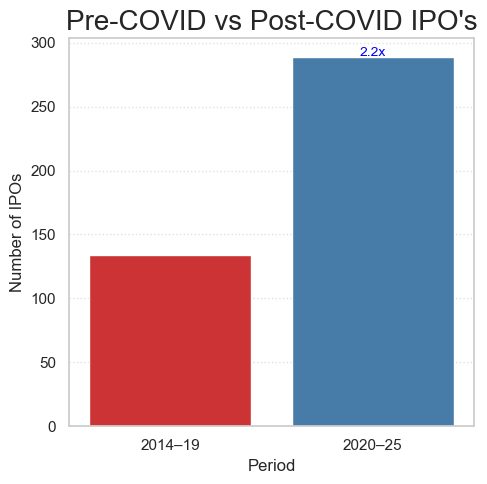

In [146]:
pre_count = len(df_cleaned1)
post_count = len(df_cleaned)

x_times = post_count / pre_count if pre_count > 0 else float('inf')
x_label = f"{x_times:.1f}x"

plt.figure(figsize=(5,5))
sns.barplot(x=["2014–19", "2020–25"],
            y=[pre_count, post_count],
            palette='Set1')

plt.text(1, post_count + 1, x_label, ha='center', fontsize=10, color='blue')

plt.title("Pre-COVID vs Post-COVID IPO's", fontsize=20)
plt.ylabel("Number of IPOs")
plt.xlabel("Period")
plt.grid(axis='y', linestyle='dotted', alpha=0.6)
plt.tight_layout()
plt.show()

### 2. Sector-wise IPO Trend (Pre vs Post-COVID)

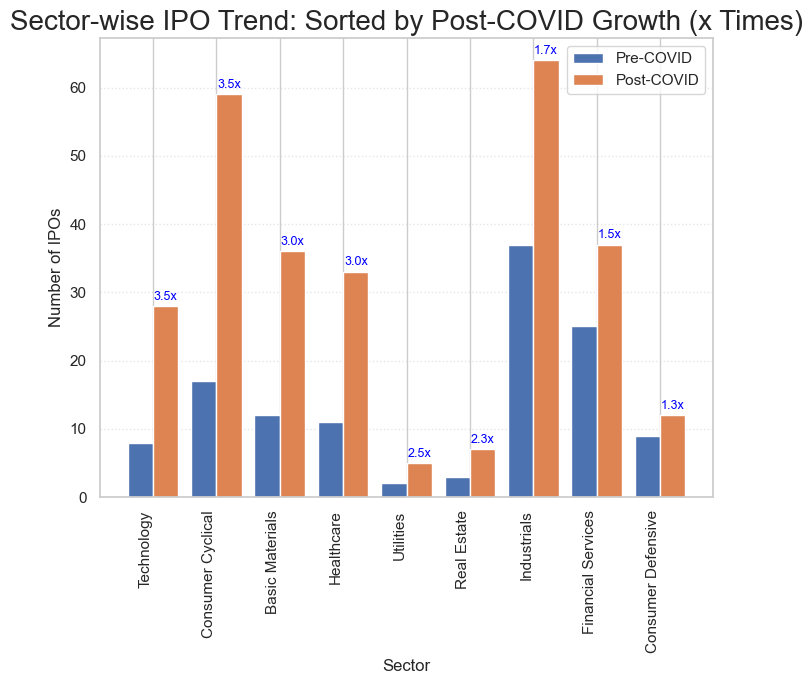

In [147]:
sector_pre = df_cleaned1['sector'].value_counts().reset_index()
sector_pre.columns = ['sector', 'pre_covid_count']

sector_post = df_cleaned['sector'].value_counts().reset_index()
sector_post.columns = ['sector', 'post_covid_count']

sector_trend = pd.merge(sector_pre, sector_post, on='sector', how='outer').fillna(0)
sector_trend['pre_covid_count'] = sector_trend['pre_covid_count'].astype(int)
sector_trend['post_covid_count'] = sector_trend['post_covid_count'].astype(int)

sector_trend['x_times'] = sector_trend['post_covid_count'] / sector_trend['pre_covid_count'].replace(0, pd.NA)
sector_trend['x_times_label'] = sector_trend['x_times'].apply(lambda x: f"{x:.1f}x" if pd.notna(x) else "–")

sector_trend_sorted = sector_trend.sort_values(by='x_times', ascending=False).reset_index(drop=True)
sector_trend_sorted = sector_trend_sorted.iloc[:-2]  # remove last 2 rows

plt.figure(figsize=(7,7))
x = range(len(sector_trend_sorted))

plt.bar(x, sector_trend_sorted['pre_covid_count'], width=0.4, label='Pre-COVID', align='center')
plt.bar([i + 0.4 for i in x], sector_trend_sorted['post_covid_count'], width=0.4, label='Post-COVID', align='center')

plt.xticks([i + 0.2 for i in x], sector_trend_sorted['sector'], rotation=90, ha='right')

for i, row in sector_trend_sorted.iterrows():
    x_pos = i + 0.4
    y_pos = row['post_covid_count']
    label = row['x_times_label']
    plt.text(x_pos, y_pos + 0.5, label, ha='center', va='bottom', fontsize=9, color='blue')

plt.xlabel('Sector')
plt.ylabel('Number of IPOs')
plt.title('Sector-wise IPO Trend: Sorted by Post-COVID Growth (x Times)', fontsize=20)
plt.legend()
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Top Industries Pre-COVID

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\76149309.py:12: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.



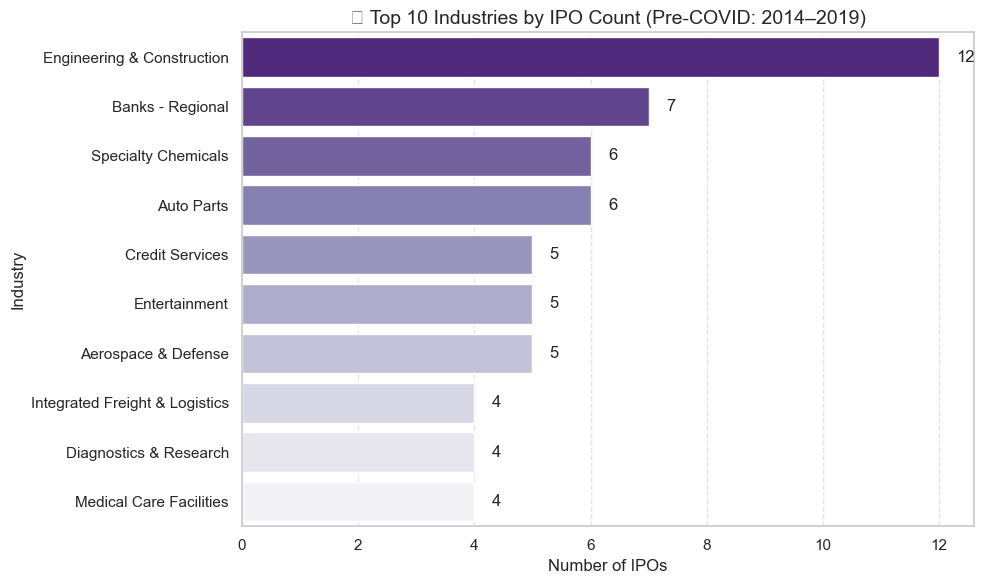

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\76149309.py:38: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.



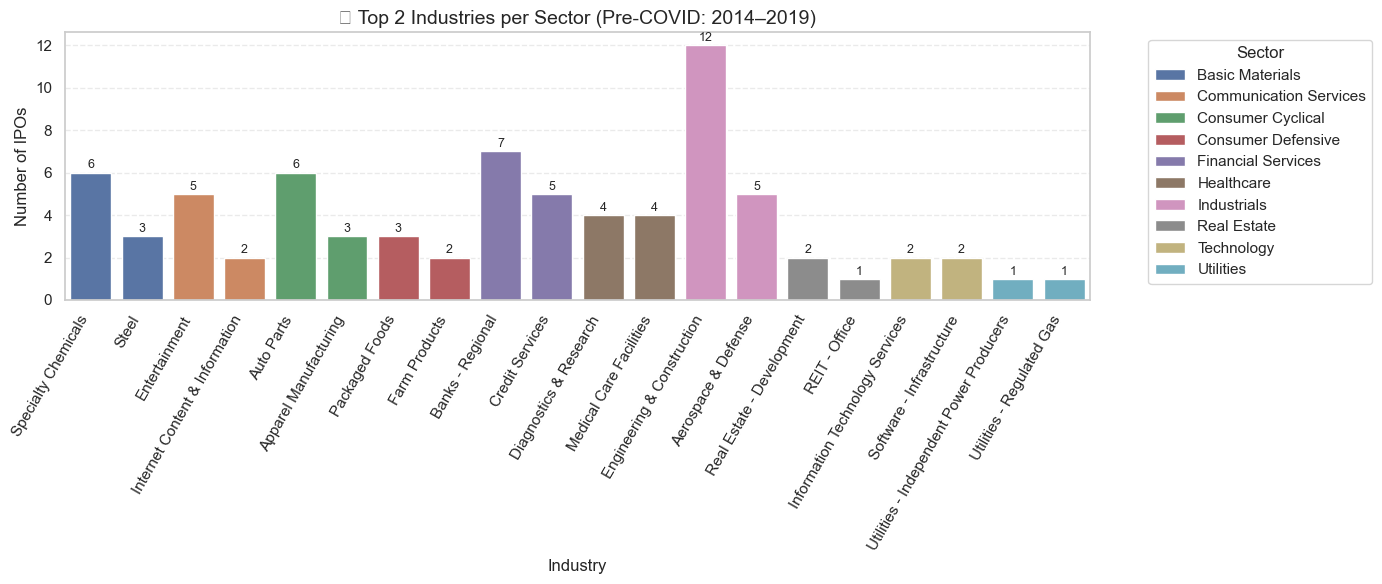

In [148]:
top10_industries = df_cleaned1['industry'].value_counts().head(10).reset_index()
top10_industries.columns = ['industry', 'ipo_count']

plt.figure(figsize=(10, 6))
sns.barplot(x='ipo_count', y='industry', data=top10_industries, palette='Purples_r')
for i, row in top10_industries.iterrows():
    plt.text(row['ipo_count'] + 0.3, i, row['ipo_count'], va='center')
plt.title("🏆 Top 10 Industries by IPO Count (Pre-COVID: 2014–2019)", fontsize=14)
plt.xlabel("Number of IPOs")
plt.ylabel("Industry")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
sector_industry_counts = df_cleaned1.groupby(['sector', 'industry']).size().reset_index(name='ipo_count')

top2_per_sector = (
    sector_industry_counts
    .sort_values(['sector', 'ipo_count'], ascending=[True, False])
    .groupby('sector')
    .head(2)
    .reset_index(drop=True)
)
top2_per_sector = top2_per_sector.sort_values(['sector', 'ipo_count'], ascending=[True, False])

plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=top2_per_sector, x='industry', y='ipo_count', hue='sector', dodge=False)

plt.xticks(rotation=60, ha='right')

for i, row in enumerate(top2_per_sector.itertuples()):
    barplot.text(i, row.ipo_count + 0.2, row.ipo_count, ha='center', fontsize=9)

plt.title("🏆 Top 2 Industries per Sector (Pre-COVID: 2014–2019)", fontsize=14)
plt.ylabel("Number of IPOs")
plt.xlabel("Industry")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4. Yearly Sector and Industry Trend (Post-COVID)

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\1944241768.py:51: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



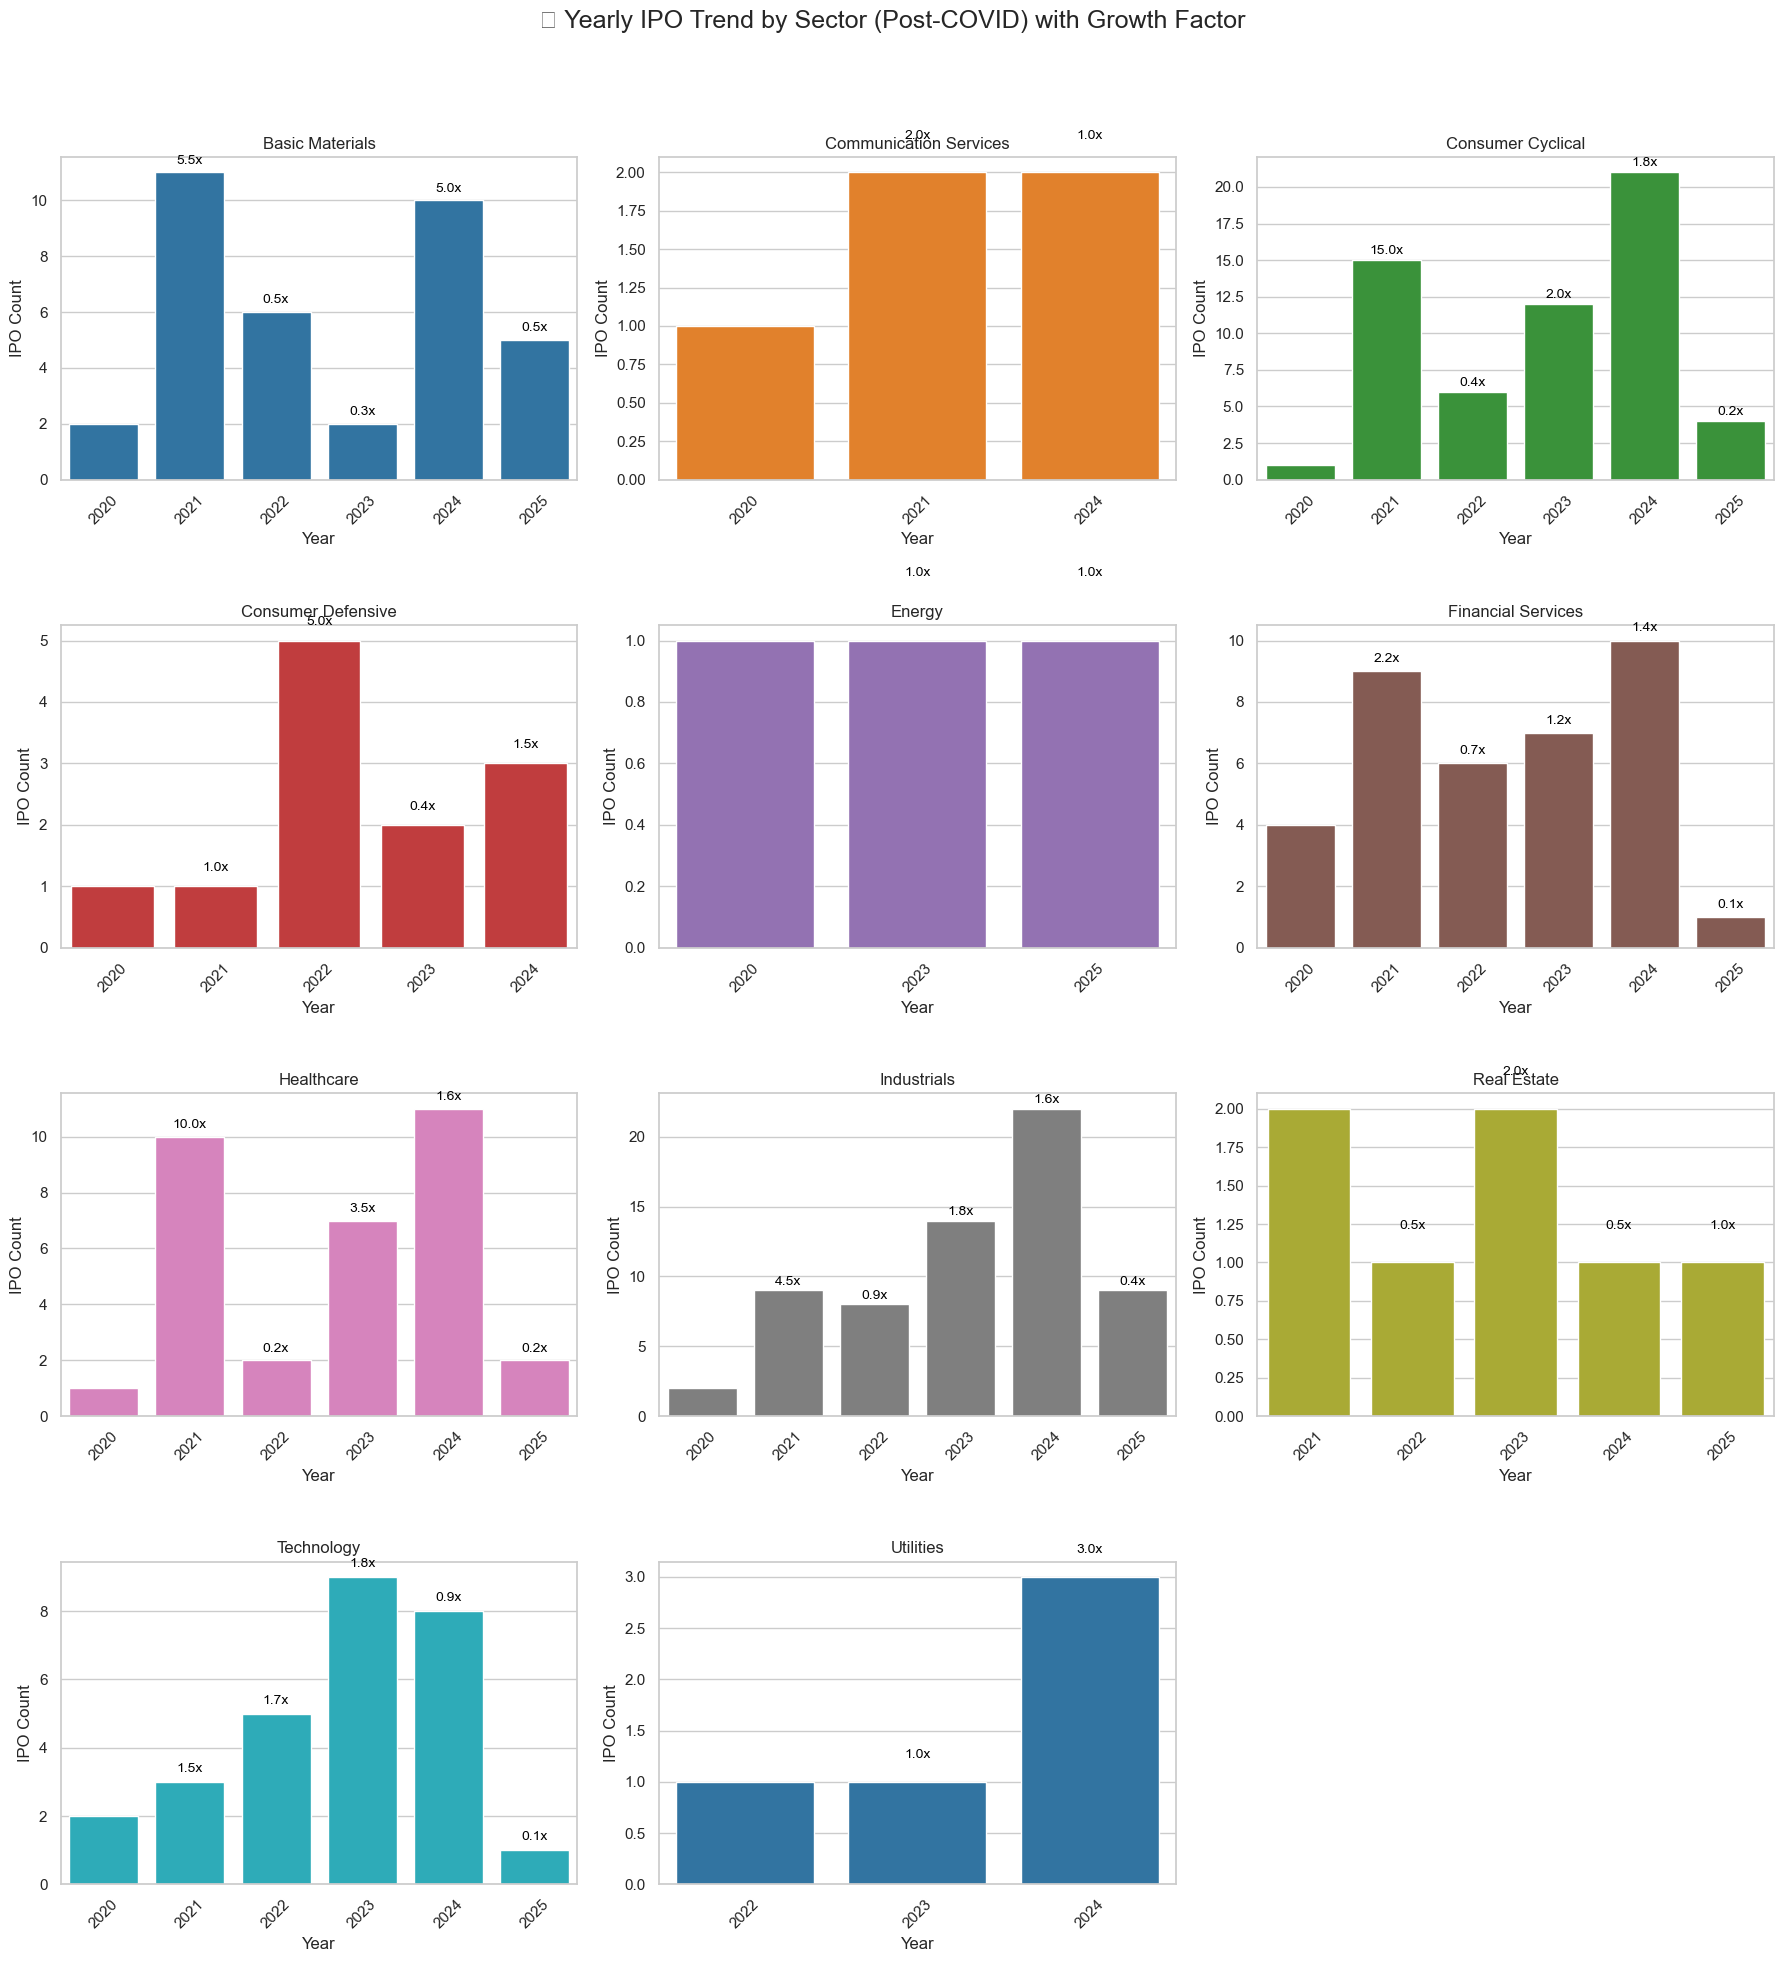

In [149]:
df_combined = pd.concat([df_cleaned1, df_cleaned], ignore_index=True)

df_post_covid = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()
df_post_covid['year'] = df_post_covid['startingDate'].dt.year

sector_counts = df_post_covid.groupby(['sector', 'year']).size().reset_index(name='IPO_Count')

sector_counts['x_times'] = np.nan
for sector in sector_counts['sector'].unique():
    sec_data = sector_counts[sector_counts['sector'] == sector].sort_values('year')
    prev = None
    for idx, row in sec_data.iterrows():
        if prev is not None and prev > 0:
            x_ratio = row['IPO_Count'] / prev
            sector_counts.loc[idx, 'x_times'] = f"{x_ratio:.1f}x"
        prev = row['IPO_Count']

palette = sns.color_palette("tab10", n_colors=sector_counts['sector'].nunique())
sector_color_map = dict(zip(sector_counts['sector'].unique(), palette))

unique_sectors = sector_counts['sector'].unique()
n_sectors = len(unique_sectors)
cols = 3
rows = (n_sectors + cols - 1) // cols  # ceil division

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 5 * rows), sharey=False)
axs = axs.flatten()  # Flatten to make indexing easy

for i, sector in enumerate(unique_sectors):
    ax = axs[i]
    data = sector_counts[sector_counts['sector'] == sector].sort_values('year')
    bar_color = sector_color_map[sector]

    sns.barplot(x='year', y='IPO_Count', data=data, color=bar_color, ax=ax)

    for j, (index, row) in enumerate(data.iterrows()):
        label = row['x_times']
        if not pd.isna(label):
            ax.text(j, row['IPO_Count'] + 0.2, label,
                    ha='center', va='bottom', fontsize=10, color='black')

    ax.set_title(sector, fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("IPO Count")
    ax.set_xticklabels(data['year'], rotation=45)

for i in range(len(unique_sectors), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("📊 Yearly IPO Trend by Sector (Post-COVID) with Growth Factor", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Optional: Industry Heatmap (Post-COVID)

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\3810360811.py:20: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.



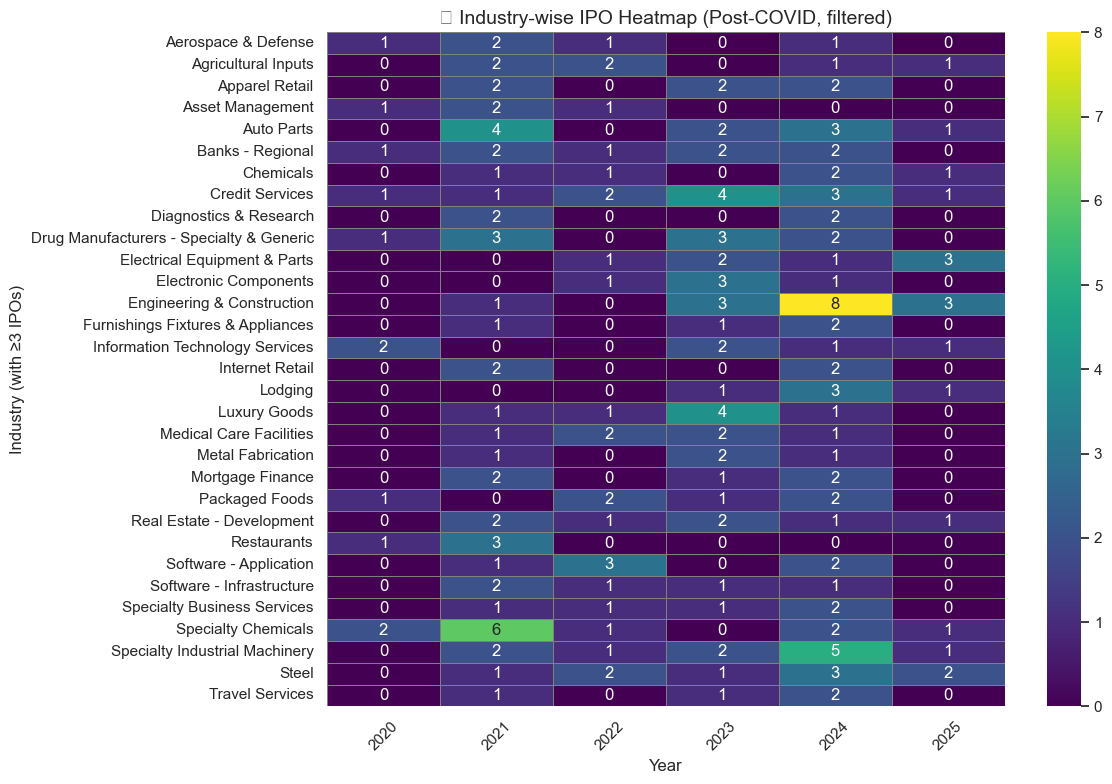

In [150]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post_covid = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()
df_post_covid['year'] = df_post_covid['startingDate'].dt.year

industry_year_counts = df_post_covid.groupby(['industry', 'year']).size().unstack(fill_value=0)

min_ipos_required = 4
industry_totals = industry_year_counts.sum(axis=1)
filtered_industries = industry_totals[industry_totals >= min_ipos_required].index
industry_year_counts = industry_year_counts.loc[filtered_industries]

plt.figure(figsize=(12, 8))
sns.heatmap(industry_year_counts, annot=True, fmt="d", cmap="viridis", linewidths=.5, linecolor='gray')

plt.title("🧩 Industry-wise IPO Heatmap (Post-COVID, filtered)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Industry (with ≥3 IPOs)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Section B

### 5. Total IPO Worth Yearly

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2801184766.py:21: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.



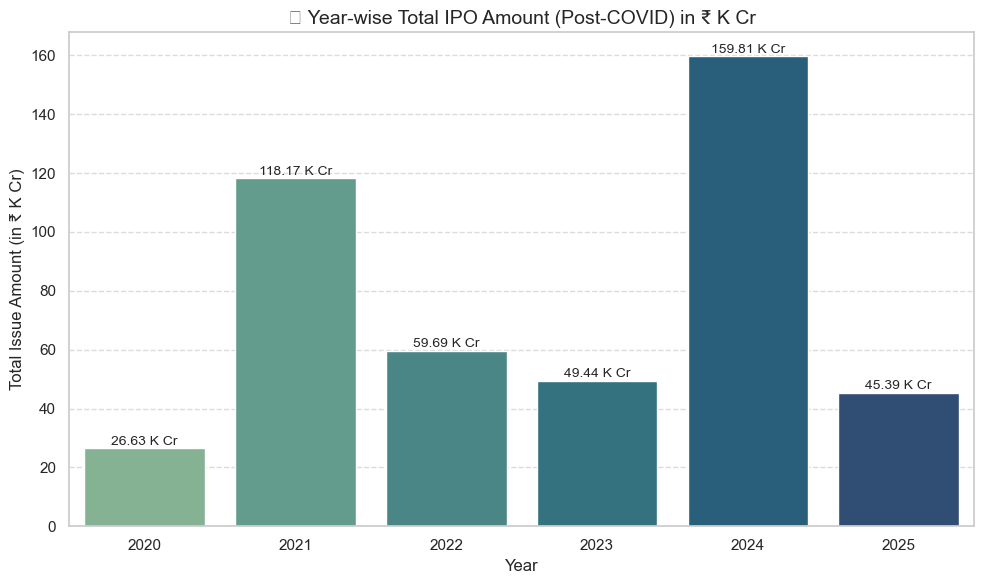

In [151]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post_covid = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()
df_post_covid['year'] = df_post_covid['startingDate'].dt.year

yearly_total_ipo = df_post_covid.groupby('year')['totalIssueAmount_inCr'].sum().reset_index()
yearly_total_ipo['totalIssueAmount_KCr'] = yearly_total_ipo['totalIssueAmount_inCr'] / 1000
yearly_total_ipo['totalIssueAmount_KCr'] = yearly_total_ipo['totalIssueAmount_KCr'].round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_total_ipo, x='year', y='totalIssueAmount_KCr', palette="crest")

for i, row in yearly_total_ipo.iterrows():
    plt.text(i, row['totalIssueAmount_KCr'] + 0.1, f"{row['totalIssueAmount_KCr']:.2f} K Cr",
             ha='center', va='bottom', fontsize=10)

plt.title("💸 Year-wise Total IPO Amount (Post-COVID) in ₹ K Cr", fontsize=14)
plt.ylabel("Total Issue Amount (in ₹ K Cr)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\3475860918.py:21: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.



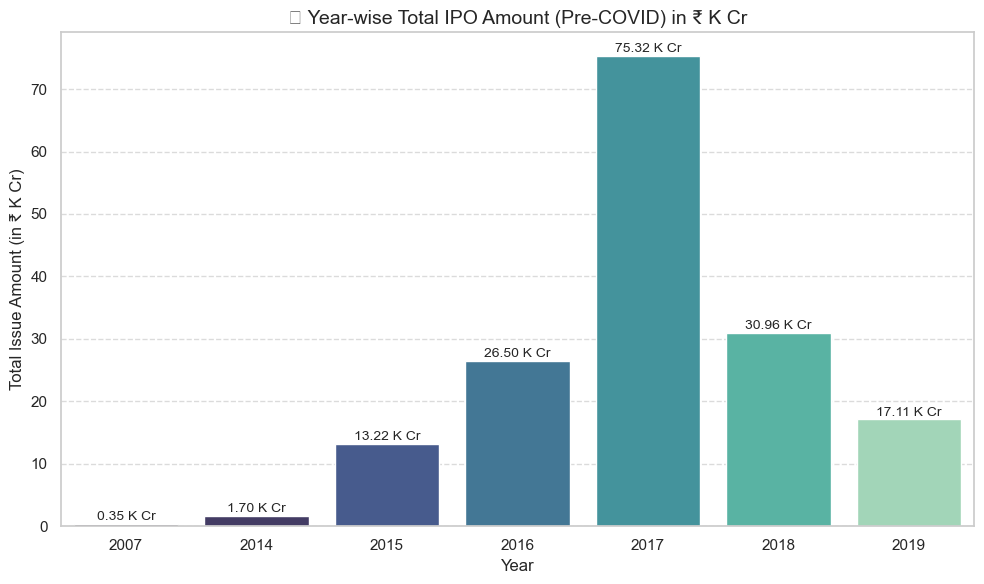

In [152]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_pre_covid = df_combined[df_combined['startingDate'].dt.year < 2020].copy()
df_pre_covid['year'] = df_pre_covid['startingDate'].dt.year

pre_covid_ipo = df_pre_covid.groupby('year')['totalIssueAmount_inCr'].sum().reset_index()
pre_covid_ipo['totalIssueAmount_KCr'] = pre_covid_ipo['totalIssueAmount_inCr'] / 1000
pre_covid_ipo['totalIssueAmount_KCr'] = pre_covid_ipo['totalIssueAmount_KCr'].round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=pre_covid_ipo, x='year', y='totalIssueAmount_KCr', palette="mako")

for i, row in pre_covid_ipo.iterrows():
    plt.text(i, row['totalIssueAmount_KCr'] + 0.1, f"{row['totalIssueAmount_KCr']:.2f} K Cr",
             ha='center', va='bottom', fontsize=10)

plt.title("💸 Year-wise Total IPO Amount (Pre-COVID) in ₹ K Cr", fontsize=14)
plt.ylabel("Total Issue Amount (in ₹ K Cr)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6. Post-COVID Total Subscription Value

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2911325188.py:24: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



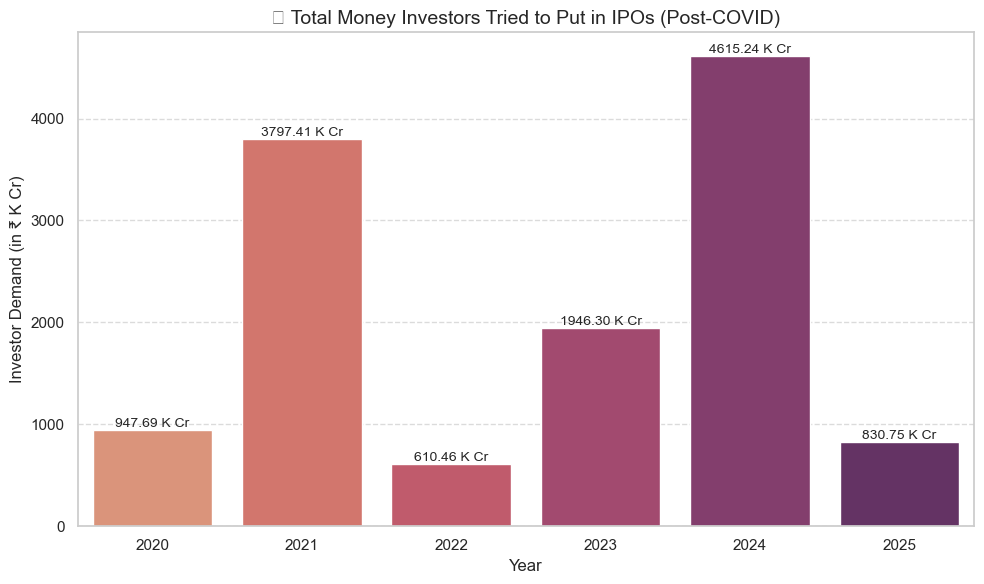

In [153]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post_covid = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()
df_post_covid['year'] = df_post_covid['startingDate'].dt.year

df_post_covid['totalSubscriptionAmount'] = df_post_covid['total_subsTimes'] * df_post_covid['totalIssueAmount_inCr']

investor_demand = df_post_covid.groupby('year')['totalSubscriptionAmount'].sum().reset_index()

investor_demand['totalSubscriptionAmount_KCr'] = investor_demand['totalSubscriptionAmount'] / 1000
investor_demand['totalSubscriptionAmount_KCr'] = investor_demand['totalSubscriptionAmount_KCr'].round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=investor_demand, x='year', y='totalSubscriptionAmount_KCr', palette='flare')

for i, row in investor_demand.iterrows():
    plt.text(i, row['totalSubscriptionAmount_KCr'] + 0.1, f"{row['totalSubscriptionAmount_KCr']:.2f} K Cr",
             ha='center', va='bottom', fontsize=10)

plt.title("📈 Total Money Investors Tried to Put in IPOs (Post-COVID)", fontsize=14)
plt.ylabel("Investor Demand (in ₹ K Cr)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Sector-wise Yearly Issue Amount

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



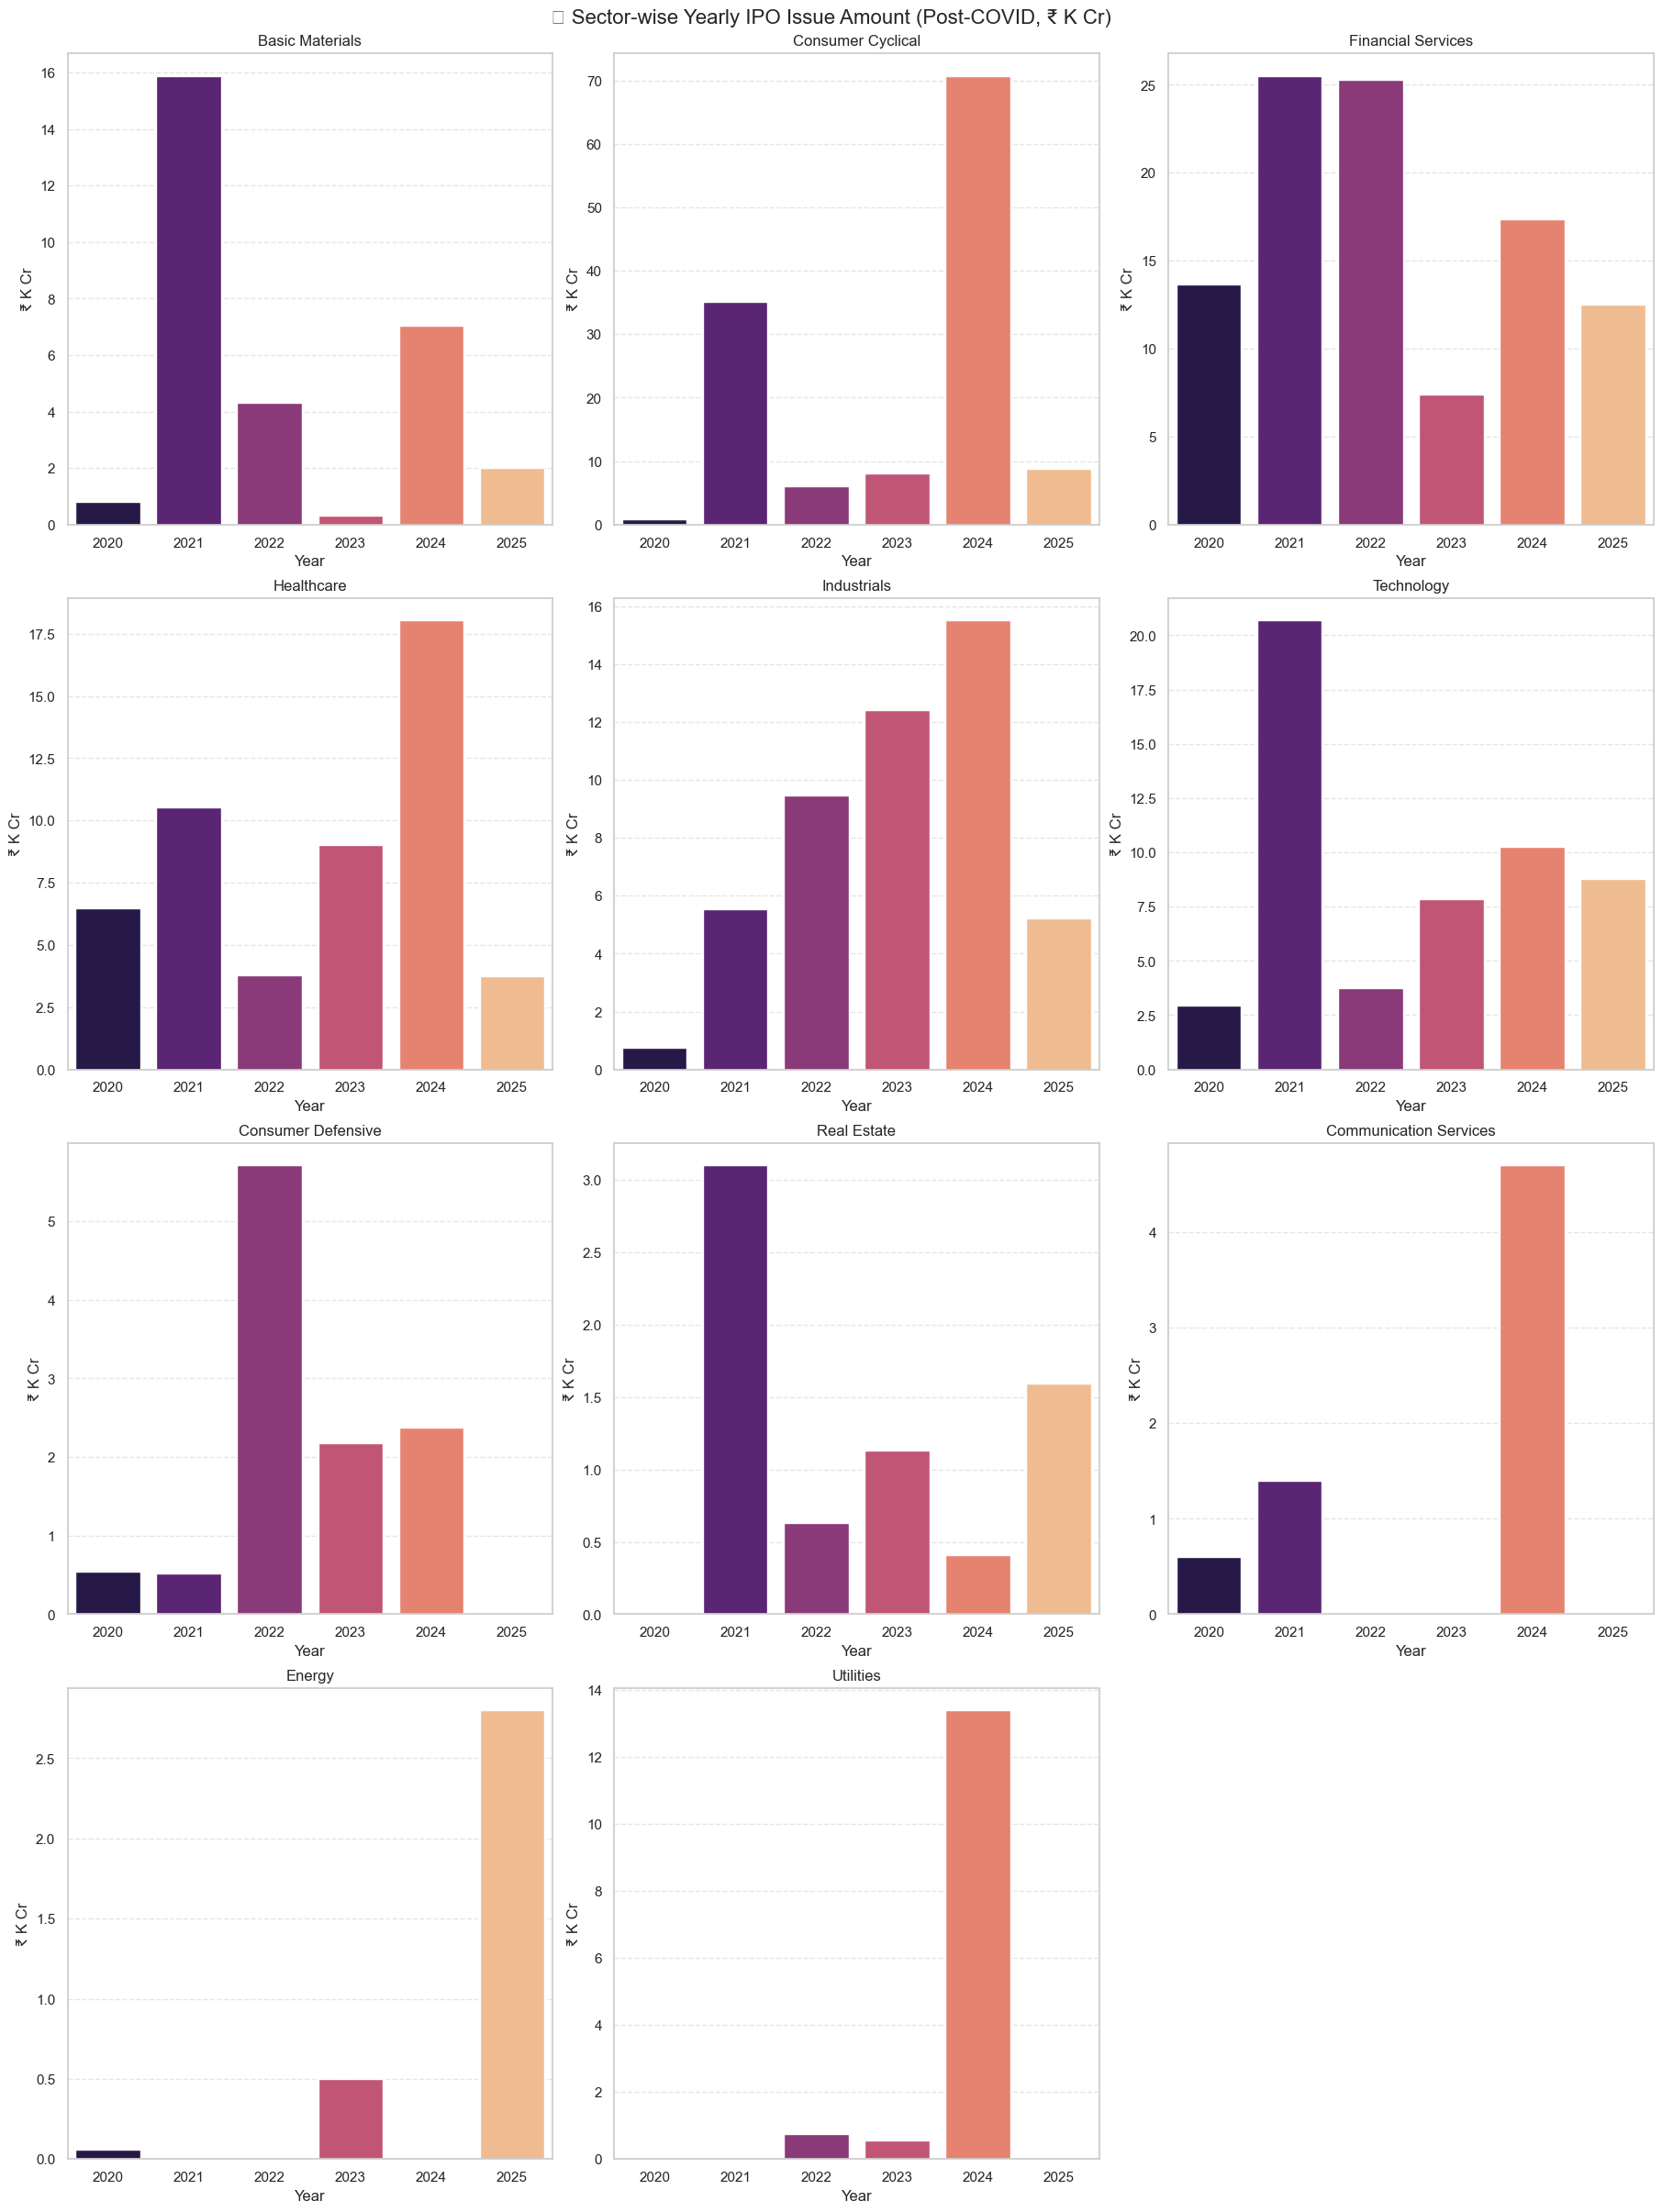

In [154]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post_covid = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()
df_post_covid['year'] = df_post_covid['startingDate'].dt.year

grouped = df_post_covid.groupby(['sector', 'year'])['totalIssueAmount_inCr'].sum().reset_index()

grouped['totalIssueAmount_KCr'] = (grouped['totalIssueAmount_inCr'] / 1000).round(2)

all_sectors_unsorted = grouped['sector'].unique()
all_years = list(range(2020, 2026)) 

full_index = pd.MultiIndex.from_product([all_sectors_unsorted, all_years], names=['sector', 'year'])
grouped = grouped.set_index(['sector', 'year']).reindex(full_index, fill_value=0).reset_index()

sector_order = (
    grouped[grouped['totalIssueAmount_KCr'] > 0]
    .groupby('sector')['year']
    .count()
    .sort_values(ascending=False)
    .index.tolist()
)

n_sectors = len(sector_order)
n_cols = 3
n_rows = math.ceil(n_sectors / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6), constrained_layout=True)

axes = axes.flatten()

for i, sector in enumerate(sector_order):
    ax = axes[i]
    data = grouped[grouped['sector'] == sector]

    sns.barplot(data=data, x='year', y='totalIssueAmount_KCr', palette='magma', ax=ax)

    ax.set_title(f"{sector}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("₹ K Cr")
    ax.set_xticks(range(len(all_years)))
    ax.set_xticklabels(all_years)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📊 Sector-wise Yearly IPO Issue Amount (Post-COVID, ₹ K Cr)", fontsize=16)
plt.show()

## Section C

### 7. Sector-wise Subscription Comparison

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\497913875.py:16: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



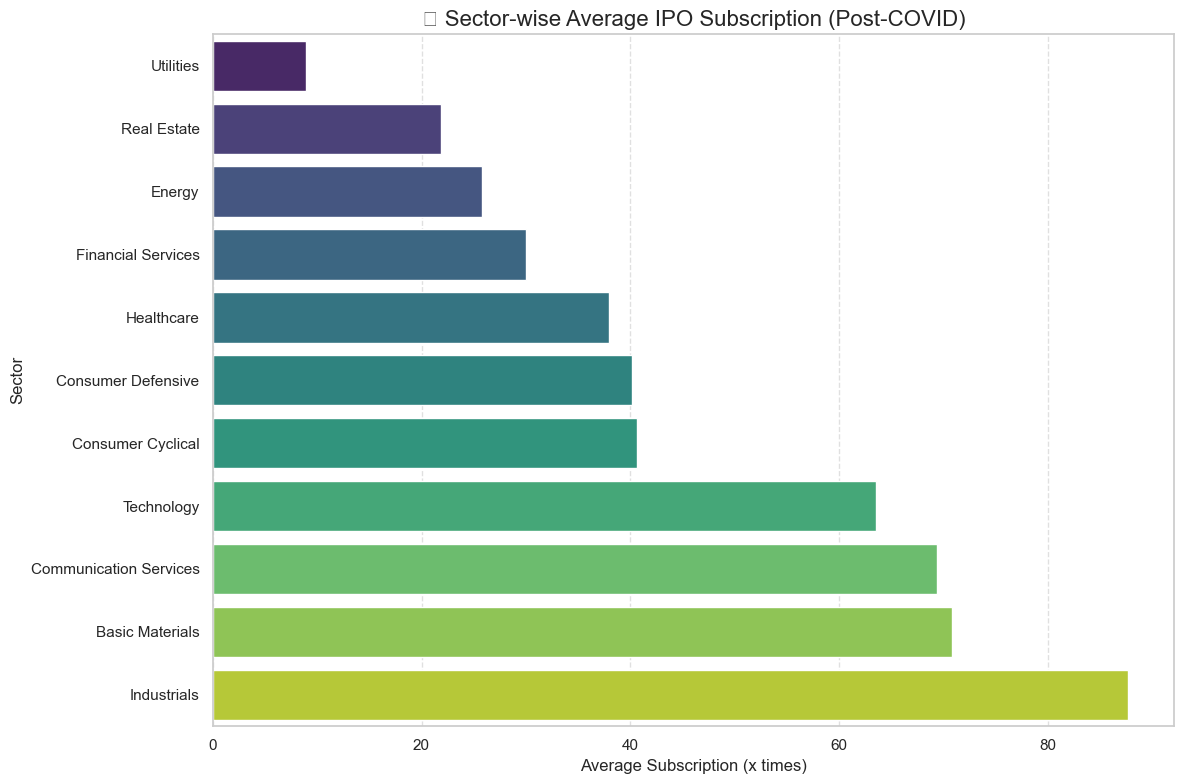

In [155]:
sector_subs_avg = df_post_covid.groupby('sector').agg(
    total_subs_sum=('total_subsTimes', 'sum'),
    ipo_count=('ipo_name', 'count')
).reset_index()

sector_subs_avg['avg_subscription'] = sector_subs_avg['total_subs_sum'] / sector_subs_avg['ipo_count']

sector_subs_avg = sector_subs_avg.sort_values(by='avg_subscription', ascending=True)
plt.figure(figsize=(12, 8))
sns.barplot(data=sector_subs_avg, x='avg_subscription', y='sector', palette='viridis')

plt.title("📈 Sector-wise Average IPO Subscription (Post-COVID)", fontsize=16)
plt.xlabel("Average Subscription (x times)")
plt.ylabel("Sector")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2505200576.py:27: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



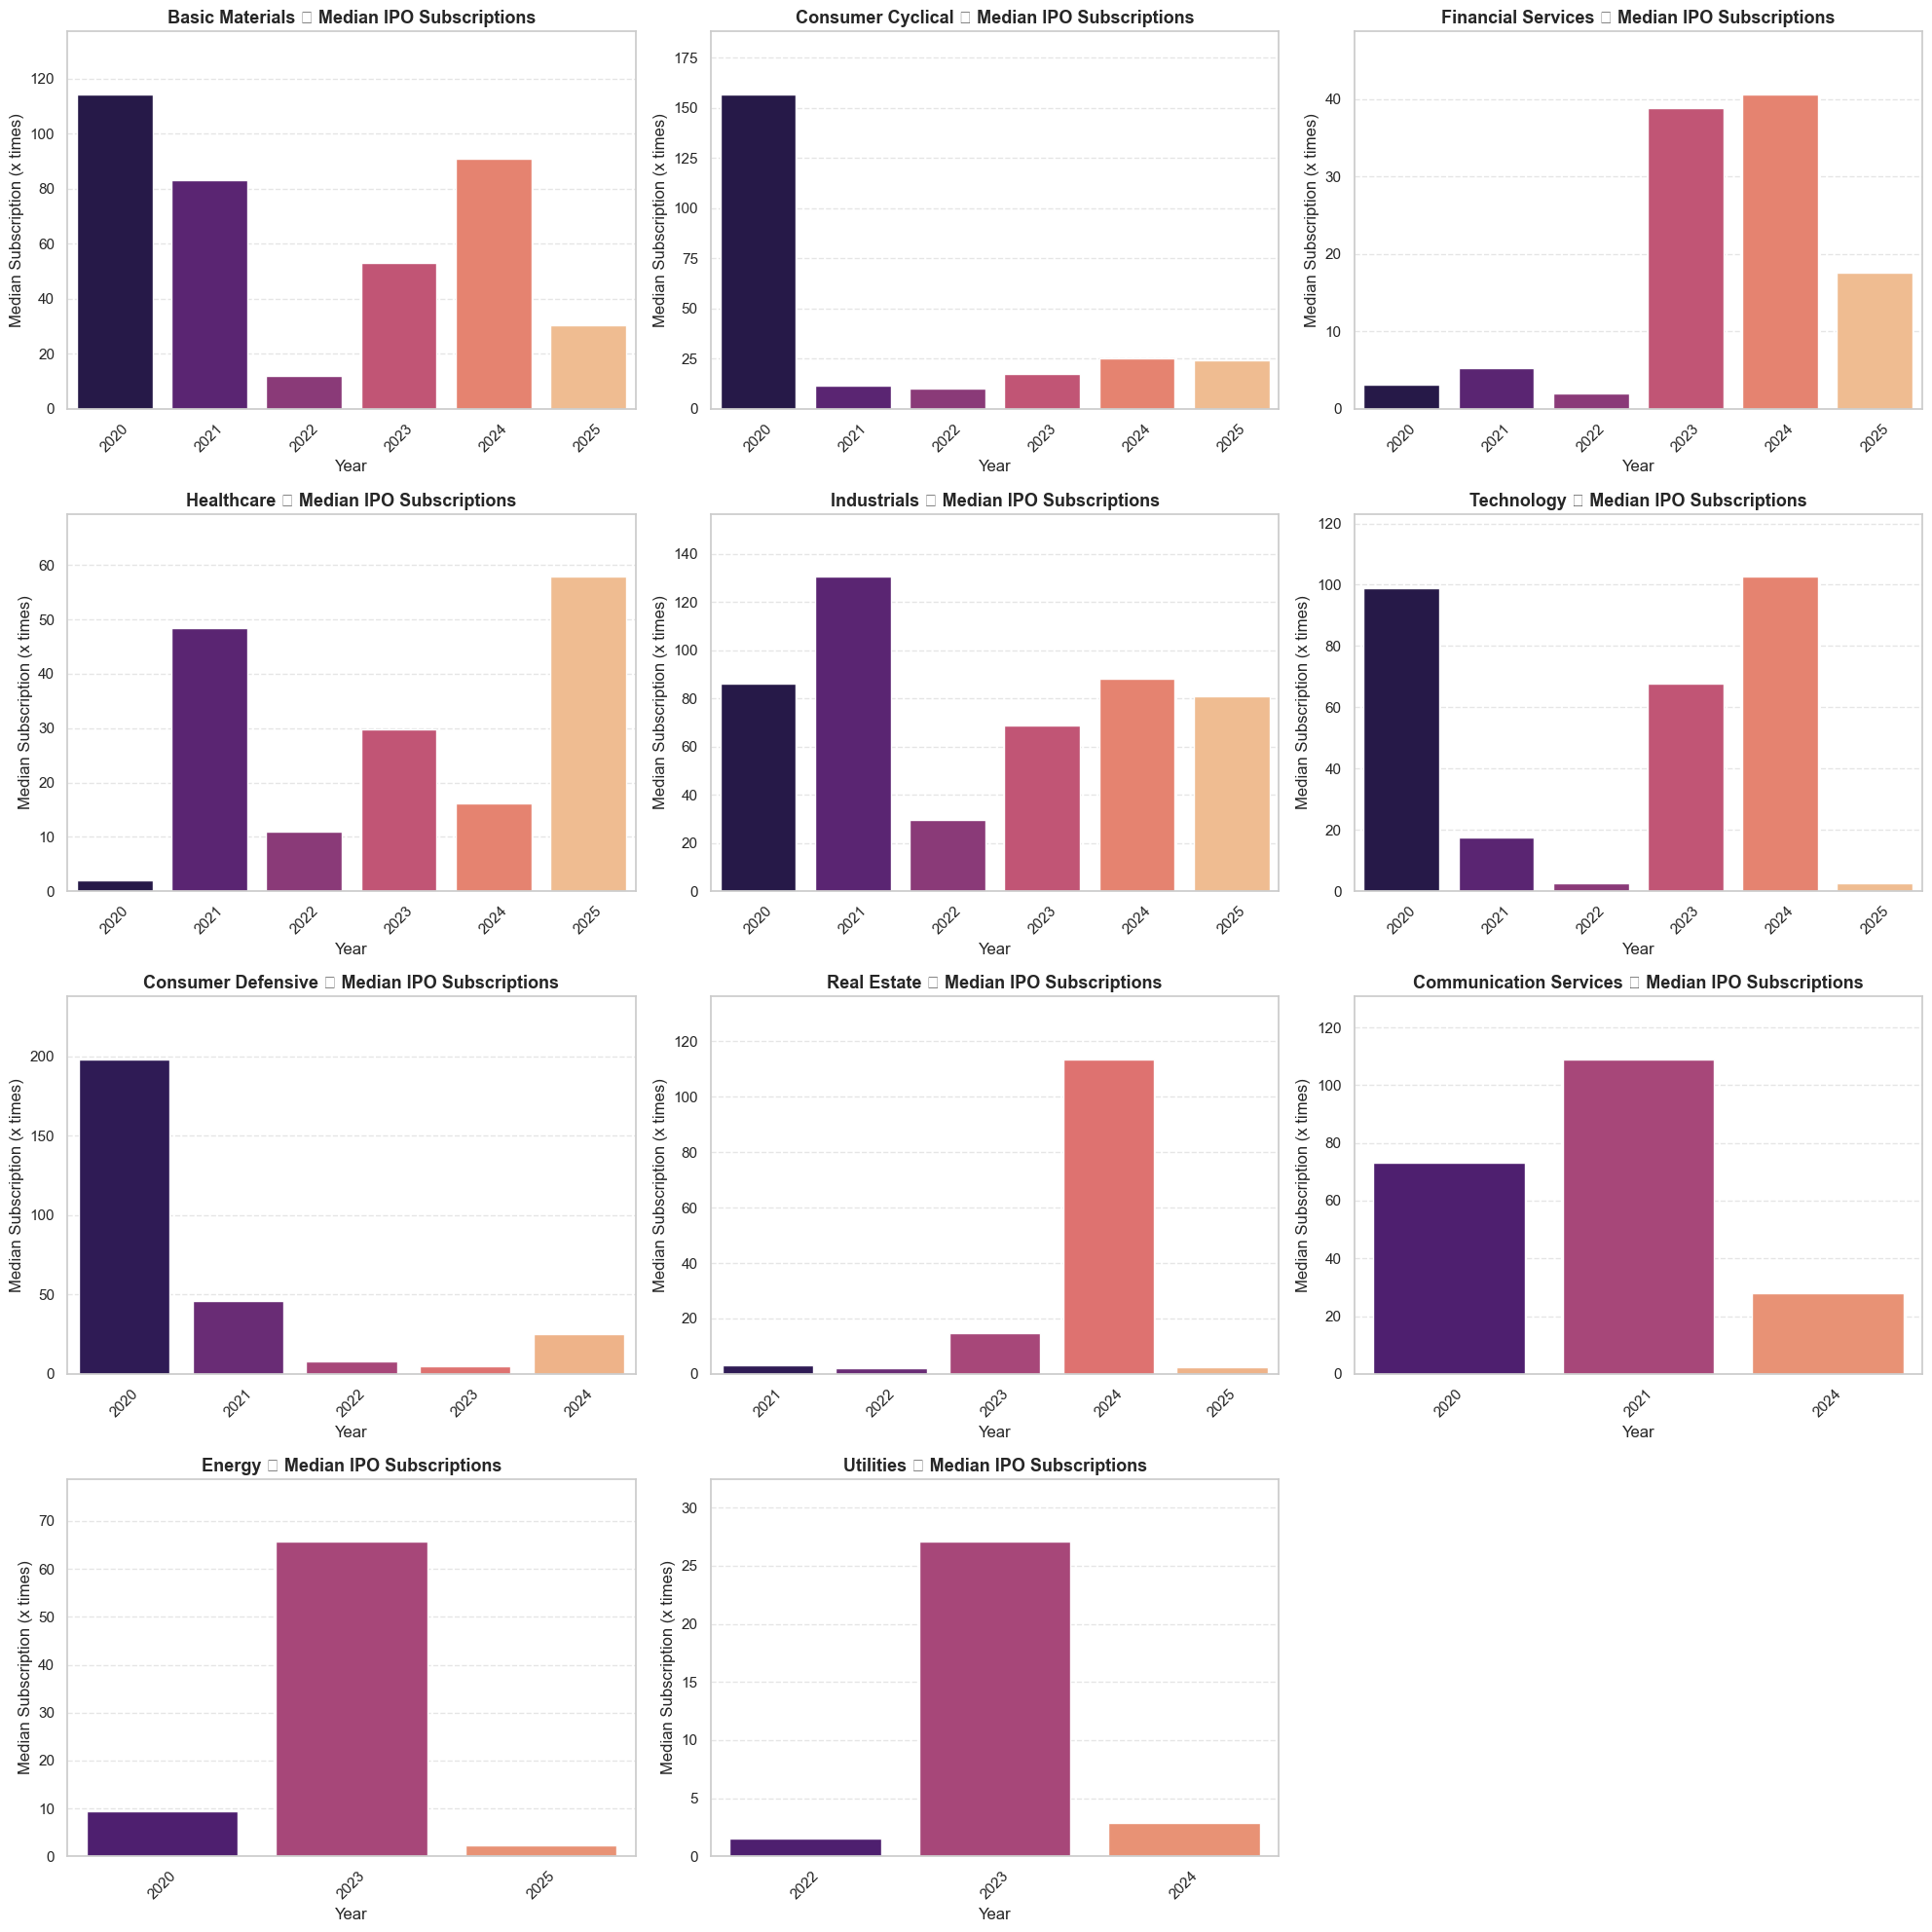

In [156]:
sector_yearly_median_subs = df_post_covid.groupby(['sector', 'year'])['total_subsTimes'].median().reset_index()

sector_yearly_median_subs.rename(columns={'total_subsTimes': 'median_subscription'}, inplace=True)

sector_counts = sector_yearly_median_subs.groupby('sector')['year'].nunique().sort_values(ascending=False)
sorted_sectors = sector_counts.index.tolist()

n_sectors = len(sorted_sectors)
cols = 3
rows = math.ceil(n_sectors / cols)

plt.figure(figsize=(20, rows * 5))

for idx, sector in enumerate(sorted_sectors):
    data = sector_yearly_median_subs[sector_yearly_median_subs['sector'] == sector]

    plt.subplot(rows, cols, idx + 1)
    sns.barplot(data=data, x='year', y='median_subscription', palette='magma')

    plt.title(f"{sector} 📈 Median IPO Subscriptions", fontsize=13, weight='bold')
    plt.xlabel("Year")
    plt.ylabel("Median Subscription (x times)")
    plt.xticks(rotation=45)
    plt.ylim(0, data['median_subscription'].max() * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 8. Top 5 Sectors: Last Day Subscription

                   sector  median_of_mode_bin
1  Communication Services               29.88
0         Basic Materials               24.68
7             Industrials               18.69
6              Healthcare                7.95
3      Consumer Defensive                7.67


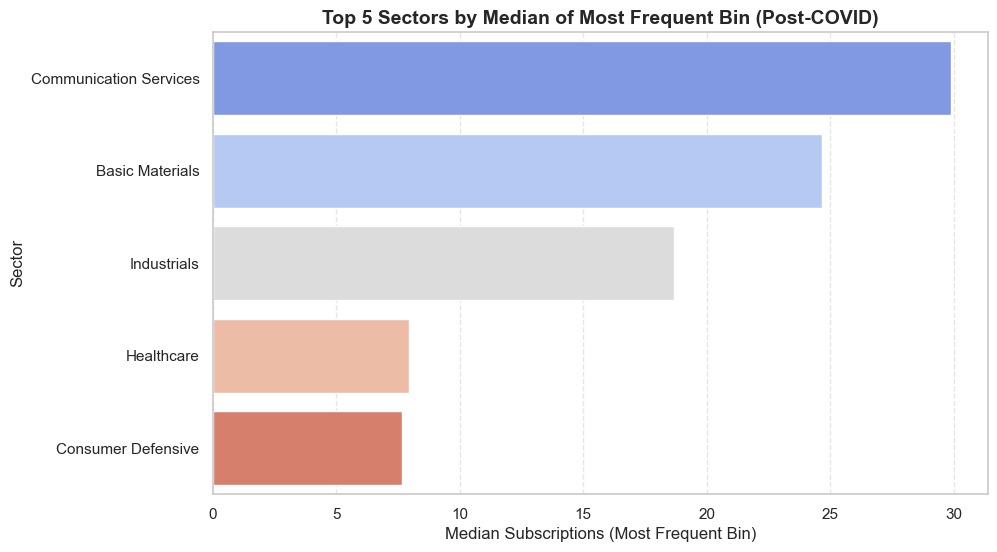

In [157]:
df_post = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

def avg_of_mode_bin(values, bins=5, method='median'):
    binned, edges = pd.cut(values, bins=bins, retbins=True, include_lowest=True)
    mode_bin = binned.value_counts().idxmax()
    bin_mask = (values >= mode_bin.left) & (values <= mode_bin.right)
    selected = values[bin_mask]
    return selected.median() if method == 'median' else selected.mean()

sector_scores = (
    df_post
    .groupby('sector')['total_subsTimes']
    .apply(lambda x: avg_of_mode_bin(x, bins=5, method='median'))
    .reset_index(name='median_of_mode_bin')
)

top5_binned_sectors = sector_scores.sort_values(by='median_of_mode_bin', ascending=False).head(5)
print(top5_binned_sectors)
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_binned_sectors, x='median_of_mode_bin', y='sector', palette='coolwarm')
plt.title("Top 5 Sectors by Median of Most Frequent Bin (Post-COVID)", fontsize=14, weight='bold')
plt.xlabel("Median Subscriptions (Most Frequent Bin)")
plt.ylabel("Sector")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### 9. Top 5 Sectors: Entity-Wise

🔵 Top 5 Sectors by QIB Average Subscription:
                    sector  avg_qib_subs  avg_hni_subs  avg_retail_subs
8              Real Estate         68.91         16.63            25.31
1   Communication Services         64.59         14.91            19.91
10               Utilities         62.93         14.57            19.61
4                   Energy         62.45         35.42            29.39
2        Consumer Cyclical         62.22         15.93            25.23

🟠 Top 5 Sectors by HNI Average Subscription:
               sector  avg_qib_subs  avg_hni_subs  avg_retail_subs
4              Energy         62.45         35.42            29.39
8         Real Estate         68.91         16.63            25.31
7         Industrials         58.23         16.26            30.31
3  Consumer Defensive         49.54         15.98            33.23
2   Consumer Cyclical         62.22         15.93            25.23

🟢 Top 5 Sectors by Retail Average Subscription:
               sector  avg

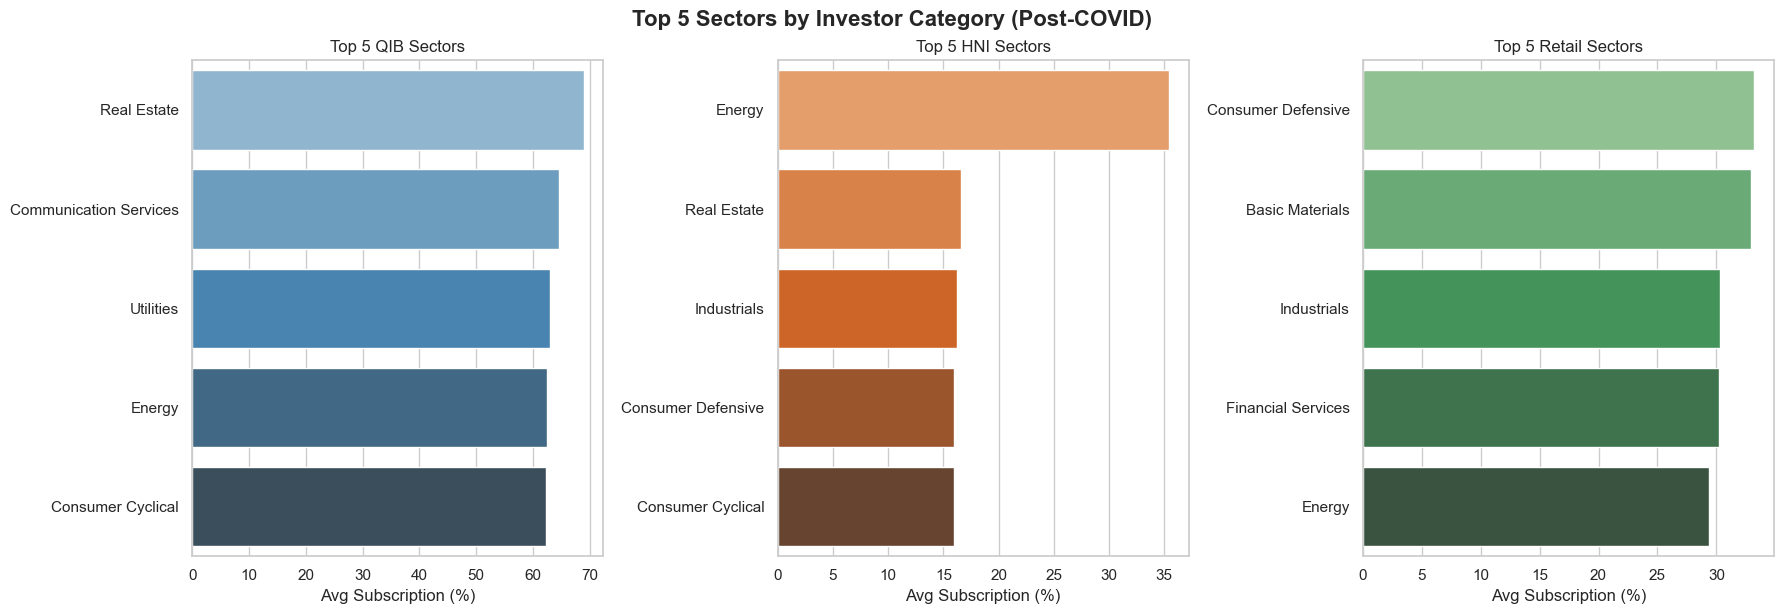

In [158]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

sector_avg_subs = df_post.groupby('sector').agg({
    'qibSharePercent': 'mean',
    'niiSharePercent': 'mean',
    'retailSharePercent': 'mean'
}).reset_index()

sector_avg_subs.columns = ['sector', 'avg_qib_subs', 'avg_hni_subs', 'avg_retail_subs']

top5_qib = sector_avg_subs.sort_values(by='avg_qib_subs', ascending=False).head(5)
top5_hni = sector_avg_subs.sort_values(by='avg_hni_subs', ascending=False).head(5)
top5_retail = sector_avg_subs.sort_values(by='avg_retail_subs', ascending=False).head(5)

print("🔵 Top 5 Sectors by QIB Average Subscription:")
print(top5_qib)
print("\n🟠 Top 5 Sectors by HNI Average Subscription:")
print(top5_hni)
print("\n🟢 Top 5 Sectors by Retail Average Subscription:")
print(top5_retail)
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(data=top5_qib, x='avg_qib_subs', y='sector', ax=axs[0], palette='Blues_d')
axs[0].set_title("Top 5 QIB Sectors")

sns.barplot(data=top5_hni, x='avg_hni_subs', y='sector', ax=axs[1], palette='Oranges_d')
axs[1].set_title("Top 5 HNI Sectors")

sns.barplot(data=top5_retail, x='avg_retail_subs', y='sector', ax=axs[2], palette='Greens_d')
axs[2].set_title("Top 5 Retail Sectors")

for ax in axs:
    ax.set_xlabel("Avg Subscription (%)")
    ax.set_ylabel("")

plt.tight_layout()
plt.suptitle("Top 5 Sectors by Investor Category (Post-COVID)", fontsize=16, weight='bold', y=1.02)
plt.show()

### 10. Industry-wise Subscription Comparison

🔥 Top 10 Industries with Highest Average Total Subscriptions (Post-COVID):
                          industry  avg_total_subscription
19             Consulting Services                  326.49
62                       Railroads                  195.96
28  Electronic Gaming & Multimedia                  175.46
1              Aerospace & Defense                  167.08
72  Specialty Industrial Machinery                  123.96
53               Metal Fabrication                  103.30
71             Specialty Chemicals                  100.18
18               Computer Hardware                   98.31
23    Drug Manufacturers - General                   97.86
74                           Steel                   92.95


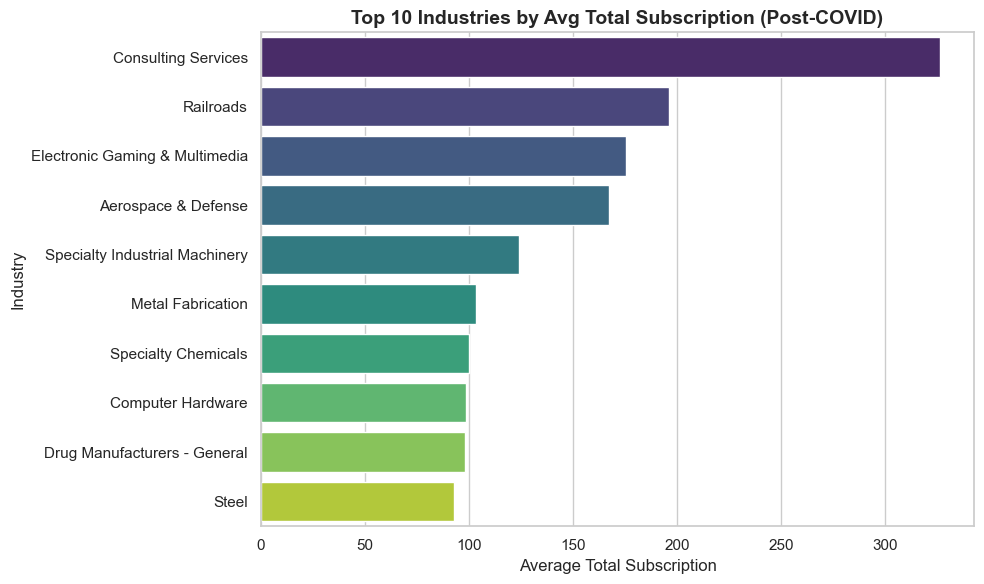

In [159]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

industry_avg_subs = df_post.groupby('industry')['total_subsTimes'].mean().reset_index()

top10_industries = industry_avg_subs.sort_values(by='total_subsTimes', ascending=False).head(10)

top10_industries.columns = ['industry', 'avg_total_subscription']

print("🔥 Top 10 Industries with Highest Average Total Subscriptions (Post-COVID):")
print(top10_industries)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_industries, x='avg_total_subscription', y='industry', palette='viridis')
plt.xlabel("Average Total Subscription")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Avg Total Subscription (Post-COVID)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### 11. Top 5 Industries: Last Day Volume

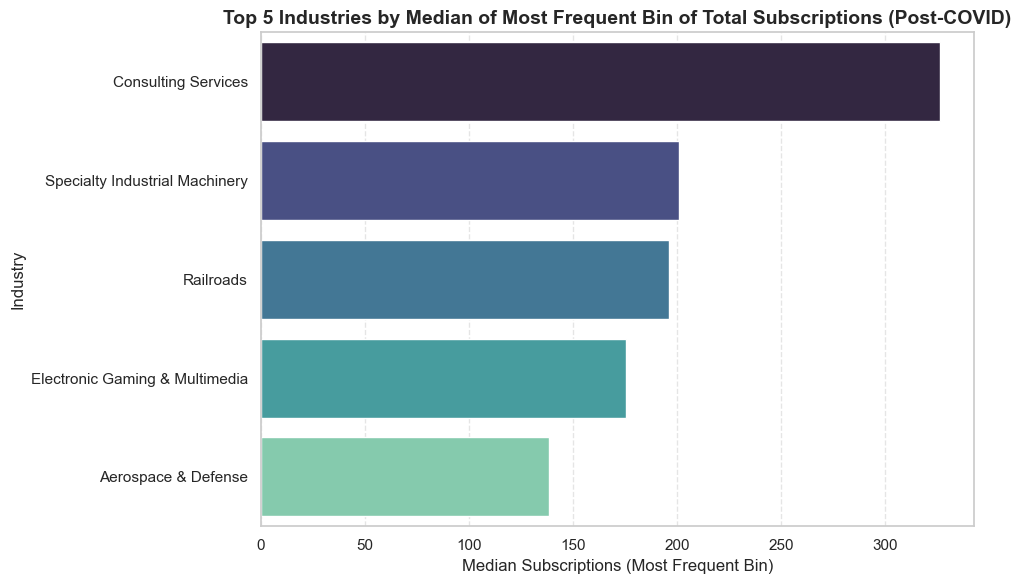

In [160]:
df_post = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

def median_of_mode_bin(values, bins=5):
    binned, edges = pd.cut(values, bins=bins, retbins=True, include_lowest=True)
    mode_bin = binned.value_counts().idxmax()
    bin_mask = (values >= mode_bin.left) & (values <= mode_bin.right)
    selected = values[bin_mask]
    return selected.median()

industry_scores = (
    df_post
    .groupby('industry')['total_subsTimes']
    .apply(lambda x: median_of_mode_bin(x, bins=5))
    .reset_index(name='median_of_mode_bin')
)

top5_binned_industries = industry_scores.sort_values(by='median_of_mode_bin', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_binned_industries, x='median_of_mode_bin', y='industry', palette='mako')
plt.title("Top 5 Industries by Median of Most Frequent Bin of Total Subscriptions (Post-COVID)", fontsize=14, weight='bold')
plt.xlabel("Median Subscriptions (Most Frequent Bin)")
plt.ylabel("Industry")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 12. Industry-Wise Entity Subscriptions

🔵 Top 5 Industries by QIB Average Subscription:
                          industry  avg_qib_subs  avg_hni_subs  \
62                       Railroads        136.36         27.27   
76           Textile Manufacturing         93.18         21.13   
46                         Lodging         87.09         17.42   
40         Insurance - Diversified         84.69          3.19   
52  Medical Instruments & Supplies         78.12         18.89   

    avg_retail_subs  
62            18.18  
76            26.59  
46            11.61  
40            11.96  
52            28.93  

🟠 Top 5 Industries by HNI Average Subscription:
                          industry  avg_qib_subs  avg_hni_subs  \
55  Oil & Gas Equipment & Services         68.68         45.63   
14   Building Products & Equipment         24.50         34.30   
32                   Farm Products          2.00         29.00   
62                       Railroads        136.36         27.27   
76           Textile Manufacturing         9

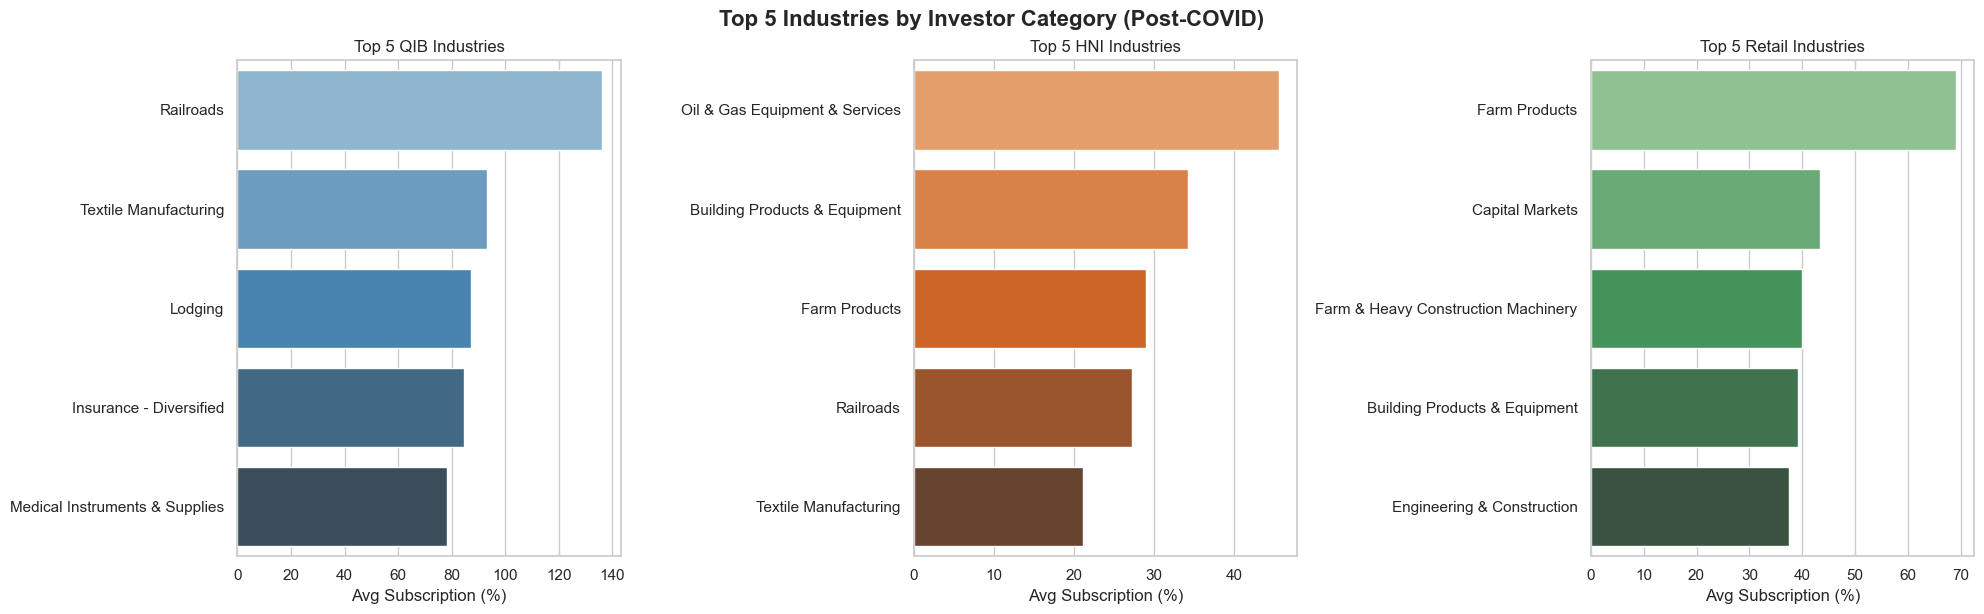

In [161]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'], errors='coerce')

df_post = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

industry_avg_subs = df_post.groupby('industry').agg({
    'qibSharePercent': 'mean',
    'niiSharePercent': 'mean',
    'retailSharePercent': 'mean'
}).reset_index()

industry_avg_subs.columns = ['industry', 'avg_qib_subs', 'avg_hni_subs', 'avg_retail_subs']

top5_qib_industry = industry_avg_subs.sort_values(by='avg_qib_subs', ascending=False).head(5)
top5_hni_industry = industry_avg_subs.sort_values(by='avg_hni_subs', ascending=False).head(5)
top5_retail_industry = industry_avg_subs.sort_values(by='avg_retail_subs', ascending=False).head(5)

print("🔵 Top 5 Industries by QIB Average Subscription:")
print(top5_qib_industry)

print("\n🟠 Top 5 Industries by HNI Average Subscription:")
print(top5_hni_industry)

print("\n🟢 Top 5 Industries by Retail Average Subscription:")
print(top5_retail_industry)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=top5_qib_industry, x='avg_qib_subs', y='industry', ax=axs[0], palette='Blues_d')
axs[0].set_title("Top 5 QIB Industries")

sns.barplot(data=top5_hni_industry, x='avg_hni_subs', y='industry', ax=axs[1], palette='Oranges_d')
axs[1].set_title("Top 5 HNI Industries")

sns.barplot(data=top5_retail_industry, x='avg_retail_subs', y='industry', ax=axs[2], palette='Greens_d')
axs[2].set_title("Top 5 Retail Industries")

for ax in axs:
    ax.set_xlabel("Avg Subscription (%)")
    ax.set_ylabel("")

plt.tight_layout()
plt.suptitle("Top 5 Industries by Investor Category (Post-COVID)", fontsize=16, weight='bold', y=1.02)
plt.show()

### Subscription Trend by Sector & Entity

Year              Sector  QIB Avg Subs  HNI Avg Subs  Retail Avg Subs
0   2020     Basic Materials         50.00         15.00            35.00
1   2020   Consumer Cyclical         75.00         15.00            10.00
2   2020  Financial Services         47.32         14.20            33.12
3   2020          Healthcare         50.00         15.00            35.00
4   2020         Industrials         49.72         14.91            34.80
5   2021     Basic Materials         54.39         14.95            30.34
6   2021   Consumer Cyclical         64.88         14.97            19.97
7   2021  Financial Services         58.85         13.52            26.50
8   2021          Healthcare         59.65         14.92            24.92
9   2021         Industrials         49.74         17.09            32.60
10  2022     Basic Materials         50.72         18.30            30.75
11  2022   Consumer Cyclical         54.12         14.98            30.80
12  2022  Financial Services         46.50         17.20            34.30
13  2022          Healthcare         49.75         14.93            34.82
14  2022         Industrials         59.30         14.98            25.60
15  2023     Basic Materials         50.00         15.00            35.00
16  2023   Consumer Cyclical         52.57         17.08            30.30
17  2023  Financial Services         53.01         14.84            31.10
18  2023          Healthcare         50.00         15.00            35.00
19  2023         Industrials         55.92         16.03            27.76
20  2024     Basic Materials         52.46         14.99            32.48
21  2024   Consumer Cyclical         59.44         14.98            25.45
22  2024  Financial Services         53.97         14.69            29.28
23  2024          Healthcare         61.13         14.95            23.57
24  2024         Industrials         54.05         14.89            30.32
25  2025     Basic Materials         58.19         17.46            40.73
26  2025   Consumer Cyclical        104.77         22.74            24.09
27  2025  Financial Services         44.92         13.48            31.44
28  2025          Healthcare         92.28         20.87            25.96
29  2025         Industrials         81.45         20.57            35.12

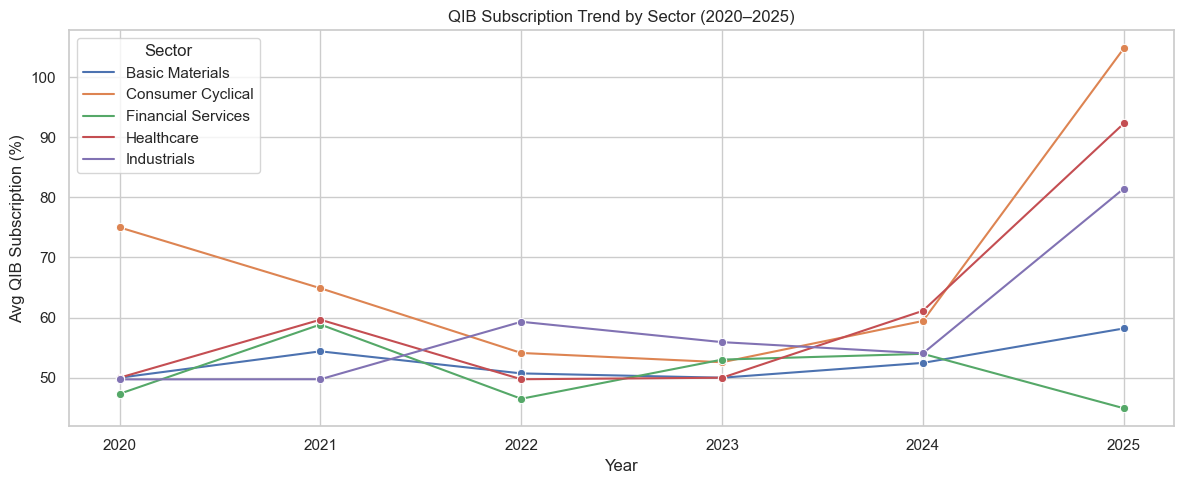

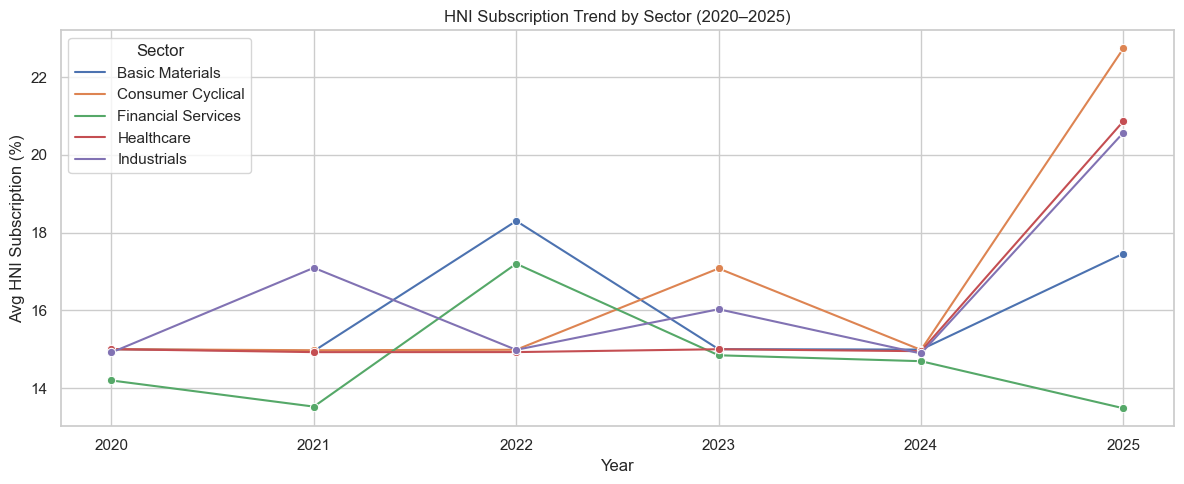

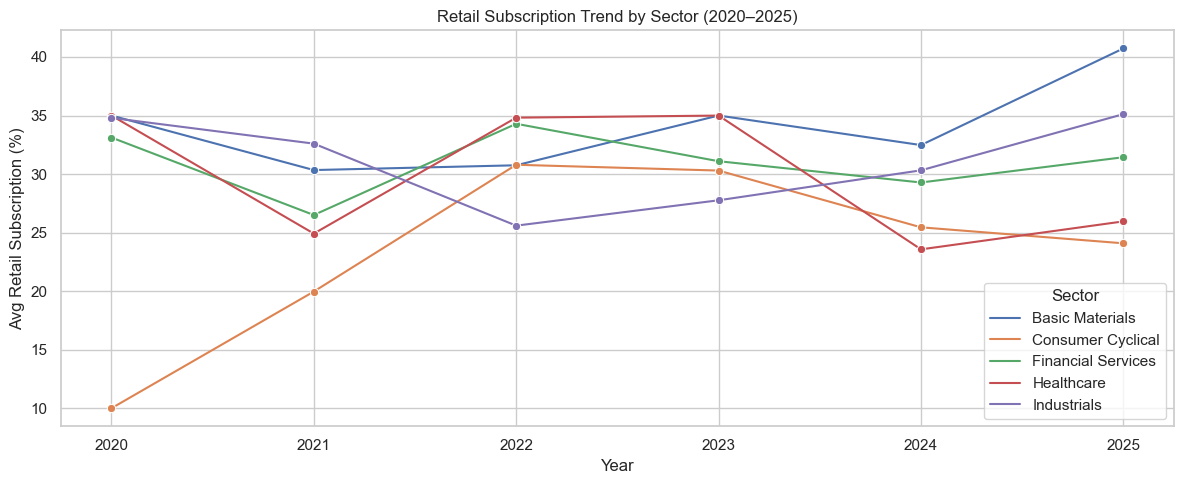

In [162]:
df_post = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

df_post['Year'] = df_post['startingDate'].dt.year

top_5_sectors = df_post['sector'].value_counts().head(5).index.tolist()

df_top5 = df_post[df_post['sector'].isin(top_5_sectors)]

sector_yearly_subs = df_top5.groupby(['Year', 'sector'])[
    ['qibSharePercent', 'niiSharePercent', 'retailSharePercent']
].mean().reset_index()

sector_yearly_subs.columns = ['Year', 'Sector', 'QIB Avg Subs', 'HNI Avg Subs', 'Retail Avg Subs']

display(sector_yearly_subs)
plt.figure(figsize=(12, 5))
sns.lineplot(data=sector_yearly_subs, x='Year', y='QIB Avg Subs', hue='Sector', marker='o')
plt.title("QIB Subscription Trend by Sector (2020–2025)")
plt.ylabel("Avg QIB Subscription (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
sns.lineplot(data=sector_yearly_subs, x='Year', y='HNI Avg Subs', hue='Sector', marker='o')
plt.title("HNI Subscription Trend by Sector (2020–2025)")
plt.ylabel("Avg HNI Subscription (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
sns.lineplot(data=sector_yearly_subs, x='Year', y='Retail Avg Subs', hue='Sector', marker='o')
plt.title("Retail Subscription Trend by Sector (2020–2025)")
plt.ylabel("Avg Retail Subscription (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Issue Size vs Subscription

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\1219516985.py:34: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



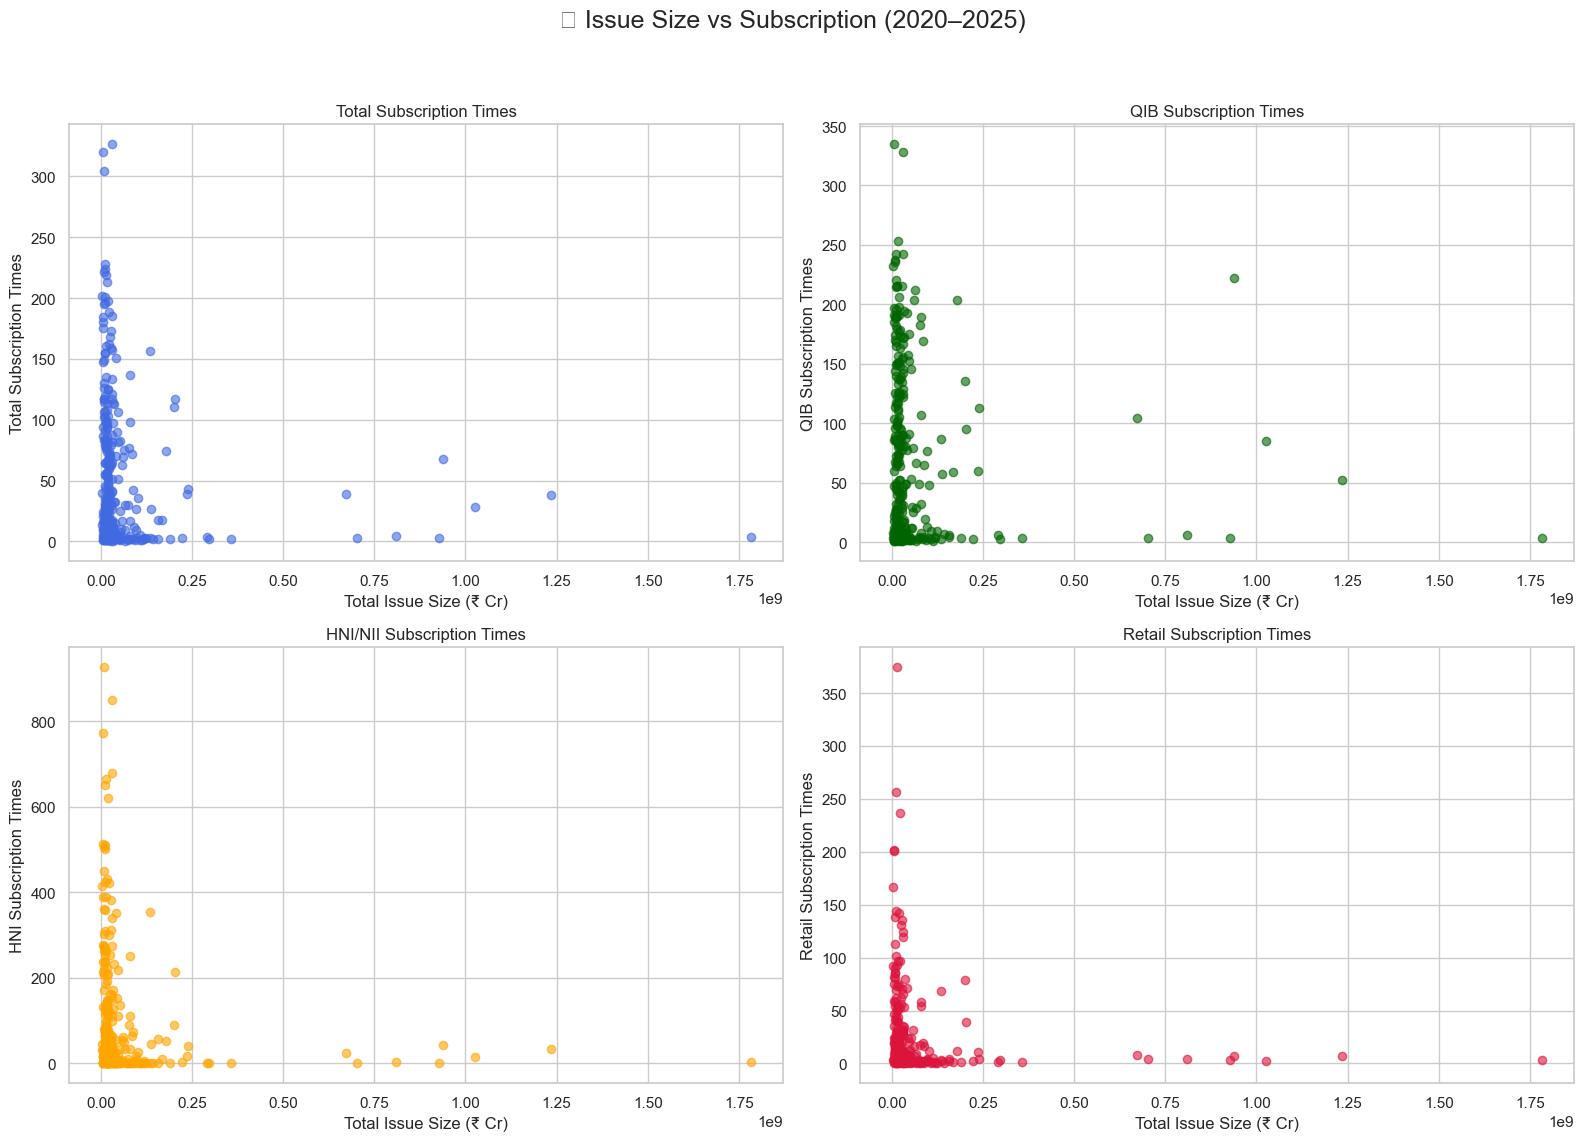

In [163]:
df_post_covid = df_combined[df_combined['startingDate'].dt.year >= 2020]

cols_needed = ['totalIssueSize', 'total_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'retail_subsTimes']
df_plot = df_post_covid[cols_needed].dropna()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Issue Size vs Subscription (2020–2025)', fontsize=18)

axes[0, 0].scatter(df_plot['totalIssueSize'], df_plot['total_subsTimes'], color='royalblue', alpha=0.6)
axes[0, 0].set_title('Total Subscription Times')
axes[0, 0].set_xlabel('Total Issue Size (₹ Cr)')
axes[0, 0].set_ylabel('Total Subscription Times')
axes[0, 0].grid(True)

axes[0, 1].scatter(df_plot['totalIssueSize'], df_plot['qib_subsTimes'], color='darkgreen', alpha=0.6)
axes[0, 1].set_title('QIB Subscription Times')
axes[0, 1].set_xlabel('Total Issue Size (₹ Cr)')
axes[0, 1].set_ylabel('QIB Subscription Times')
axes[0, 1].grid(True)

axes[1, 0].scatter(df_plot['totalIssueSize'], df_plot['nii_subsTimes'], color='orange', alpha=0.6)
axes[1, 0].set_title('HNI/NII Subscription Times')
axes[1, 0].set_xlabel('Total Issue Size (₹ Cr)')
axes[1, 0].set_ylabel('HNI Subscription Times')
axes[1, 0].grid(True)


axes[1, 1].scatter(df_plot['totalIssueSize'], df_plot['retail_subsTimes'], color='crimson', alpha=0.6)
axes[1, 1].set_title('Retail Subscription Times')
axes[1, 1].set_xlabel('Total Issue Size (₹ Cr)')
axes[1, 1].set_ylabel('Retail Subscription Times')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
plt.show()

## Section D

### 13. Employee/Shareholder Participation

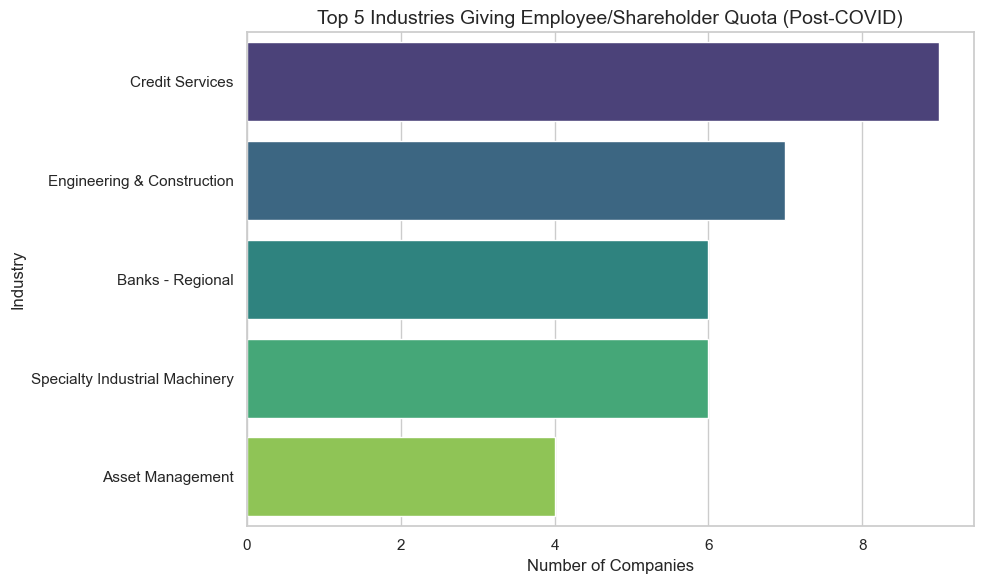

In [164]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'])

post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['niiSharePercent'] = post_covid_df['niiSharePercent'].fillna(0)

post_covid_df['hasEmpOrShareholderQuota'] = (
    100 - post_covid_df['qibSharePercent'].fillna(0)
        - post_covid_df['niiSharePercent'].fillna(0)
        - post_covid_df['retailSharePercent'].fillna(0)
) > 0

top_industries = (
    post_covid_df[post_covid_df['hasEmpOrShareholderQuota']]
    .groupby('industry')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='num_companies')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_industries, x='num_companies', y='industry', palette='viridis')
plt.title('Top 5 Industries Giving Employee/Shareholder Quota (Post-COVID)', fontsize=14)
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

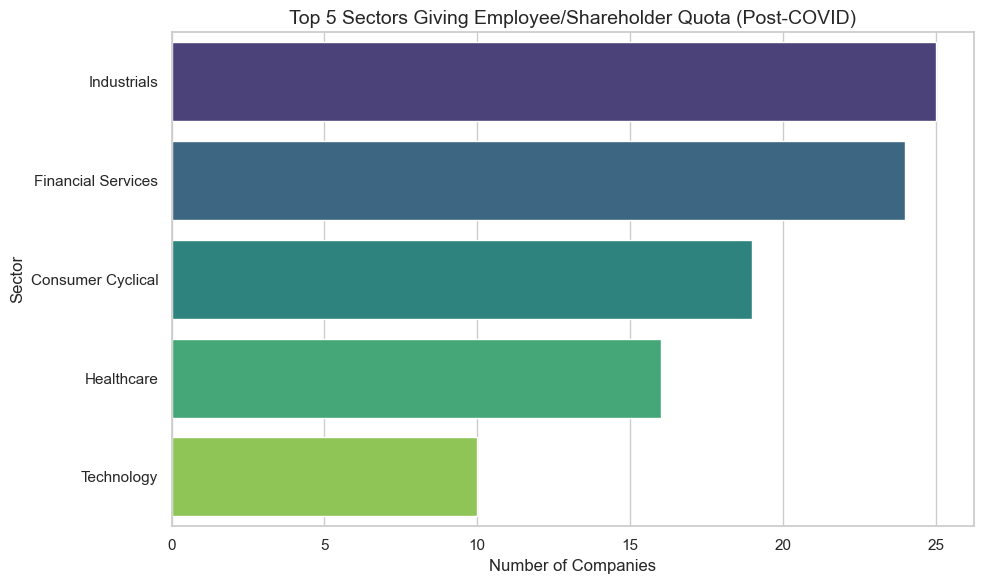

In [165]:
df_combined['startingDate'] = pd.to_datetime(df_combined['startingDate'])

post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['niiSharePercent'] = post_covid_df['niiSharePercent'].fillna(0)

post_covid_df['hasEmpOrShareholderQuota'] = (
    100 - post_covid_df['qibSharePercent'].fillna(0)
        - post_covid_df['niiSharePercent'].fillna(0)
        - post_covid_df['retailSharePercent'].fillna(0)
) > 0

top_sectors = (
    post_covid_df[post_covid_df['hasEmpOrShareholderQuota']]
    .groupby('sector')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='num_companies')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sectors, x='num_companies', y='sector', palette='viridis')
plt.title('Top 5 Sectors Giving Employee/Shareholder Quota (Post-COVID)', fontsize=14)
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

## Section E

### 14. Assets vs Total Subscription

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2209828609.py:23: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2209828609.py:23: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.



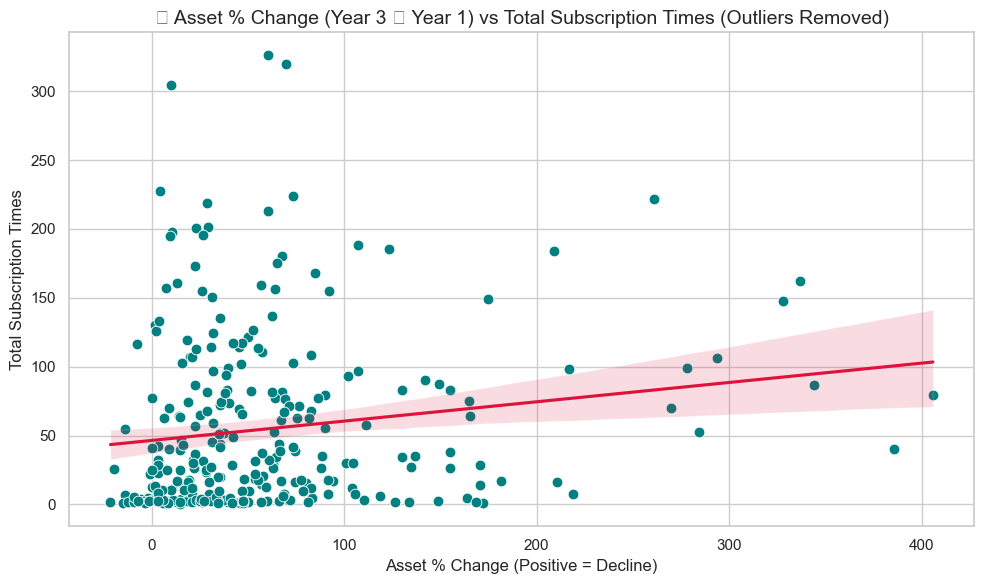

In [166]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['asset_growth_pct'] = (
    (post_covid_df['assets_year1_inCRrs'] - post_covid_df['assets_year3_inCRrs']) /
    post_covid_df['assets_year3_inCRrs']
) * 100

lower = np.percentile(post_covid_df['asset_growth_pct'].dropna(), 1)
upper = np.percentile(post_covid_df['asset_growth_pct'].dropna(), 99)
filtered_df = post_covid_df[
    (post_covid_df['asset_growth_pct'] >= lower) &
    (post_covid_df['asset_growth_pct'] <= upper)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='asset_growth_pct', y='total_subsTimes', color='teal', s=60)
sns.regplot(data=filtered_df, x='asset_growth_pct', y='total_subsTimes', scatter=False, color='crimson')

plt.title("📉 Asset % Change (Year 3 ➝ Year 1) vs Total Subscription Times (Outliers Removed)", fontsize=14)
plt.xlabel("Asset % Change (Positive = Decline)", fontsize=12)
plt.ylabel("Total Subscription Times", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### 15. Revenue vs Total Subscription

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\1238703802.py:23: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\1238703802.py:23: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.



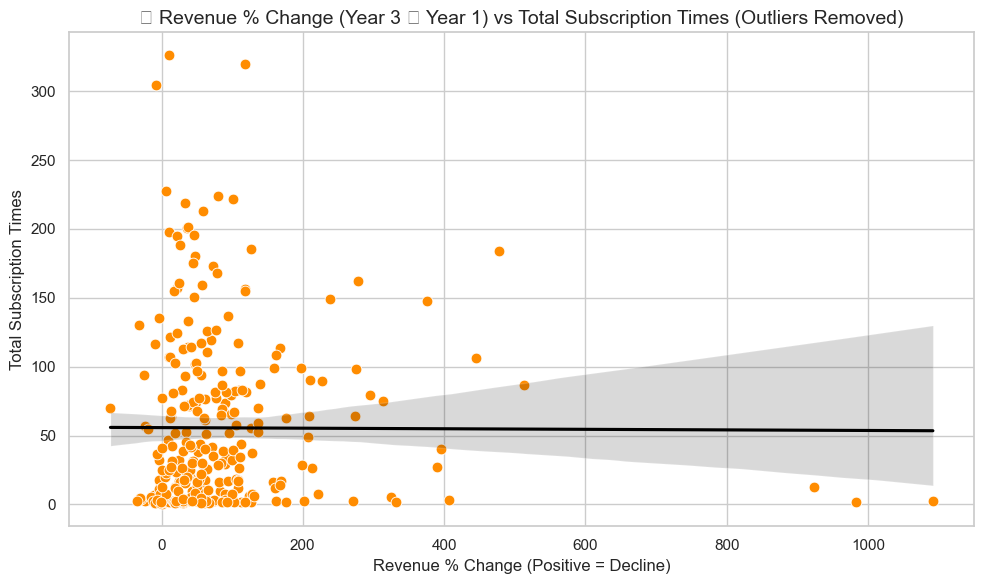

In [167]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['revenue_growth_pct'] = (
    (post_covid_df['revenue_year1_inCRrs'] - post_covid_df['revenue_year3_inCRrs']) /
    post_covid_df['revenue_year3_inCRrs']
) * 100

lower = np.percentile(post_covid_df['revenue_growth_pct'].dropna(), 1)
upper = np.percentile(post_covid_df['revenue_growth_pct'].dropna(), 99)
filtered_df = post_covid_df[
    (post_covid_df['revenue_growth_pct'] >= lower) &
    (post_covid_df['revenue_growth_pct'] <= upper)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='revenue_growth_pct', y='total_subsTimes', color='darkorange', s=60)
sns.regplot(data=filtered_df, x='revenue_growth_pct', y='total_subsTimes', scatter=False, color='black')

plt.title("📈 Revenue % Change (Year 3 ➝ Year 1) vs Total Subscription Times (Outliers Removed)", fontsize=14)
plt.xlabel("Revenue % Change (Positive = Decline)", fontsize=12)
plt.ylabel("Total Subscription Times", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### 16. Profit vs Total Subscription

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\3382105719.py:23: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\3382105719.py:23: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.



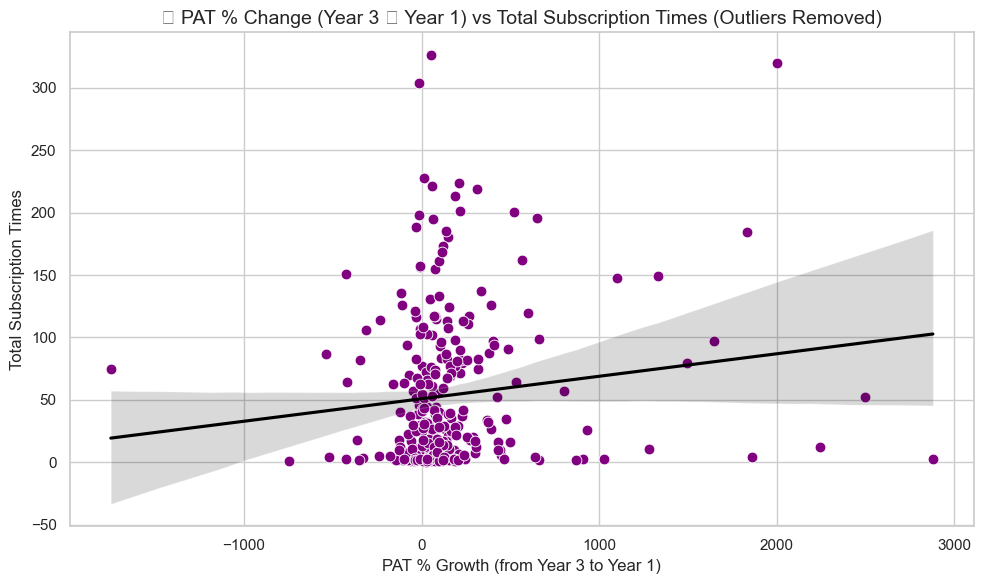

In [168]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['pat_growth_pct'] = (
    (post_covid_df['pat_year1_inCRrs'] - post_covid_df['pat_year3_inCRrs']) /
    post_covid_df['pat_year3_inCRrs']
) * 100

lower = np.percentile(post_covid_df['pat_growth_pct'].dropna(), 1.5)
upper = np.percentile(post_covid_df['pat_growth_pct'].dropna(), 98.5)
filtered_df = post_covid_df[
    (post_covid_df['pat_growth_pct'] >= lower) &
    (post_covid_df['pat_growth_pct'] <= upper)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='pat_growth_pct', y='total_subsTimes', color='purple', s=60)
sns.regplot(data=filtered_df, x='pat_growth_pct', y='total_subsTimes', scatter=False, color='black')

plt.title("💰 PAT % Change (Year 3 ➝ Year 1) vs Total Subscription Times (Outliers Removed)", fontsize=14)
plt.xlabel("PAT % Growth (from Year 3 to Year 1)", fontsize=12)
plt.ylabel("Total Subscription Times", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### 17.Assets vs Retail Subscription/HNI/QIB

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\3010489533.py:32: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\3010489533.py:32: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.



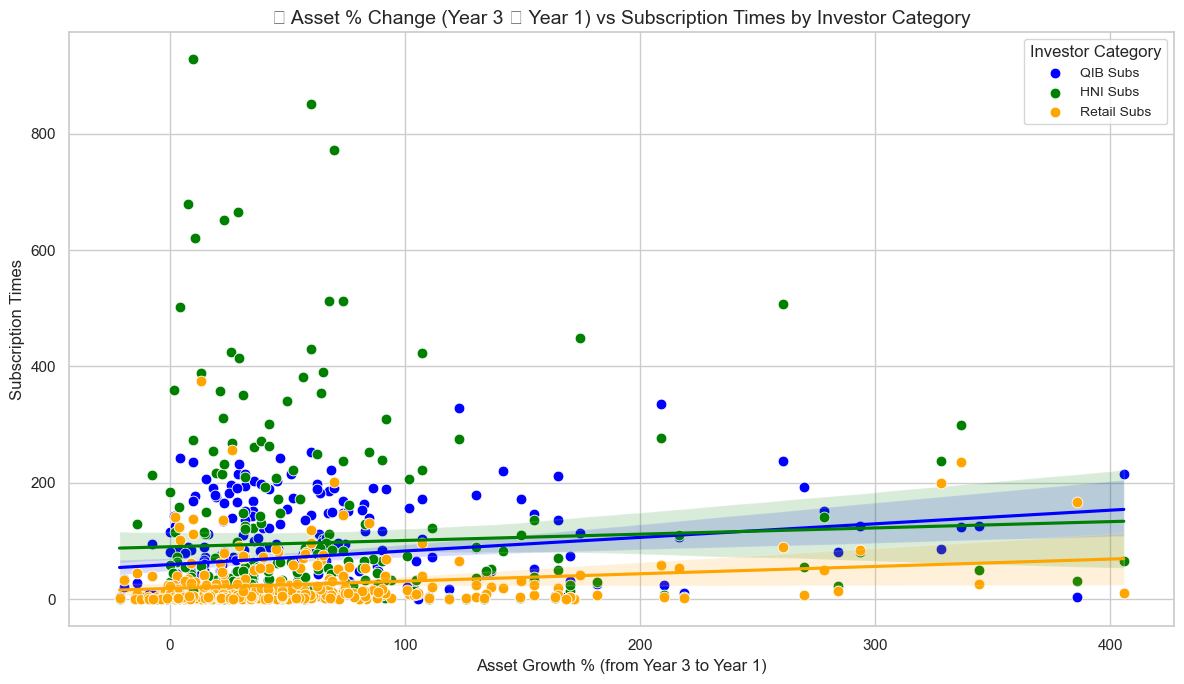

In [169]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['asset_growth_pct'] = (
    (post_covid_df['assets_year1_inCRrs'] - post_covid_df['assets_year3_inCRrs']) /
    post_covid_df['assets_year3_inCRrs']
) * 100

lower = np.percentile(post_covid_df['asset_growth_pct'].dropna(), 1)
upper = np.percentile(post_covid_df['asset_growth_pct'].dropna(), 99)
filtered_df = post_covid_df[
    (post_covid_df['asset_growth_pct'] >= lower) &
    (post_covid_df['asset_growth_pct'] <= upper)
]

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=filtered_df, x='asset_growth_pct', y='qib_subsTimes', color='blue', s=60, label='QIB Subs')
sns.regplot(data=filtered_df, x='asset_growth_pct', y='qib_subsTimes', scatter=False, color='blue')

sns.scatterplot(data=filtered_df, x='asset_growth_pct', y='nii_subsTimes', color='green', s=60, label='HNI Subs')
sns.regplot(data=filtered_df, x='asset_growth_pct', y='nii_subsTimes', scatter=False, color='green')

sns.scatterplot(data=filtered_df, x='asset_growth_pct', y='retail_subsTimes', color='orange', s=60, label='Retail Subs')
sns.regplot(data=filtered_df, x='asset_growth_pct', y='retail_subsTimes', scatter=False, color='orange')

plt.title("📉 Asset % Change (Year 3 ➝ Year 1) vs Subscription Times by Investor Category", fontsize=14)
plt.xlabel("Asset Growth % (from Year 3 to Year 1)", fontsize=12)
plt.ylabel("Subscription Times", fontsize=12)
plt.legend(title="Investor Category", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### 18.Revenue vs Retail Subscription/HNI/QIB

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2619306723.py:32: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\2619306723.py:32: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.



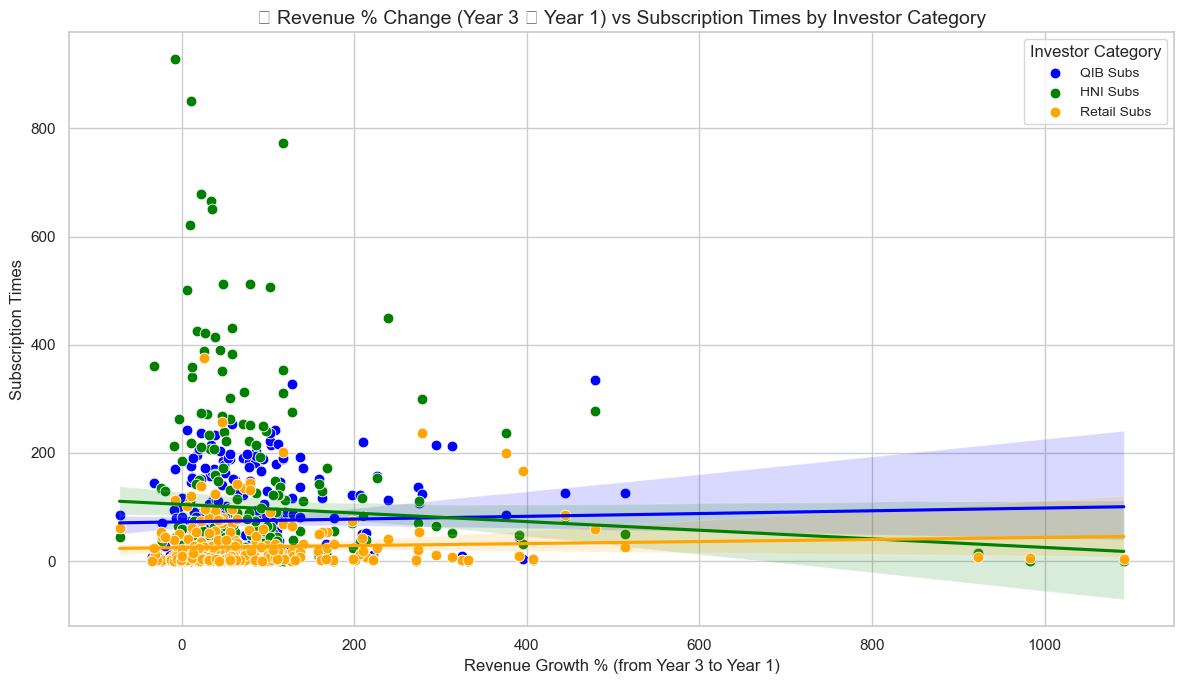

In [170]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['revenue_growth_pct'] = (
    (post_covid_df['revenue_year1_inCRrs'] - post_covid_df['revenue_year3_inCRrs']) /
    post_covid_df['revenue_year3_inCRrs']
) * 100

lower = np.percentile(post_covid_df['revenue_growth_pct'].dropna(), 1)
upper = np.percentile(post_covid_df['revenue_growth_pct'].dropna(), 99)
filtered_df = post_covid_df[
    (post_covid_df['revenue_growth_pct'] >= lower) &
    (post_covid_df['revenue_growth_pct'] <= upper)
]

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=filtered_df, x='revenue_growth_pct', y='qib_subsTimes', color='blue', s=60, label='QIB Subs')
sns.regplot(data=filtered_df, x='revenue_growth_pct', y='qib_subsTimes', scatter=False, color='blue')

sns.scatterplot(data=filtered_df, x='revenue_growth_pct', y='nii_subsTimes', color='green', s=60, label='HNI Subs')
sns.regplot(data=filtered_df, x='revenue_growth_pct', y='nii_subsTimes', scatter=False, color='green')

sns.scatterplot(data=filtered_df, x='revenue_growth_pct', y='retail_subsTimes', color='orange', s=60, label='Retail Subs')
sns.regplot(data=filtered_df, x='revenue_growth_pct', y='retail_subsTimes', scatter=False, color='orange')

plt.title("📊 Revenue % Change (Year 3 ➝ Year 1) vs Subscription Times by Investor Category", fontsize=14)
plt.xlabel("Revenue Growth % (from Year 3 to Year 1)", fontsize=12)
plt.ylabel("Subscription Times", fontsize=12)
plt.legend(title="Investor Category", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### 19.PAT vs Retail Subscription/HNI/QIB


C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\1747487451.py:32: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\1747487451.py:32: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.



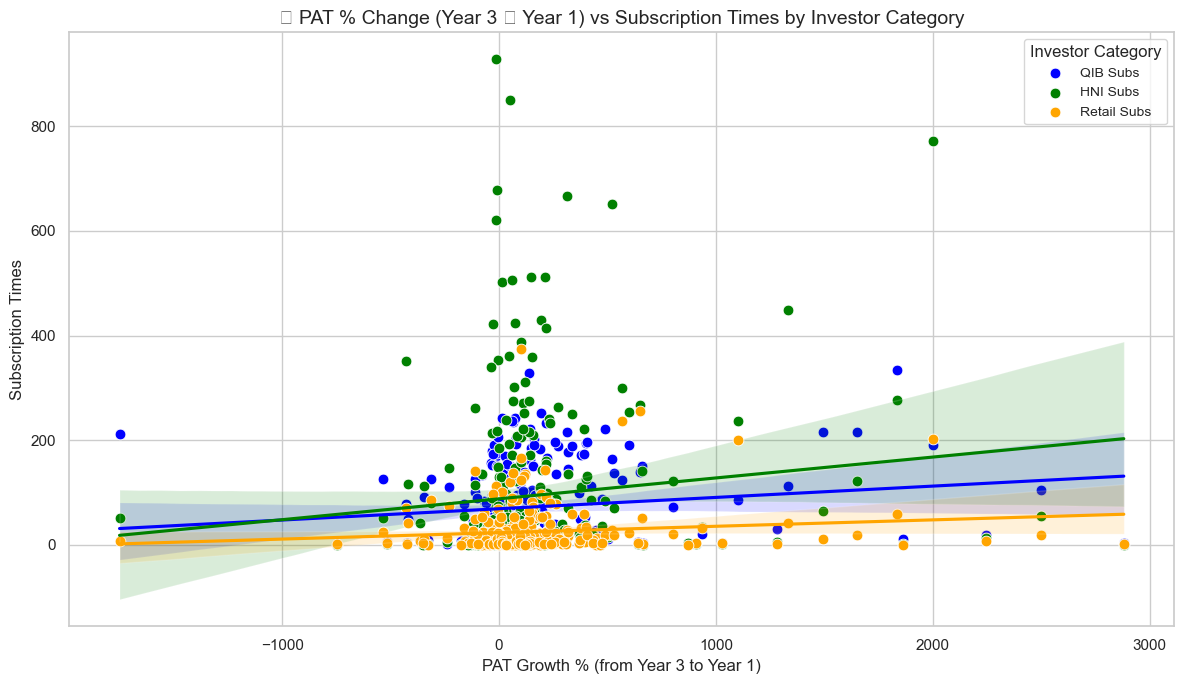

In [171]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['pat_growth_pct'] = (
    (post_covid_df['pat_year1_inCRrs'] - post_covid_df['pat_year3_inCRrs']) /
    post_covid_df['pat_year3_inCRrs']
) * 100

lower = np.percentile(post_covid_df['pat_growth_pct'].dropna(), 1.5)
upper = np.percentile(post_covid_df['pat_growth_pct'].dropna(), 98.5)
filtered_df = post_covid_df[
    (post_covid_df['pat_growth_pct'] >= lower) &
    (post_covid_df['pat_growth_pct'] <= upper)
]

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=filtered_df, x='pat_growth_pct', y='qib_subsTimes', color='blue', s=60, label='QIB Subs')
sns.regplot(data=filtered_df, x='pat_growth_pct', y='qib_subsTimes', scatter=False, color='blue')

sns.scatterplot(data=filtered_df, x='pat_growth_pct', y='nii_subsTimes', color='green', s=60, label='HNI Subs')
sns.regplot(data=filtered_df, x='pat_growth_pct', y='nii_subsTimes', scatter=False, color='green')

sns.scatterplot(data=filtered_df, x='pat_growth_pct', y='retail_subsTimes', color='orange', s=60, label='Retail Subs')
sns.regplot(data=filtered_df, x='pat_growth_pct', y='retail_subsTimes', scatter=False, color='orange')

plt.title("📊 PAT % Change (Year 3 ➝ Year 1) vs Subscription Times by Investor Category", fontsize=14)
plt.xlabel("PAT Growth % (from Year 3 to Year 1)", fontsize=12)
plt.ylabel("Subscription Times", fontsize=12)
plt.legend(title="Investor Category", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### Financial Growth vs Subscription (Bubble Chart)

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\4096996195.py:52: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\AppData\Local\Temp\ipykernel_19340\4096996195.py:52: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from current font.

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



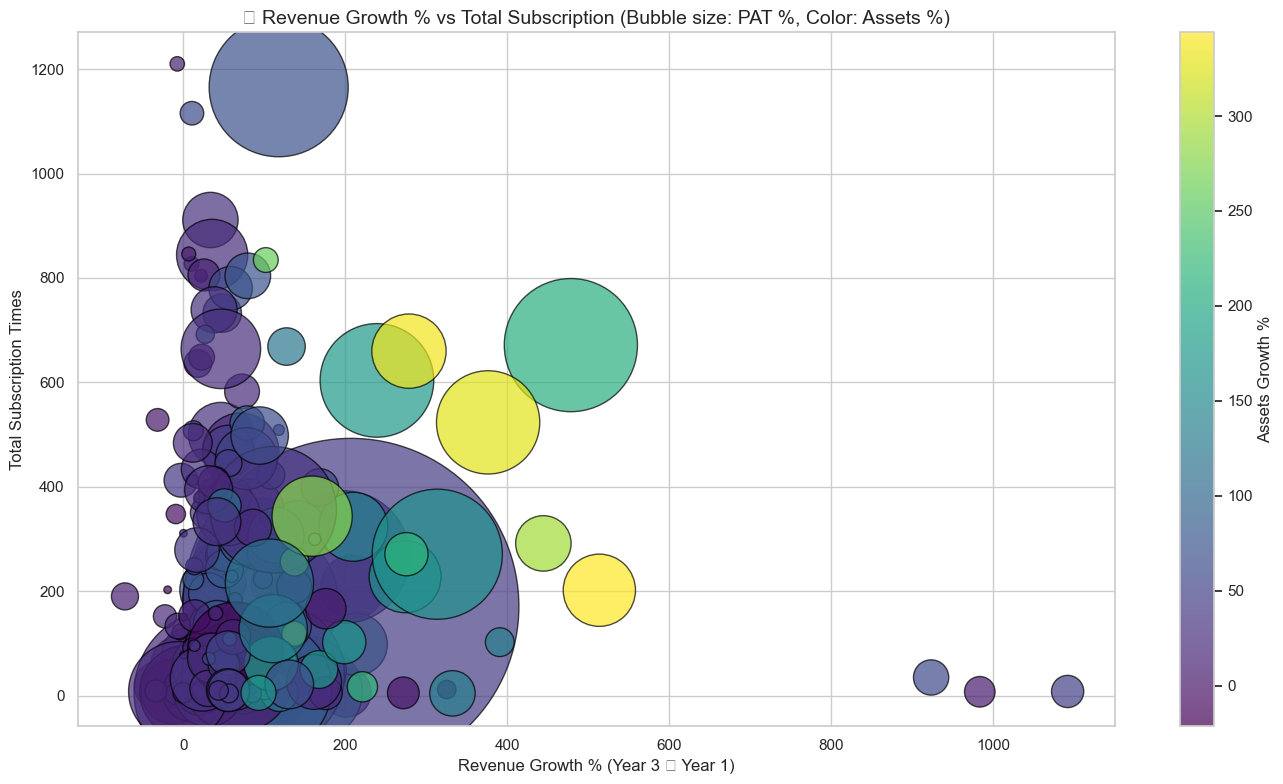

In [172]:
post_covid_df = df_combined[df_combined['startingDate'].dt.year >= 2020].copy()

post_covid_df['revenue_growth_pct'] = (
    (post_covid_df['revenue_year1_inCRrs'] - post_covid_df['revenue_year3_inCRrs']) /
    post_covid_df['revenue_year3_inCRrs']
) * 100

post_covid_df['pat_growth_pct'] = (
    (post_covid_df['pat_year1_inCRrs'] - post_covid_df['pat_year3_inCRrs']) /
    post_covid_df['pat_year3_inCRrs']
) * 100

post_covid_df['assets_growth_pct'] = (
    (post_covid_df['assets_year1_inCRrs'] - post_covid_df['assets_year3_inCRrs']) /
    post_covid_df['assets_year3_inCRrs']
) * 100

post_covid_df['total_subsTimes'] = (
    post_covid_df['qib_subsTimes'].fillna(0) +
    post_covid_df['nii_subsTimes'].fillna(0) +
    post_covid_df['retail_subsTimes'].fillna(0)
)

for col in ['revenue_growth_pct', 'pat_growth_pct', 'assets_growth_pct']:
    lower = np.percentile(post_covid_df[col].dropna(), 1)
    upper = np.percentile(post_covid_df[col].dropna(), 99)
    post_covid_df = post_covid_df[
        (post_covid_df[col] >= lower) & (post_covid_df[col] <= upper)
    ]

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = plt.scatter(
    data=post_covid_df,
    x='revenue_growth_pct',
    y='total_subsTimes',
    s=post_covid_df['pat_growth_pct'].abs() * 5 + 30,  # PAT% as bubble size
    c=post_covid_df['assets_growth_pct'],  # color by assets growth
    cmap='viridis',
    alpha=0.7,
    edgecolor='black'
)

cbar = plt.colorbar(bubble)
cbar.set_label("Assets Growth %")

plt.title("📊 Revenue Growth % vs Total Subscription (Bubble size: PAT %, Color: Assets %)", fontsize=14)
plt.xlabel("Revenue Growth % (Year 3 ➝ Year 1)", fontsize=12)
plt.ylabel("Total Subscription Times", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Section F

### TOP 5 company : GMP>issue price

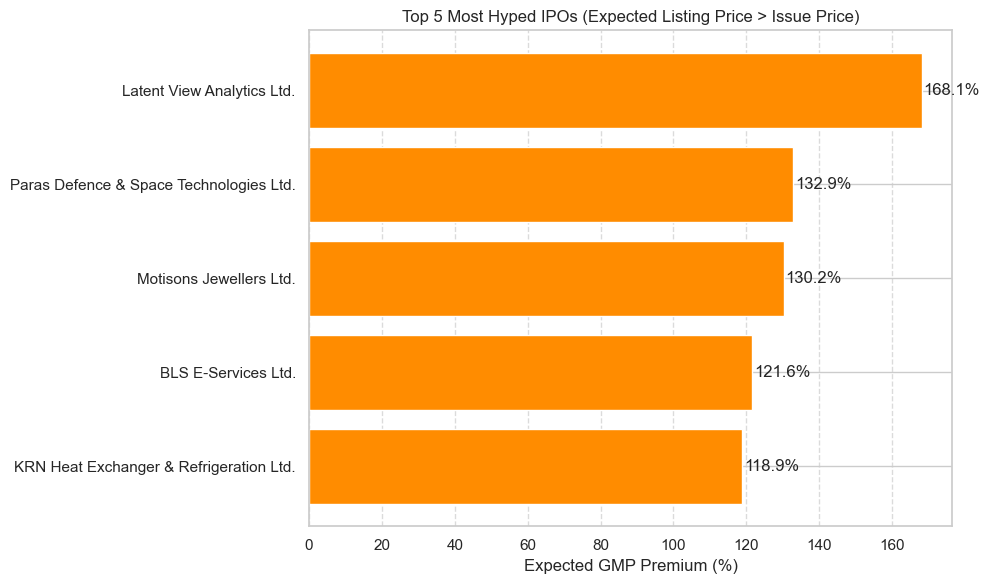


📊 Full List of Hyped IPOs (Expected Listing Price > Issue Price):

Stock Name                               Issue Price (₹)   Expected Price (₹)     Hype %
------------------------------------------------------------------------------------------
Latent View Analytics Ltd.                        197.00               528.25     168.15
Paras Defence & Space Technologies Ltd.           175.00               407.50     132.86
Motisons Jewellers Ltd.                            55.00               126.62     130.23
BLS E-Services Ltd.                               135.00               299.12     121.57
KRN Heat Exchanger & Refrigeration Ltd.           220.00               481.62     118.92
Sigachi Industries Ltd.                           163.00               347.12     112.96
Exicom Tele-Systems Ltd.                          142.00               302.12     112.76
Mukka Proteins Ltd.                                28.00                59.38     112.05
Bajaj Housing Finance Ltd.              

In [173]:
df_pre = df_cleaned.copy()

df_pre['expected_listing_price'] = pd.to_numeric(df_pre['final_avg_gmp_perShare'], errors='coerce')
df_pre['issuePrice_perShareinRs'] = pd.to_numeric(df_pre['issuePrice_perShareinRs'], errors='coerce')

df_hyped = df_pre[df_pre['expected_listing_price'] > df_pre['issuePrice_perShareinRs']].copy()

df_hyped['hype_percent'] = (
    (df_hyped['expected_listing_price'] - df_hyped['issuePrice_perShareinRs'])
    / df_hyped['issuePrice_perShareinRs']
) * 100

df_hyped = df_hyped.sort_values(by='hype_percent', ascending=False)

# --- Plot Top 5 ---
top5 = df_hyped.head(5)
plt.figure(figsize=(10, 6))
bars = plt.barh(top5['stockName_chittorgarh'], top5['hype_percent'], color='darkorange')
plt.xlabel('Expected GMP Premium (%)')
plt.title('Top 5 Most Hyped IPOs (Expected Listing Price > Issue Price)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}%", va='center')

plt.tight_layout()
plt.show()

# --- Printing Full Table ---
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Full List of Hyped IPOs (Expected Listing Price > Issue Price):\n")
print(f"{'Stock Name':40} {'Issue Price (₹)':>15} {'Expected Price (₹)':>20} {'Hype %':>10}")
print("-" * 90)
for _, row in df_hyped.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['issuePrice_perShareinRs']:15.2f} "
          f"{row['expected_listing_price']:20.2f} "
          f"{row['hype_percent']:10.2f}")


### TOP 5 company : GMP<issue price

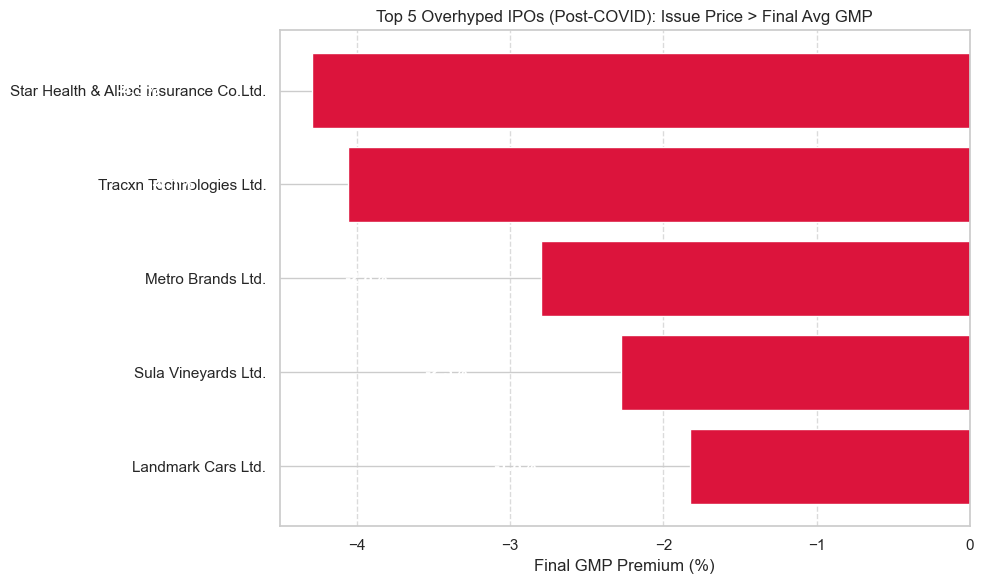


📊 Full List of Overhyped IPOs (Final Avg GMP < Issue Price):

Stock Name                               Issue Price (₹)    Final Avg GMP (₹)   Hype Gap %
------------------------------------------------------------------------------------------
Star Health & Allied Insurance Co.Ltd.            900.00               861.38        -4.29
Tracxn Technologies Ltd.                           80.00                76.75        -4.06
Metro Brands Ltd.                                 500.00               486.00        -2.80
Sula Vineyards Ltd.                               357.00               348.88        -2.28
Landmark Cars Ltd.                                506.00               496.75        -1.83
Inox Green Energy Services Ltd.                    65.00                64.00        -1.54
Life Insurance Corp.of India                      949.00               936.38        -1.33
Delhivery Ltd.                                    487.00               480.88        -1.26
Vedant Fashions Ltd.       

In [174]:
df_pre = df_cleaned.copy()

df_pre['final_avg_gmp'] = df_pre['final_avg_gmp_perShare']

df_overhyped = df_pre[df_pre['final_avg_gmp'] < df_pre['issuePrice_perShareinRs']].copy()

df_overhyped['hype_gap_pct'] = (
    (df_overhyped['final_avg_gmp'] - df_overhyped['issuePrice_perShareinRs'])
    / df_overhyped['issuePrice_perShareinRs']
) * 100

top5_overhyped = df_overhyped.sort_values(by='hype_gap_pct').head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top5_overhyped['stockName_chittorgarh'], top5_overhyped['hype_gap_pct'], color='crimson')
plt.xlabel('Final GMP Premium (%)')
plt.title('Top 5 Overhyped IPOs (Post-COVID): Issue Price > Final Avg GMP')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# --- Print full sorted table ---
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Full List of Overhyped IPOs (Final Avg GMP < Issue Price):\n")
print(f"{'Stock Name':40} {'Issue Price (₹)':>15} {'Final Avg GMP (₹)':>20} {'Hype Gap %':>12}")
print("-" * 90)
for _, row in df_overhyped.sort_values(by='hype_gap_pct').iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['issuePrice_perShareinRs']:15.2f} "
          f"{row['final_avg_gmp']:20.2f} "
          f"{row['hype_gap_pct']:12.2f}")


### sector gmp over issue price (overall loss and gain in one graph)

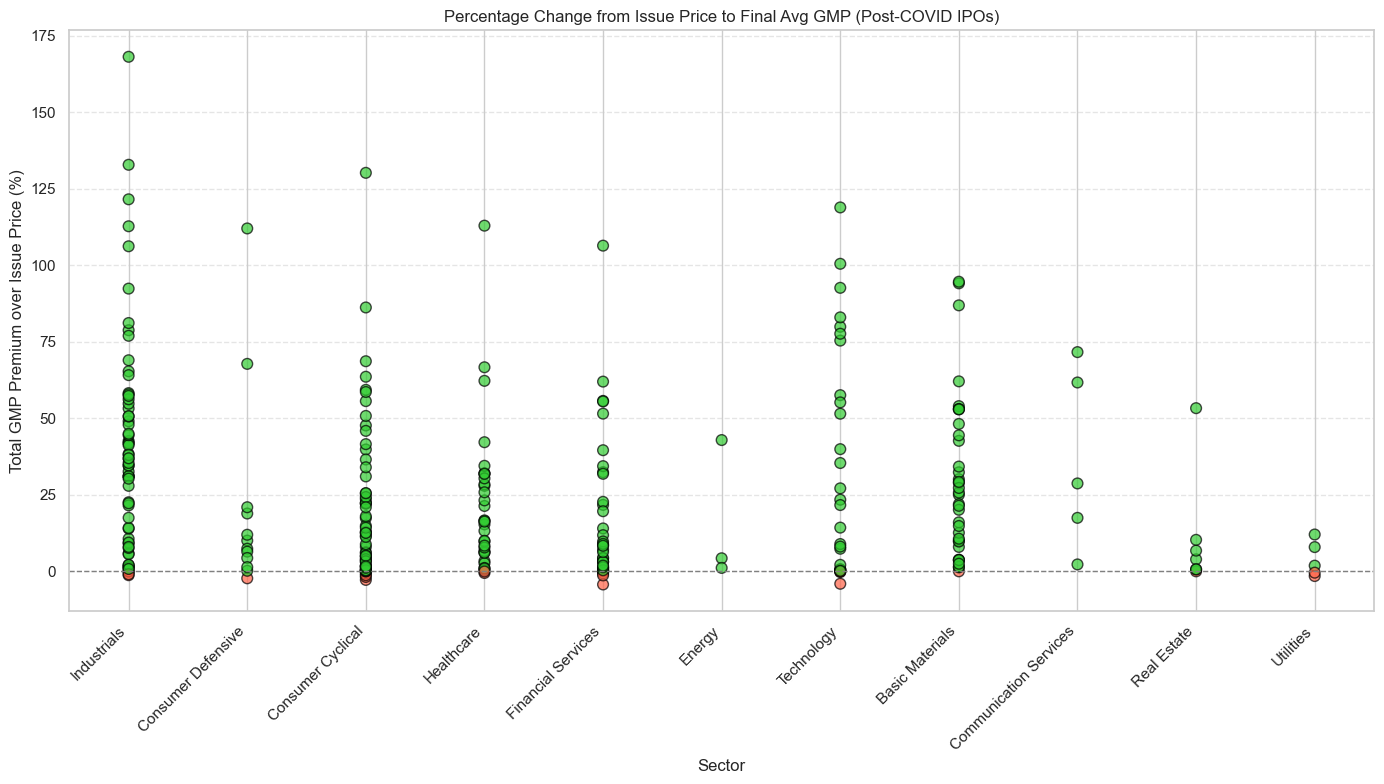


📊 Data Used for Scatter Plot:

Sector                          Final Avg GMP (₹) Issue Price (₹)  Final Premium (%)      Color
-----------------------------------------------------------------------------------------------
Industrials                                412.75          315.00              31.03  limegreen
Consumer Defensive                         483.25          288.00              67.80  limegreen
Consumer Cyclical                           93.38           60.00              55.62  limegreen
Healthcare                                1550.38         1500.00               3.36  limegreen
Financial Services                          37.62           33.00              14.02  limegreen
Energy                                     125.12          120.00               4.27  limegreen
Financial Services                         560.38          554.00               1.15  limegreen
Industrials                                259.25          145.00              78.79  limegreen
Financia

In [175]:
df_post = df_cleaned.copy()

df_post['final_premium_pct'] = (
    (df_post['final_avg_gmp_perShare'] - df_post['issuePrice_perShareinRs']) /
    df_post['issuePrice_perShareinRs']
) * 100

df_post['color'] = df_post['final_premium_pct'].apply(lambda x: 'limegreen' if x > 0 else 'tomato')

plt.figure(figsize=(14, 8))
plt.scatter(
    x=df_post['sector'],
    y=df_post['final_premium_pct'],
    s=60,
    color=df_post['color'],
    alpha=0.7,
    edgecolors='black'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total GMP Premium over Issue Price (%)")
plt.xlabel("Sector")
plt.title("Percentage Change from Issue Price to Final Avg GMP (Post-COVID IPOs)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Print the data used for scatter plot in a clean tabular format ---
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Data Used for Scatter Plot:\n")
print(f"{'Sector':30} {'Final Avg GMP (₹)':>18} {'Issue Price (₹)':>15} {'Final Premium (%)':>18} {'Color':>10}")
print("-" * 95)
for _, row in df_post.iterrows():
    print(f"{str(row['sector'])[:30]:30} "
          f"{row['final_avg_gmp_perShare']:18.2f} "
          f"{row['issuePrice_perShareinRs']:15.2f} "
          f"{row['final_premium_pct']:18.2f} "
          f"{row['color']:>10}")

# --- Print average final premium % by sector ---
print("\n\n📈 Average Final GMP Premium (%) by Sector:\n")
sector_summary = (
    df_post.groupby('sector')['final_premium_pct']
    .mean()
    .reset_index()
    .sort_values(by='final_premium_pct', ascending=False)
)

print(f"{'Sector':30} {'Avg Final Premium (%)':>22}")
print("-" * 55)
for _, row in sector_summary.iterrows():
    print(f"{str(row['sector'])[:30]:30} {row['final_premium_pct']:22.2f}")


### sector gmp loss over issue price

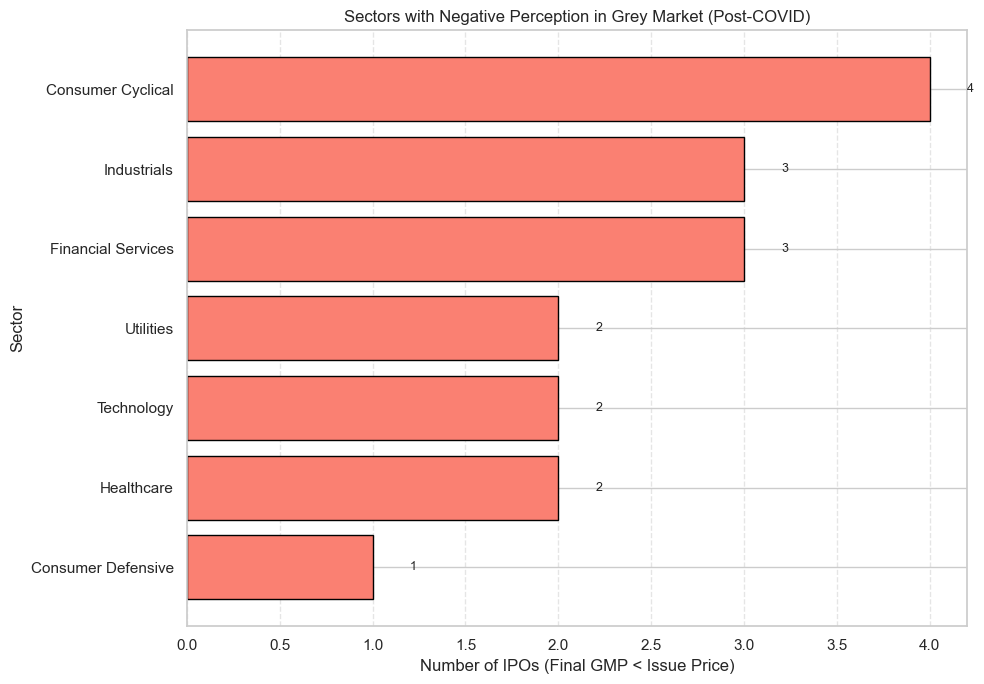


📊 Sector-wise Summary of Negative GMP Perception:

Sector                           Avg Discount (%)  Number of IPOs
-----------------------------------------------------------------
Consumer Defensive                          -2.28               1
Healthcare                                  -0.30               2
Technology                                  -2.15               2
Utilities                                   -0.99               2
Financial Services                          -2.10               3
Industrials                                 -0.80               3
Consumer Cyclical                           -1.63               4


📋 Full IPO-level Data Behind the Chart:

Sector                          Final Avg GMP (₹) Issue Price (₹)   GMP Discount (%)
-------------------------------------------------------------------------------------
Consumer Cyclical                          486.00          500.00              -2.80
Financial Services                         861.38      

In [176]:
df_post = df_cleaned.copy()

df_neg_post = df_post[df_post['final_avg_gmp_perShare'] < df_post['issuePrice_perShareinRs']].copy()

df_neg_post['gmp_discount_pct'] = (
    (df_neg_post['final_avg_gmp_perShare'] - df_neg_post['issuePrice_perShareinRs']) /
    df_neg_post['issuePrice_perShareinRs']
) * 100

sector_neg = df_neg_post.groupby('sector').agg(
    avg_discount_pct=('gmp_discount_pct', 'mean'),
    num_ipos=('gmp_discount_pct', 'count')
).reset_index()

sector_neg_sorted = sector_neg.sort_values('num_ipos', ascending=True)

plt.figure(figsize=(10, 7))
bars = plt.barh(
    sector_neg_sorted['sector'],
    sector_neg_sorted['num_ipos'],
    color='salmon',
    edgecolor='black'
)

for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, int(bar.get_width()), va='center', fontsize=9)

plt.xlabel("Number of IPOs (Final GMP < Issue Price)")
plt.ylabel("Sector")
plt.title("Sectors with Negative Perception in Grey Market (Post-COVID)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Nicely formatted prints ---
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Sector-wise Summary of Negative GMP Perception:\n")
print(f"{'Sector':30} {'Avg Discount (%)':>18} {'Number of IPOs':>15}")
print("-" * 65)
for _, row in sector_neg_sorted.iterrows():
    print(f"{str(row['sector'])[:30]:30} {row['avg_discount_pct']:18.2f} {row['num_ipos']:15}")

print("\n\n📋 Full IPO-level Data Behind the Chart:\n")
print(f"{'Sector':30} {'Final Avg GMP (₹)':>18} {'Issue Price (₹)':>15} {'GMP Discount (%)':>18}")
print("-" * 85)
for _, row in df_neg_post.iterrows():
    print(f"{str(row['sector'])[:30]:30} "
          f"{row['final_avg_gmp_perShare']:18.2f} "
          f"{row['issuePrice_perShareinRs']:15.2f} "
          f"{row['gmp_discount_pct']:18.2f}")


### NEW.sector gmp loss over issue price

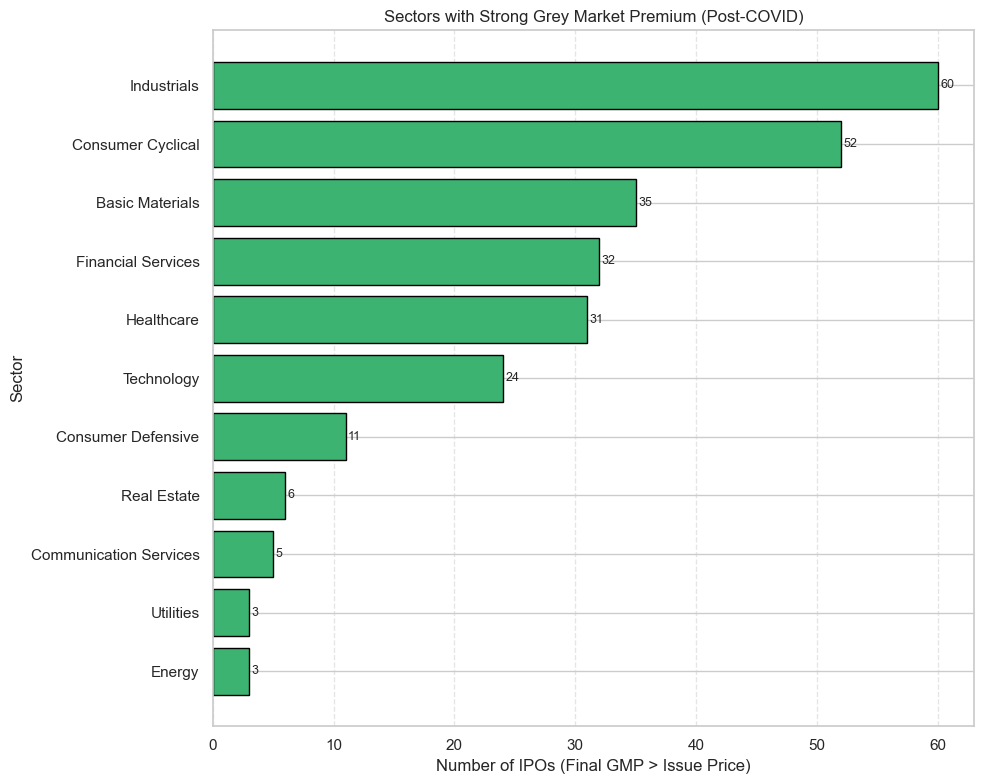


📊 Sector-wise Summary of Grey Market Premium:

Sector                            Avg Premium (%)  Number of IPOs
-----------------------------------------------------------------
Energy                                      16.10               3
Utilities                                    7.27               3
Communication Services                      36.36               5
Real Estate                                 12.60               6
Consumer Defensive                          23.77              11
Technology                                  40.94              24
Healthcare                                  22.99              31
Financial Services                          19.77              32
Basic Materials                             30.87              35
Consumer Cyclical                           23.64              52
Industrials                                 42.97              60


📋 Full IPO-level Data Behind the Chart:

Sector                          Final Avg GMP (₹) I

In [177]:
df_post = df_cleaned.copy()

df_post['final_avg_gmp'] = df_post['final_avg_gmp_perShare']

df_hype_post = df_post[df_post['final_avg_gmp'] > df_post['issuePrice_perShareinRs']].copy()

df_hype_post['gmp_premium_percent'] = (
    (df_hype_post['final_avg_gmp'] - df_hype_post['issuePrice_perShareinRs']) /
    df_hype_post['issuePrice_perShareinRs']
) * 100

sector_hype = df_hype_post.groupby('sector').agg(
    avg_premium_percent=('gmp_premium_percent', 'mean'),
    num_ipos=('gmp_premium_percent', 'count')
).reset_index()

sector_hype_sorted = sector_hype.sort_values('num_ipos', ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(
    sector_hype_sorted['sector'],
    sector_hype_sorted['num_ipos'],
    color='mediumseagreen',
    edgecolor='black'
)

for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             int(bar.get_width()), va='center', fontsize=9)

plt.xlabel("Number of IPOs (Final GMP > Issue Price)")
plt.ylabel("Sector")
plt.title("Sectors with Strong Grey Market Premium (Post-COVID)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Nicely formatted prints ---
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Sector-wise Summary of Grey Market Premium:\n")
print(f"{'Sector':30} {'Avg Premium (%)':>18} {'Number of IPOs':>15}")
print("-" * 65)
for _, row in sector_hype_sorted.iterrows():
    print(f"{str(row['sector'])[:30]:30} {row['avg_premium_percent']:18.2f} {row['num_ipos']:15}")

print("\n\n📋 Full IPO-level Data Behind the Chart:\n")
print(f"{'Sector':30} {'Final Avg GMP (₹)':>18} {'Issue Price (₹)':>15} {'GMP Premium (%)':>18}")
print("-" * 85)
for _, row in df_hype_post.iterrows():
    print(f"{str(row['sector'])[:30]:30} "
          f"{row['final_avg_gmp']:18.2f} "
          f"{row['issuePrice_perShareinRs']:15.2f} "
          f"{row['gmp_premium_percent']:18.2f}")


### industry gmp gain over issue price

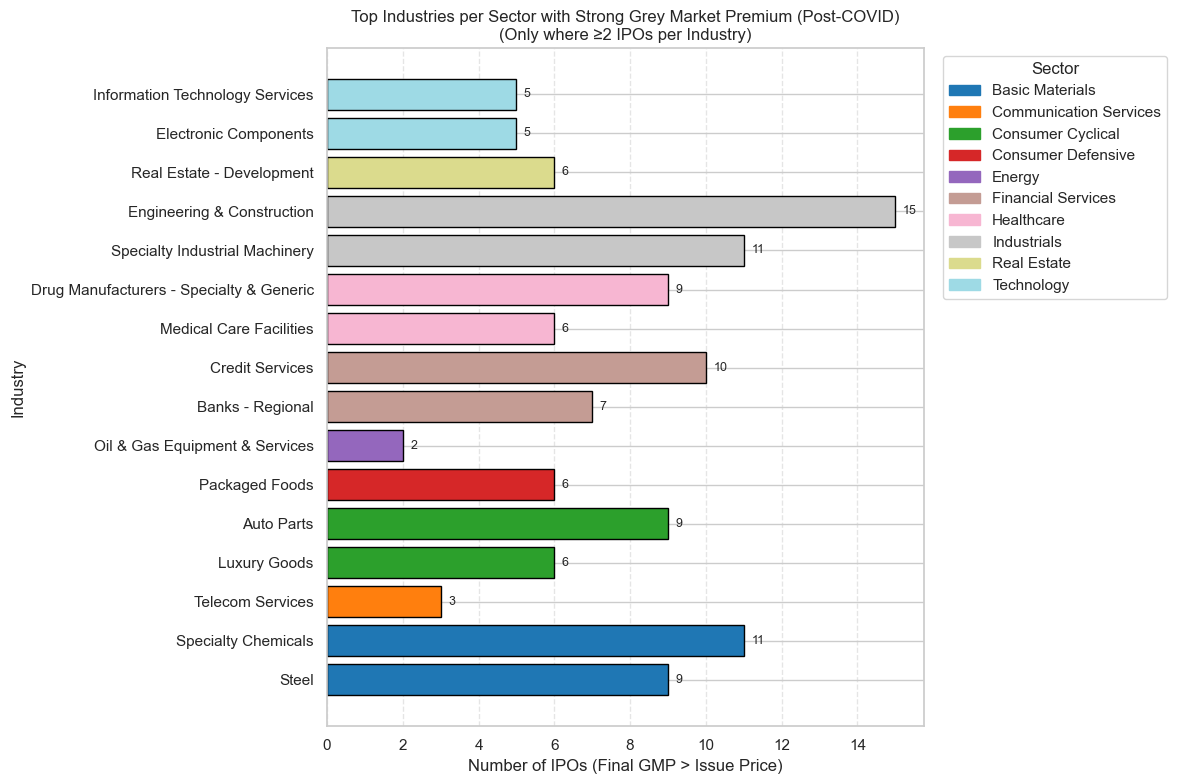


📊 Top Industries per Sector (≥2 IPOs) with Grey Market Premium:

Sector               Industry                               Avg Premium (%)  Number of IPOs
------------------------------------------------------------------------------------------
Basic Materials      Steel                                            31.84               9
Basic Materials      Specialty Chemicals                              48.48              11
Communication Servic Telecom Services                                 35.97               3
Consumer Cyclical    Luxury Goods                                     39.61               6
Consumer Cyclical    Auto Parts                                        9.84               9
Consumer Defensive   Packaged Foods                                   34.60               6
Energy               Oil & Gas Equipment & Services                    2.69               2
Financial Services   Banks - Regional                                 18.03               7
Financial Servi

In [178]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

df_post = df_cleaned.copy()

df_post['final_avg_gmp'] = df_post['final_avg_gmp_perShare']

df_hype_post = df_post[df_post['final_avg_gmp'] > df_post['issuePrice_perShareinRs']].copy()

df_hype_post['gmp_premium_percent'] = (
    (df_hype_post['final_avg_gmp'] - df_hype_post['issuePrice_perShareinRs']) /
     df_hype_post['issuePrice_perShareinRs']
) * 100

# Group by sector & industry
grouped = df_hype_post.groupby(['sector', 'industry']).agg(
    avg_premium_percent=('gmp_premium_percent', 'mean'),
    num_ipos=('gmp_premium_percent', 'count')
).reset_index()

# Keep only industries with more than 1 IPO
filtered = grouped[grouped['num_ipos'] > 1].copy()

# Top 2 industries per sector
top_industries_per_sector = (
    filtered.sort_values(['sector', 'num_ipos'], ascending=[True, False])
    .groupby('sector')
    .head(2)
    .sort_values(['sector', 'num_ipos'])
)

# Colors for each sector
unique_sectors = top_industries_per_sector['sector'].unique()
colors = cm.get_cmap('tab20', len(unique_sectors))
sector_color_map = {sector: mcolors.to_hex(colors(i)) for i, sector in enumerate(unique_sectors)}
bar_colors = top_industries_per_sector['sector'].map(sector_color_map)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top_industries_per_sector['industry'],
    top_industries_per_sector['num_ipos'],
    color=bar_colors,
    edgecolor='black'
)

for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             int(bar.get_width()), va='center', fontsize=9)

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=sector_color_map[s]) for s in unique_sectors]
plt.legend(handles, unique_sectors, title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xlabel("Number of IPOs (Final GMP > Issue Price)")
plt.ylabel("Industry")
plt.title("Top Industries per Sector with Strong Grey Market Premium (Post-COVID)\n(Only where ≥2 IPOs per Industry)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Nicely formatted print output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Top Industries per Sector (≥2 IPOs) with Grey Market Premium:\n")
print(f"{'Sector':20} {'Industry':35} {'Avg Premium (%)':>18} {'Number of IPOs':>15}")
print("-" * 90)
for _, row in top_industries_per_sector.iterrows():
    print(f"{str(row['sector'])[:20]:20} {str(row['industry'])[:35]:35} "
          f"{row['avg_premium_percent']:18.2f} {row['num_ipos']:15}")

print("\n\n📋 Full IPO-level Data Behind the Chart:\n")
print(f"{'Sector':20} {'Industry':35} {'Final Avg GMP (₹)':>18} {'Issue Price (₹)':>15} {'GMP Premium (%)':>18}")
print("-" * 110)
for _, row in df_hype_post.iterrows():
    print(f"{str(row['sector'])[:20]:20} {str(row['industry'])[:35]:35} "
          f"{row['final_avg_gmp']:18.2f} {row['issuePrice_perShareinRs']:15.2f} {row['gmp_premium_percent']:18.2f}")


### Industry gmp loss over issue price

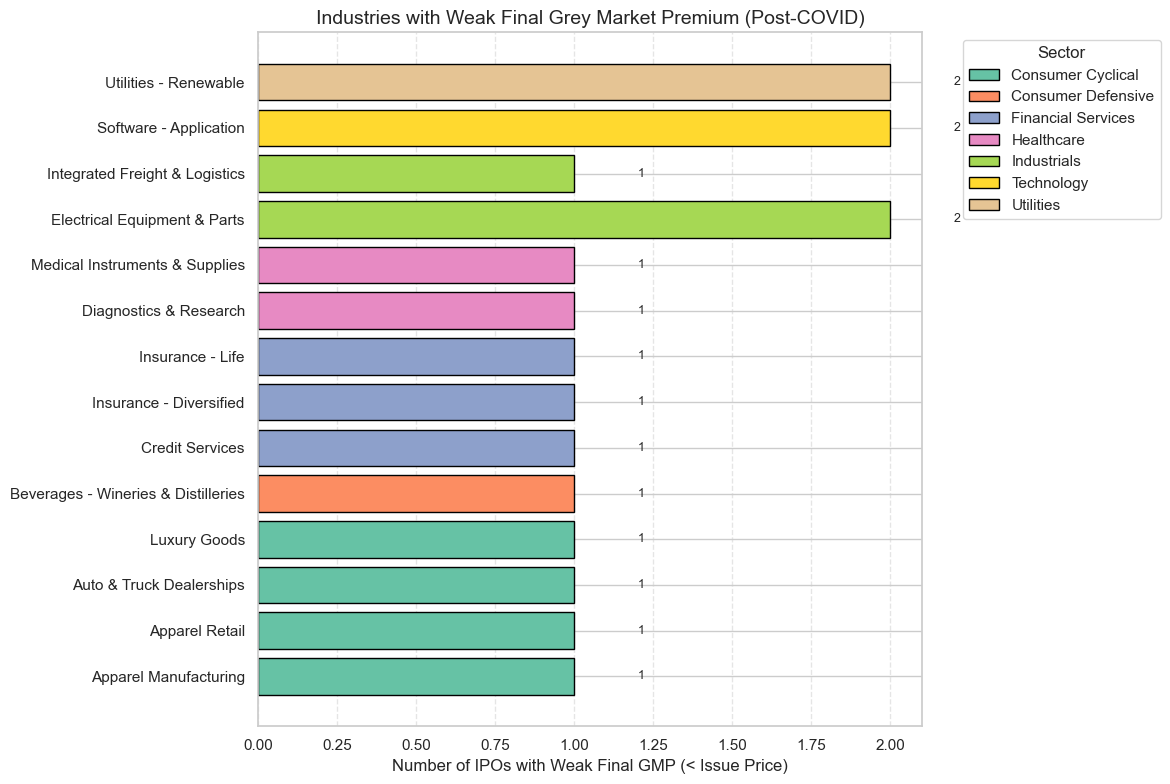


📊 Industries with Weak Final GMP (< Issue Price):

Sector               Industry                              Avg Discount (₹)  Number of IPOs
------------------------------------------------------------------------------------------
Consumer Cyclical    Apparel Manufacturing                           -10.88               1
Consumer Cyclical    Apparel Retail                                  -14.00               1
Consumer Cyclical    Auto & Truck Dealerships                         -9.25               1
Consumer Cyclical    Luxury Goods                                     -5.62               1
Consumer Defensive   Beverages - Wineries & Distilleries              -8.12               1
Financial Services   Credit Services                                  -3.25               1
Financial Services   Insurance - Diversified                         -38.62               1
Financial Services   Insurance - Life                                -12.62               1
Healthcare           Diagnost

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

df_post = df_cleaned.copy()

df_post['final_gmp'] = df_post['final_avg_gmp_perShare']

# Filter for weak GMP (< Issue Price)
df_weak = df_post[df_post['final_gmp'] < df_post['issuePrice_perShareinRs']].copy()

df_weak['gmp_discount'] = df_weak['final_gmp'] - df_weak['issuePrice_perShareinRs']

# Group by sector & industry
industry_sector_weak = df_weak.groupby(['sector', 'industry']).agg(
    avg_discount=('gmp_discount', 'mean'),
    num_ipos=('gmp_discount', 'count')
).reset_index()

# Sort for plotting
industry_sector_weak = industry_sector_weak.sort_values(['sector', 'num_ipos'], ascending=[True, False])

# Assign colors by sector
unique_sectors = industry_sector_weak['sector'].unique()
palette = sns.color_palette("Set2", len(unique_sectors))
sector_color_map = dict(zip(unique_sectors, palette))

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    industry_sector_weak['industry'],
    industry_sector_weak['num_ipos'],
    color=[sector_color_map[sector] for sector in industry_sector_weak['sector']],
    edgecolor='black'
)

for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             int(bar.get_width()), va='center', fontsize=9)

legend_elements = [Patch(facecolor=color, edgecolor='black', label=sector)
                   for sector, color in sector_color_map.items()]
plt.legend(handles=legend_elements, title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Number of IPOs with Weak Final GMP (< Issue Price)", fontsize=12)
plt.title("Industries with Weak Final Grey Market Premium (Post-COVID)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Nicely formatted print output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Industries with Weak Final GMP (< Issue Price):\n")
print(f"{'Sector':20} {'Industry':35} {'Avg Discount (₹)':>18} {'Number of IPOs':>15}")
print("-" * 90)
for _, row in industry_sector_weak.iterrows():
    print(f"{str(row['sector'])[:20]:20} {str(row['industry'])[:35]:35} "
          f"{row['avg_discount']:18.2f} {row['num_ipos']:15}")

print("\n\n📋 Full IPO-level Data Behind the Chart:\n")
print(f"{'Sector':20} {'Industry':35} {'Final Avg GMP (₹)':>18} {'Issue Price (₹)':>15} {'GMP Discount (₹)':>18}")
print("-" * 110)
for _, row in df_weak.iterrows():
    print(f"{str(row['sector'])[:20]:20} {str(row['industry'])[:35]:35} "
          f"{row['final_avg_gmp_perShare']:18.2f} {row['issuePrice_perShareinRs']:15.2f} {row['gmp_discount']:18.2f}")


### GMP vs listing day open

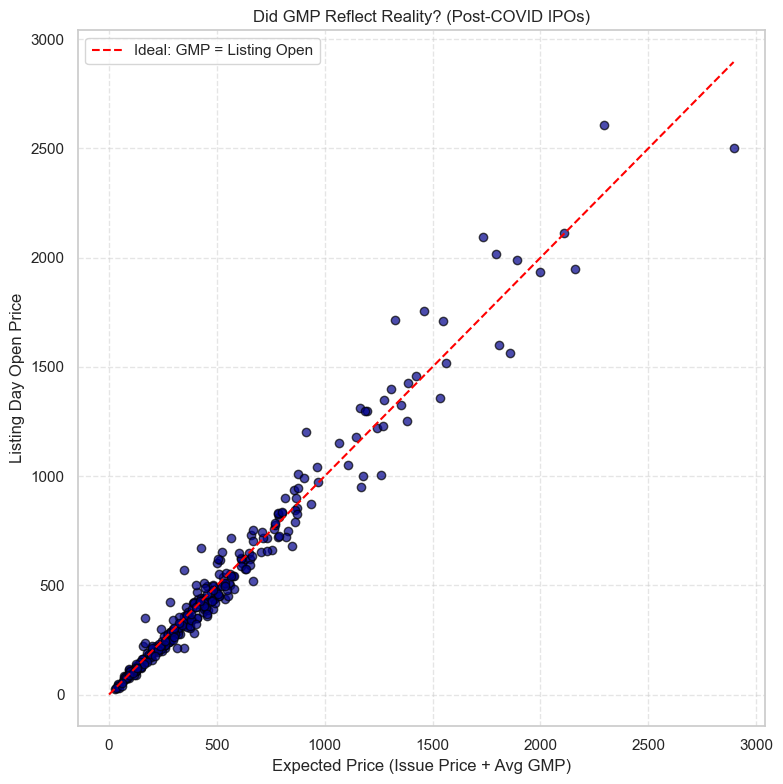


📊 Data used for the scatter plot:

IPO Name                            Sector          Industry             Issue Price (₹)     Avg GMP (₹)   Expected Price (₹) Listing Open Price (₹)
--------------------------------------------------------------------------------------------------------------------------------------------
Antony Waste                        Industrials     Waste Management              315.00          412.75               412.75                 436.00
Mrs. Bectors Food                   Consumer Defens Packaged Foods                288.00          483.25               483.25                 500.00
Burger King                         Consumer Cyclic Restaurants                    60.00           93.38                93.38                 113.00
Gland Pharma                        Healthcare      Drug Manufacturers -         1500.00         1550.38              1550.38                1710.00
Equitas Small Finance Bank          Financial Servi Banks - Regional          

In [180]:
import matplotlib.pyplot as plt

df_post = df_cleaned.copy()

df_post['expected_price'] = df_post['final_avg_gmp_perShare']

# Drop rows with missing required values
df_valid = df_post.dropna(subset=['expected_price', 'listingDay_openPrice', 'issuePrice_perShareinRs'])

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(
    df_valid['expected_price'],
    df_valid['listingDay_openPrice'],
    alpha=0.7,
    color='darkblue',
    edgecolors='black'
)

# Add ideal line (GMP = Listing Open Price)
max_val = max(df_valid['expected_price'].max(), df_valid['listingDay_openPrice'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal: GMP = Listing Open')

plt.xlabel("Expected Price (Issue Price + Avg GMP)")
plt.ylabel("Listing Day Open Price")
plt.title("Did GMP Reflect Reality? (Post-COVID IPOs)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Nicely formatted print output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 Data used for the scatter plot:\n")
print(f"{'IPO Name':35} {'Sector':15} {'Industry':20} {'Issue Price (₹)':>15} "
      f"{'Avg GMP (₹)':>15} {'Expected Price (₹)':>20} {'Listing Open Price (₹)':>22}")
print("-" * 140)
for _, row in df_valid.iterrows():
    print(f"{str(row['ipo_name'])[:35]:35} {str(row['sector'])[:15]:15} {str(row['industry'])[:20]:20} "
          f"{row['issuePrice_perShareinRs']:15.2f} {row['final_avg_gmp_perShare']:15.2f} "
          f"{row['expected_price']:20.2f} {row['listingDay_openPrice']:22.2f}")


### normal distribution of listing day open

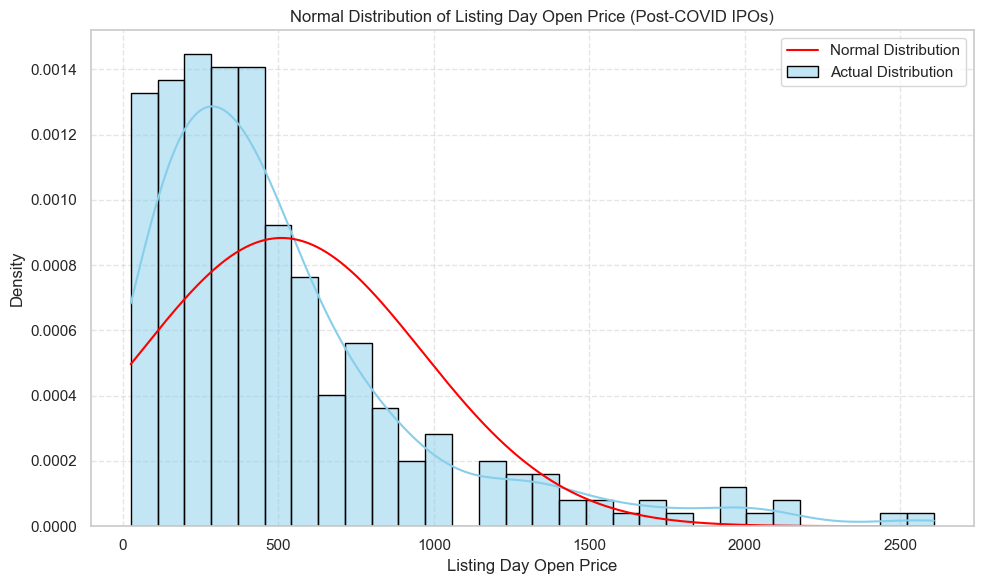


📊 IPO-level data used for the histogram:

IPO Name                            Sector          Industry             Issue Price (₹)     Avg GMP (₹) Listing Open Price (₹)
----------------------------------------------------------------------------------------------------------------------------------
Antony Waste                        Industrials     Waste Management              315.00          412.75                 436.00
Mrs. Bectors Food                   Consumer Defens Packaged Foods                288.00          483.25                 500.00
Burger King                         Consumer Cyclic Restaurants                    60.00           93.38                 113.00
Gland Pharma                        Healthcare      Drug Manufacturers -         1500.00         1550.38                1710.00
Equitas Small Finance Bank          Financial Servi Banks - Regional               33.00           37.62                  31.00
Likhitha Infrastructure             Energy          Oil & 

In [181]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_post = df_cleaned.copy()
df_valid = df_post.dropna(subset=['listingDay_openPrice'])

open_prices = df_valid['listingDay_openPrice']

# Histogram data
hist_counts, bin_edges = np.histogram(open_prices, bins=30, density=True)
hist_df = pd.DataFrame({
    "Bin Center": [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)],
    "Density": hist_counts
})

# Normal distribution curve data
mean = open_prices.mean()
std = open_prices.std()
x_vals = np.linspace(open_prices.min(), open_prices.max(), 1000)
curve_df = pd.DataFrame({
    "X Value": x_vals,
    "Density": norm.pdf(x_vals, mean, std)
})

# Plot histogram with KDE and normal distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(open_prices, bins=30, kde=True, stat="density",
             color='skyblue', edgecolor='black', label='Actual Distribution')
plt.plot(x_vals, norm.pdf(x_vals, mean, std), color='red', label='Normal Distribution')

plt.title("Normal Distribution of Listing Day Open Price (Post-COVID IPOs)")
plt.xlabel("Listing Day Open Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Nicely formatted print output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n📊 IPO-level data used for the histogram:\n")
print(f"{'IPO Name':35} {'Sector':15} {'Industry':20} {'Issue Price (₹)':>15} "
      f"{'Avg GMP (₹)':>15} {'Listing Open Price (₹)':>22}")
print("-" * 130)
for _, row in df_valid.iterrows():
    print(f"{str(row['ipo_name'])[:35]:35} {str(row['sector'])[:15]:15} {str(row['industry'])[:20]:20} "
          f"{row['issuePrice_perShareinRs']:15.2f} {row['final_avg_gmp_perShare']:15.2f} "
          f"{row['listingDay_openPrice']:22.2f}")

print("\n📈 Histogram Data Points (Bin Center vs Density):\n")
print(hist_df.to_string(index=False, formatters={
    "Bin Center": "{:.2f}".format,
    "Density": "{:.5f}".format
}))

print("\n📉 Normal Distribution Curve Data Points (X Value vs Density):\n")
print(curve_df.to_string(index=False, formatters={
    "X Value": "{:.2f}".format,
    "Density": "{:.5f}".format
}))


### GMP DAY wise trend


📊 Full IPO-level Dataset with GMP Values and % Changes (Day 8 → Day 1):

       IPO Name |       GMP Day 8 |       GMP Day 7 |       GMP Day 6 |       GMP Day 5 |       GMP Day 4 |       GMP Day 3 |       GMP Day 2 |       GMP Day 1 |  % Change Day 8 |  % Change Day 7 |  % Change Day 6 |  % Change Day 5 |  % Change Day 4 |  % Change Day 3 |  % Change Day 2 |  % Change Day 1 | Final % Change (Day 1)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Antony Waste   | 365.00 | 365.00 | 388.00 | 429.00 | 485.00 | 385.00 | 395.00 | 490.00 | 0.00 | 0.00 | 6.30 | 17.53 | 32.88 | 5.48 | 8.22 | 34.25 | 34.25
 HP Adhesives   | 274.00 | 332.00 | 344.00 | 344.00 | 364.00 | 364.00 | 364.00 | 354.00 | 0.00 | 21.17 | 25.55 | 25.5

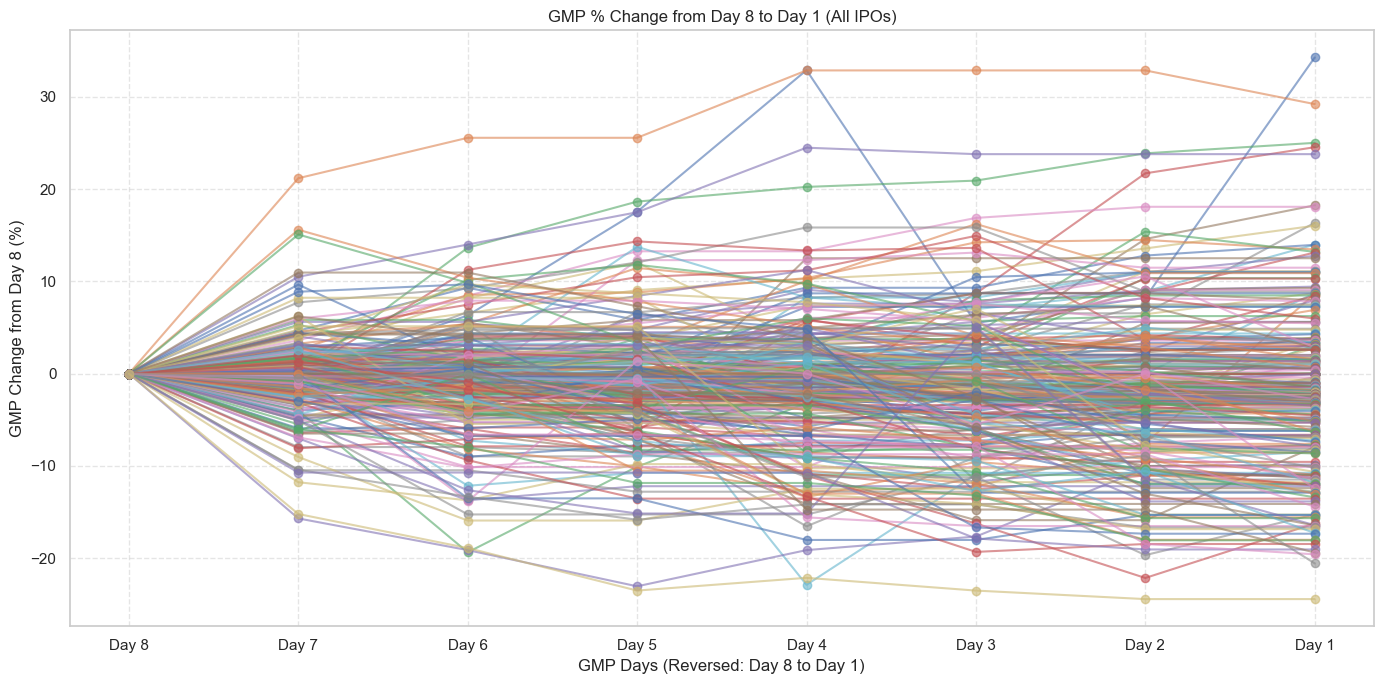

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy and process data
df_post = df_cleaned.copy()

# GMP columns (Day 8 down to Day 1)
gmp_days_final = [f'final_gmpDay{i}_perShare' for i in range(8, 0, -1)]

# Convert GMP columns to numeric
for col in gmp_days_final:
    df_post[col] = pd.to_numeric(df_post[col], errors='coerce')

# Drop rows with missing GMP data or zero Day 8 GMP
df_post = df_post.dropna(subset=gmp_days_final)
df_post = df_post[df_post[gmp_days_final[0]] != 0]

# Calculate % change from Day 8 for each day
for col in gmp_days_final:
    df_post[f'pct_{col}'] = ((df_post[col] - df_post[gmp_days_final[0]]) / df_post[gmp_days_final[0]]) * 100

gmp_pct_cols = [f'pct_{col}' for col in gmp_days_final]

# Final % change at Day 1
df_post["gmp_pct_change_final"] = df_post[gmp_pct_cols[-1]]

# Sort by final % change descending for clarity
df_post = df_post.sort_values("gmp_pct_change_final", ascending=False)

# --- Nicely formatted printout of full IPO-level dataset ---
cols_to_show = ["ipo_name"] + gmp_days_final + gmp_pct_cols + ["gmp_pct_change_final"]

print("\n📊 Full IPO-level Dataset with GMP Values and % Changes (Day 8 → Day 1):\n")
header = (["IPO Name"] + 
          [f"GMP Day {i}" for i in range(8, 0, -1)] + 
          [f"% Change Day {i}" for i in range(8, 0, -1)] + 
          ["Final % Change (Day 1)"])
print(" | ".join(f"{h:>15}" for h in header))
print("-" * (18 * len(header)))

for _, row in df_post.iterrows():
    gmp_vals = [f"{row[col]:.2f}" for col in gmp_days_final]
    pct_vals = [f"{row[col]:.2f}" for col in gmp_pct_cols]
    print(f"{row['ipo_name'][:15]:>15} | " +
          " | ".join(gmp_vals) + " | " +
          " | ".join(pct_vals) + " | " +
          f"{row['gmp_pct_change_final']:.2f}")

# --- Exact % Change datapoints for all IPOs ---
print("\n🎯 Exact % Change Datapoints for ALL IPOs (used in graphs):")
for _, row in df_post.iterrows():
    pct_changes_str = ", ".join(f"{row[col]:.2f}%" for col in gmp_pct_cols)
    print(f"{row['ipo_name'][:30]}: {pct_changes_str}")

# --- Optional Plot: GMP % change over days for all IPOs ---
plt.figure(figsize=(14, 7))
for _, row in df_post.iterrows():
    plt.plot(
        [f"Day {i}" for i in range(8, 0, -1)],
        row[gmp_pct_cols],
        marker='o',
        alpha=0.6
    )
plt.title("GMP % Change from Day 8 to Day 1 (All IPOs)")
plt.xlabel("GMP Days (Reversed: Day 8 to Day 1)")
plt.ylabel("GMP Change from Day 8 (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Section G

### top 5 gmp to listing gain positive

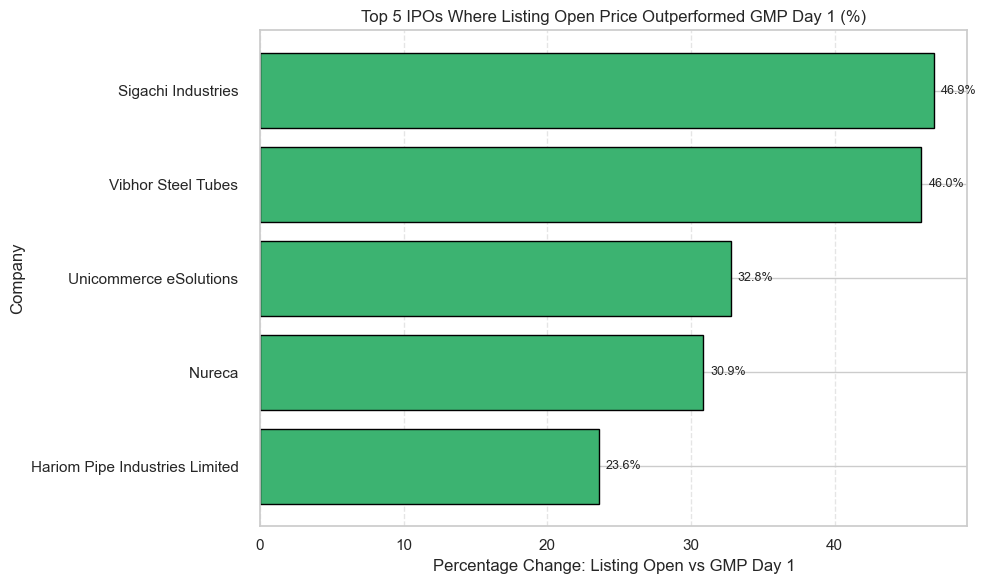


Full IPO-level dataset: Listing Open Price vs GMP Day 1

IPO Name                                  GMP Day 1    Listing Open   % Change
--------------------------------------------------------------------------------
Antony Waste                                 490.00          436.00     -11.02
Mrs. Bectors Food                            503.00          500.00      -0.60
Burger King                                  103.00          113.00       9.71
Gland Pharma                                1618.00         1710.00       5.69
Equitas Small Finance Bank                    34.00           31.00      -8.82
Likhitha Infrastructure                      126.00          130.00       3.17
UTI AMC                                      540.00          500.00      -7.41
Mazagon Dock                                 250.00          215.00     -14.00
Angel One                                    301.00          275.00      -8.64
CAMS                                        1558.00         1518.00    

In [183]:
df_post = df_cleaned.copy()

gmp_cols_raw = [f'gmpDay{i}_perShare' for i in range(1, 9)]

df_post = df_post[df_post[gmp_cols_raw].sum(axis=1) != 0].copy()

df_valid = df_post.dropna(subset=['final_gmpDay1_perShare', 'listingDay_openPrice']).copy()

df_valid['percent_change_open_vs_gmp1'] = ((df_valid['listingDay_openPrice'] - df_valid['final_gmpDay1_perShare']) / df_valid['final_gmpDay1_perShare']) * 100

df_positive = df_valid[df_valid['percent_change_open_vs_gmp1'] > 0]

top5_positive = df_positive.sort_values('percent_change_open_vs_gmp1', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top5_positive['ipo_name'], top5_positive['percent_change_open_vs_gmp1'], color='mediumseagreen', edgecolor='black')

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va='center', fontsize=9)

plt.xlabel("Percentage Change: Listing Open vs GMP Day 1")
plt.ylabel("Company")
plt.title("Top 5 IPOs Where Listing Open Price Outperformed GMP Day 1 (%)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ✅ Appended at the end — Full IPO-level dataset
print("\nFull IPO-level dataset: Listing Open Price vs GMP Day 1\n")
print(f"{'IPO Name':40} {'GMP Day 1':>10} {'Listing Open':>15} {'% Change':>10}")
print("-" * 80)
for _, row in df_valid.iterrows():
    print(f"{row['ipo_name'][:40]:40} {row['final_gmpDay1_perShare']:>10.2f} {row['listingDay_openPrice']:>15.2f} {row['percent_change_open_vs_gmp1']:>10.2f}")

# ✅ Appended at the end — Exact datapoints for top 5 plotted IPOs
print("\nExact datapoints for the Top 5 plotted IPOs:\n")
for _, row in top5_positive.iterrows():
    print(f"{row['ipo_name']}: {row['percent_change_open_vs_gmp1']:.2f}%")


### top 5 gmp to listing gain negative

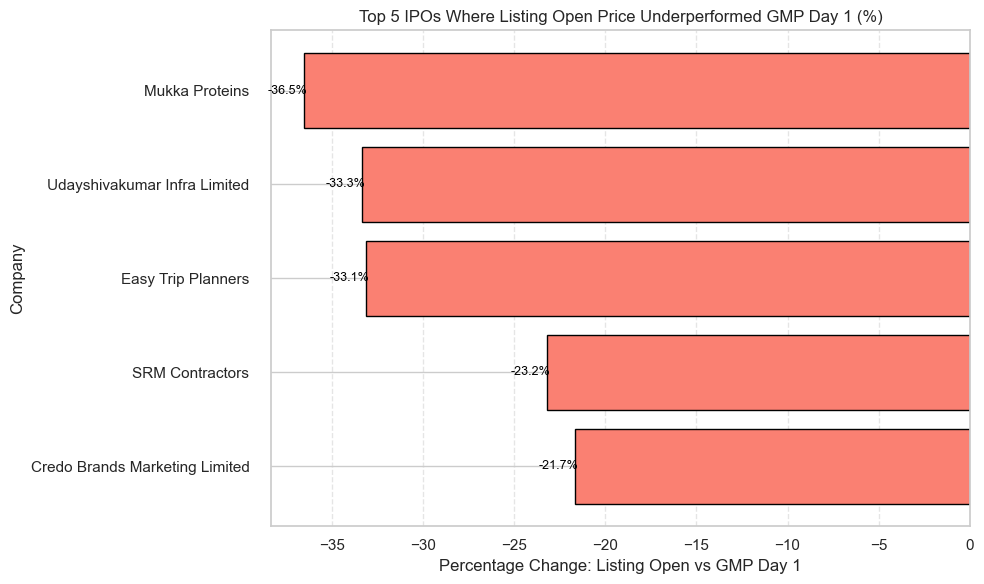


Full IPO-level dataset: Listing Open Price vs GMP Day 1

IPO Name                                  GMP Day 1    Listing Open   % Change
--------------------------------------------------------------------------------
Antony Waste                                 490.00          436.00     -11.02
Mrs. Bectors Food                            503.00          500.00      -0.60
Burger King                                  103.00          113.00       9.71
Gland Pharma                                1618.00         1710.00       5.69
Equitas Small Finance Bank                    34.00           31.00      -8.82
Likhitha Infrastructure                      126.00          130.00       3.17
UTI AMC                                      540.00          500.00      -7.41
Mazagon Dock                                 250.00          215.00     -14.00
Angel One                                    301.00          275.00      -8.64
CAMS                                        1558.00         1518.00    

In [184]:
df_post = df_cleaned.copy()

gmp_cols_raw = [f'gmpDay{i}_perShare' for i in range(1, 9)]

df_post = df_post[df_post[gmp_cols_raw].sum(axis=1) != 0].copy()

df_valid = df_post.dropna(subset=['final_gmpDay1_perShare', 'listingDay_openPrice']).copy()

df_valid['percent_change_open_vs_gmp1'] = ((df_valid['listingDay_openPrice'] - df_valid['final_gmpDay1_perShare']) / df_valid['final_gmpDay1_perShare']) * 100

df_negative = df_valid[df_valid['percent_change_open_vs_gmp1'] < 0]

top5_negative = df_negative.sort_values('percent_change_open_vs_gmp1').head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top5_negative['ipo_name'], top5_negative['percent_change_open_vs_gmp1'], color='salmon', edgecolor='black')

for bar in bars:
    plt.text(bar.get_width() - 2, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va='center', fontsize=9, color='black')

plt.xlabel("Percentage Change: Listing Open vs GMP Day 1")
plt.ylabel("Company")
plt.title("Top 5 IPOs Where Listing Open Price Underperformed GMP Day 1 (%)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ✅ Full IPO-level dataset
print("\nFull IPO-level dataset: Listing Open Price vs GMP Day 1\n")
print(f"{'IPO Name':40} {'GMP Day 1':>10} {'Listing Open':>15} {'% Change':>10}")
print("-" * 80)
for _, row in df_valid.iterrows():
    print(f"{row['ipo_name'][:40]:40} {row['final_gmpDay1_perShare']:>10.2f} {row['listingDay_openPrice']:>15.2f} {row['percent_change_open_vs_gmp1']:>10.2f}")

# ✅ Exact datapoints for Top 5 plotted IPOs
print("\nExact datapoints for the Top 5 plotted IPOs:\n")
for _, row in top5_negative.iterrows():
    print(f"{row['ipo_name']}: {row['percent_change_open_vs_gmp1']:.2f}%")


### Sector : GMP vs listing gain positive

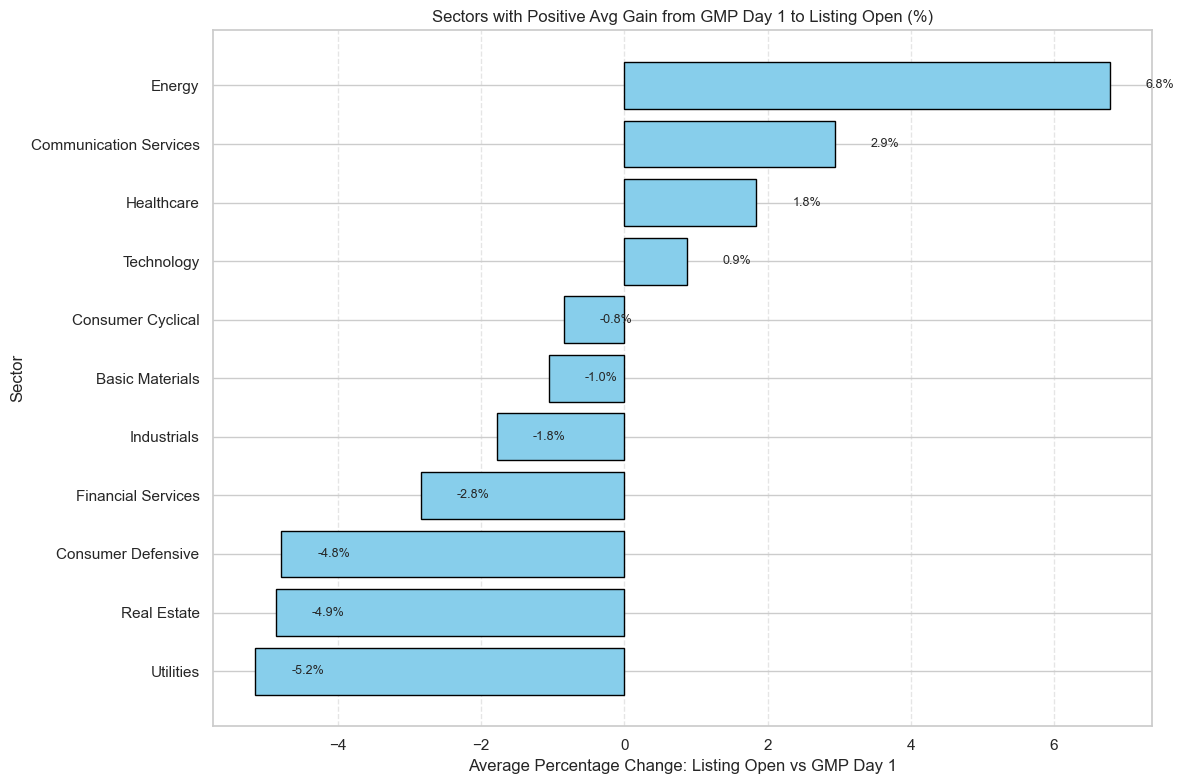


Full Sector Average Dataset: Listing Open vs GMP Day 1

Sector                            Avg % Change
--------------------------------------------------
Energy                                    6.78
Communication Services                    2.94
Healthcare                                1.85
Technology                                0.87
Consumer Cyclical                        -0.84
Basic Materials                          -1.05
Industrials                              -1.78
Financial Services                       -2.84
Consumer Defensive                       -4.79
Real Estate                              -4.87
Utilities                                -5.15

Exact datapoints for plotted sectors:

Energy: 6.78%
Communication Services: 2.94%
Healthcare: 1.85%
Technology: 0.87%
Consumer Cyclical: -0.84%
Basic Materials: -1.05%
Industrials: -1.78%
Financial Services: -2.84%
Consumer Defensive: -4.79%
Real Estate: -4.87%
Utilities: -5.15%


In [185]:
df_post = df_cleaned.copy()

gmp_cols_raw = [f'gmpDay{i}_perShare' for i in range(1, 9)]

df_post = df_post[df_post[gmp_cols_raw].sum(axis=1) != 0].copy()

df_valid = df_post.dropna(subset=['final_gmpDay1_perShare', 'listingDay_openPrice']).copy()

df_valid['percent_change_open_vs_gmp1'] = (
    (df_valid['listingDay_openPrice'] - df_valid['final_gmpDay1_perShare']) / df_valid['final_gmpDay1_perShare']
) * 100

sector_avg_gain = (
    df_valid.groupby('sector')['percent_change_open_vs_gmp1']
    .mean()
    .reset_index()
    .sort_values('percent_change_open_vs_gmp1', ascending=False)
)

sector_positive = sector_avg_gain.copy()

plt.figure(figsize=(12, 8))
bars = plt.barh(sector_positive['sector'], sector_positive['percent_change_open_vs_gmp1'], color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va='center', fontsize=9)

plt.xlabel("Average Percentage Change: Listing Open vs GMP Day 1")
plt.ylabel("Sector")
plt.title("Sectors with Positive Avg Gain from GMP Day 1 to Listing Open (%)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ✅ Full sector average dataset
print("\nFull Sector Average Dataset: Listing Open vs GMP Day 1\n")
print(f"{'Sector':30} {'Avg % Change':>15}")
print("-" * 50)
for _, row in sector_avg_gain.iterrows():
    print(f"{row['sector'][:30]:30} {row['percent_change_open_vs_gmp1']:>15.2f}")

# ✅ Exact datapoints for plotted sectors
print("\nExact datapoints for plotted sectors:\n")
for _, row in sector_positive.iterrows():
    print(f"{row['sector']}: {row['percent_change_open_vs_gmp1']:.2f}%")


### Sector : GMP vs listing gain negative

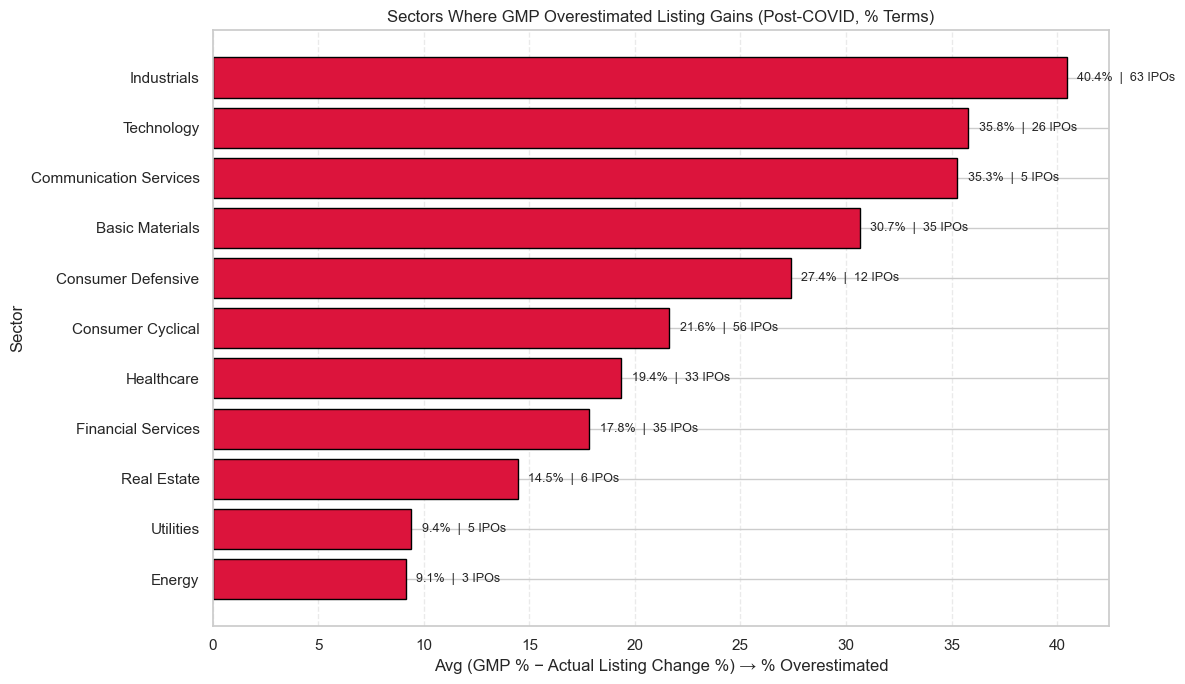


Full Sector Overestimation Dataset:

Sector                             Mean Overestimation %   Num IPOs
----------------------------------------------------------------------
Basic Materials                                    30.65         35
Communication Services                             35.26          5
Consumer Cyclical                                  21.62         56
Consumer Defensive                                 27.38         12
Energy                                              9.15          3
Financial Services                                 17.85         35
Healthcare                                         19.36         33
Industrials                                        40.45         63
Real Estate                                        14.45          6
Technology                                         35.78         26
Utilities                                           9.41          5

Exact datapoints for plotted sectors (positive mean overestimation):

Indu

In [186]:
df_post = df_cleaned.copy()

df_valid = df_post.dropna(subset=[
    'final_gmpDay1_perShare',    
    'listingDay_openPrice',       
    'issuePrice_perShareinRs',  
    'sector'
]).copy()

gmp_cols = [f'gmpDay{i}_perShare' for i in range(1, 9)]
df_valid = df_valid[df_valid[gmp_cols].sum(axis=1) != 0].copy()

df_valid['gmp_rs'] = df_valid['final_gmpDay1_perShare'] - df_valid['issuePrice_perShareinRs']
df_valid['gmp_percent'] = (df_valid['gmp_rs'] / df_valid['issuePrice_perShareinRs']) * 100

df_valid['actual_percent_change'] = (
    (df_valid['listingDay_openPrice'] - df_valid['final_gmpDay1_perShare']) /
    df_valid['final_gmpDay1_perShare']
) * 100

df_valid['overestimation_percent'] = df_valid['gmp_percent'] - df_valid['actual_percent_change']

sector_gap = (
    df_valid.groupby('sector')
            .agg(mean_over_gap=('overestimation_percent', 'mean'),
                 num_ipos=('overestimation_percent', 'count'))
            .reset_index()
)

sector_gap_pos = sector_gap[sector_gap['mean_over_gap'] > 0].sort_values('mean_over_gap', ascending=False)

plt.figure(figsize=(12, 7))
bars = plt.barh(sector_gap_pos['sector'], sector_gap_pos['mean_over_gap'],
                color='crimson', edgecolor='black')

plt.xlabel("Avg (GMP % − Actual Listing Change %) → % Overestimated")
plt.ylabel("Sector")
plt.title("Sectors Where GMP Overestimated Listing Gains (Post-COVID, % Terms)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar, n in zip(bars, sector_gap_pos['num_ipos']):
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%  |  {n} IPOs",
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ✅ Full sector gap dataset
print("\nFull Sector Overestimation Dataset:\n")
print(f"{'Sector':30} {'Mean Overestimation %':>25} {'Num IPOs':>10}")
print("-" * 70)
for _, row in sector_gap.iterrows():
    print(f"{row['sector'][:30]:30} {row['mean_over_gap']:>25.2f} {row['num_ipos']:>10}")

# ✅ Exact datapoints used in plot
print("\nExact datapoints for plotted sectors (positive mean overestimation):\n")
for _, row in sector_gap_pos.iterrows():
    print(f"{row['sector']}: {row['mean_over_gap']:.2f}%  |  {row['num_ipos']} IPOs")


### Industry : GMP vs listing gain positive

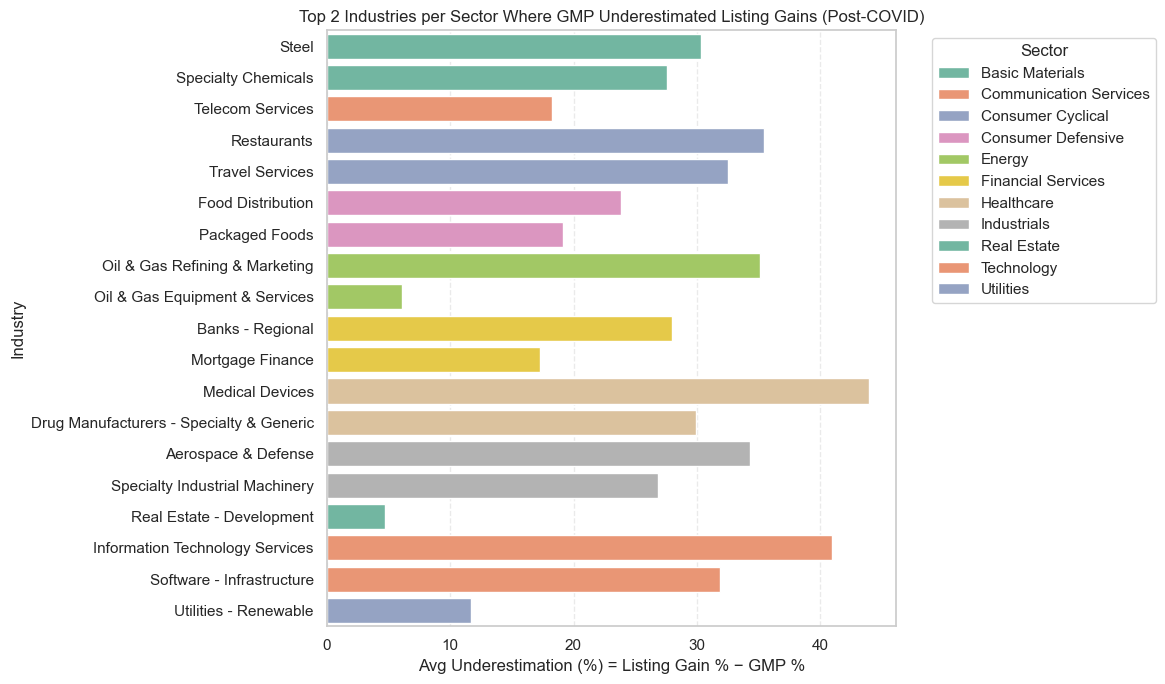


Full Sector–Industry Underestimation Dataset:

Sector                    Industry                        Avg GMP %   Avg Listing %      Avg Underest. %    #IPOs
-------------------------------------------------------------------------------------------------------------------
Basic Materials           Agricultural Inputs                 14.51           20.43                 5.92        3
Basic Materials           Building Materials                  12.86           22.18                 9.32        1
Basic Materials           Chemicals                            5.74           16.32                10.59        2
Basic Materials           Specialty Chemicals                 44.77           72.33                27.56        6
Basic Materials           Steel                               31.92           62.22                30.29        5
Communication Services    Telecom Services                    17.60           35.89                18.29        2
Consumer Cyclical         Apparel Manu

In [187]:
df_post = df_cleaned.copy()

df_post['final_gmp_perShare'] = pd.to_numeric(df_post['gmpDay1_perShare'], errors='coerce')
df_post['issuePrice'] = pd.to_numeric(df_post['issuePrice_perShareinRs'], errors='coerce')
df_post['listing_gain_perc'] = pd.to_numeric(df_post['listingDayGainsorloss_fromIssuePrice'], errors='coerce')

df_post = df_post.dropna(subset=['final_gmp_perShare', 'issuePrice', 'listing_gain_perc', 'industry', 'sector'])

df_post['gmp_perc'] = (df_post['final_gmp_perShare'] / df_post['issuePrice']) * 100
df_post['under_gap_perc'] = df_post['listing_gain_perc'] - df_post['gmp_perc']

df_under = df_post[df_post['under_gap_perc'] > 0].copy()

grouped = df_under.groupby(['sector', 'industry']).agg(
    avg_gmp_perc=('gmp_perc', 'mean'),
    avg_listing_gain_perc=('listing_gain_perc', 'mean'),
    avg_under_gap_perc=('under_gap_perc', 'mean'),
    count_ipos=('industry', 'count')
).reset_index()

top2_per_sector = (
    grouped.sort_values(['sector', 'avg_under_gap_perc'], ascending=[True, False])
           .groupby('sector')
           .head(2)
)

# ---- Plot ----
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top2_per_sector,
    x='avg_under_gap_perc',
    y='industry',
    hue='sector',
    palette='Set2',
    dodge=False
)

plt.xlabel("Avg Underestimation (%) = Listing Gain % − GMP %")
plt.ylabel("Industry")
plt.title("Top 2 Industries per Sector Where GMP Underestimated Listing Gains (Post-COVID)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---- Print full dataset ----
print("\nFull Sector–Industry Underestimation Dataset:\n")
print(f"{'Sector':25} {'Industry':30} {'Avg GMP %':>10} {'Avg Listing %':>15} {'Avg Underest. %':>20} {'#IPOs':>8}")
print("-" * 115)
for _, row in grouped.iterrows():
    print(f"{row['sector'][:25]:25} {row['industry'][:30]:30} {row['avg_gmp_perc']:>10.2f} "
          f"{row['avg_listing_gain_perc']:>15.2f} {row['avg_under_gap_perc']:>20.2f} {row['count_ipos']:>8}")

# ---- Print subset used in plot (Top 2 per sector) in SAME table format ----
print("\nTop 2 per Sector Used in Plot:\n")
print(f"{'Sector':25} {'Industry':30} {'Avg GMP %':>10} {'Avg Listing %':>15} {'Avg Underest. %':>20} {'#IPOs':>8}")
print("-" * 115)
for _, row in top2_per_sector.iterrows():
    print(f"{row['sector'][:25]:25} {row['industry'][:30]:30} {row['avg_gmp_perc']:>10.2f} "
          f"{row['avg_listing_gain_perc']:>15.2f} {row['avg_under_gap_perc']:>20.2f} {row['count_ipos']:>8}")


### Industry : GMP vs listing gain negative

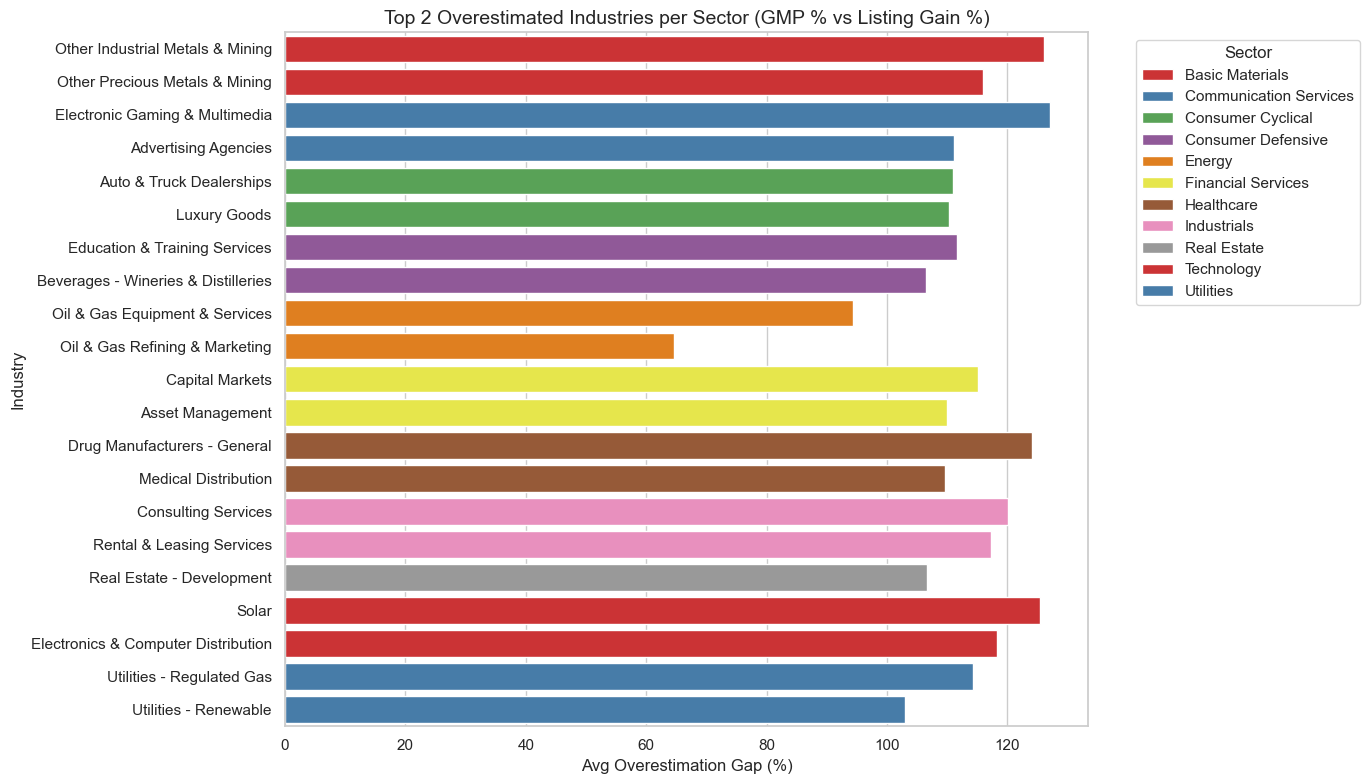


Full Sector–Industry Overestimation Dataset:

Sector                    Industry                         Avg Overest. Gap %
--------------------------------------------------------------------------------
Basic Materials           Agricultural Inputs                          110.45
Basic Materials           Building Materials                            97.92
Basic Materials           Chemicals                                    102.21
Basic Materials           Other Industrial Metals & Mini               126.11
Basic Materials           Other Precious Metals & Mining               115.91
Basic Materials           Specialty Chemicals                           95.38
Basic Materials           Steel                                        100.31
Communication Services    Advertising Agencies                         111.08
Communication Services    Electronic Gaming & Multimedia               127.04
Communication Services    Telecom Services                              83.35
Consumer Cycli

In [188]:
df_post = df_cleaned.copy()

cols_needed = ['final_avg_gmp_perShare', 'finalIssuePrice_perShare', 'listingDayGainsorloss_fromIssuePrice']
df_post[cols_needed] = df_post[cols_needed].apply(pd.to_numeric, errors='coerce')

df_post.dropna(subset=cols_needed + ['sector', 'industry'], inplace=True)

df_post['gmp_percent'] = (df_post['final_avg_gmp_perShare'] / df_post['finalIssuePrice_perShare']) * 100
df_post['overestimation_gap_percent'] = df_post['gmp_percent'] - df_post['listingDayGainsorloss_fromIssuePrice']

overestimated_df = df_post[df_post['overestimation_gap_percent'] > 0]

grouped = overestimated_df.groupby(['sector', 'industry'])['overestimation_gap_percent'].mean().reset_index()

top2_per_sector = grouped.groupby('sector').apply(
    lambda x: x.nlargest(2, 'overestimation_gap_percent')
).reset_index(drop=True)

# ---- Plot ----
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(
    data=top2_per_sector,
    x='overestimation_gap_percent',
    y='industry',
    hue='sector',
    dodge=False,
    palette='Set1'
)

plt.title("Top 2 Overestimated Industries per Sector (GMP % vs Listing Gain %)", fontsize=14)
plt.xlabel("Avg Overestimation Gap (%)")
plt.ylabel("Industry")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---- Printing Section ----
print("\nFull Sector–Industry Overestimation Dataset:\n")
print(f"{'Sector':25} {'Industry':30} {'Avg Overest. Gap %':>20}")
print("-" * 80)
for _, row in grouped.iterrows():
    print(f"{row['sector'][:25]:25} {row['industry'][:30]:30} {row['overestimation_gap_percent']:>20.2f}")

print("\nTop 2 per Sector Used in Plot:\n")
print(f"{'Sector':25} {'Industry':30} {'Avg Overest. Gap %':>20}")
print("-" * 80)
for _, row in top2_per_sector.iterrows():
    print(f"{row['sector'][:25]:25} {row['industry'][:30]:30} {row['overestimation_gap_percent']:>20.2f}")


## Section H

### top 5 comapnies by total subscription

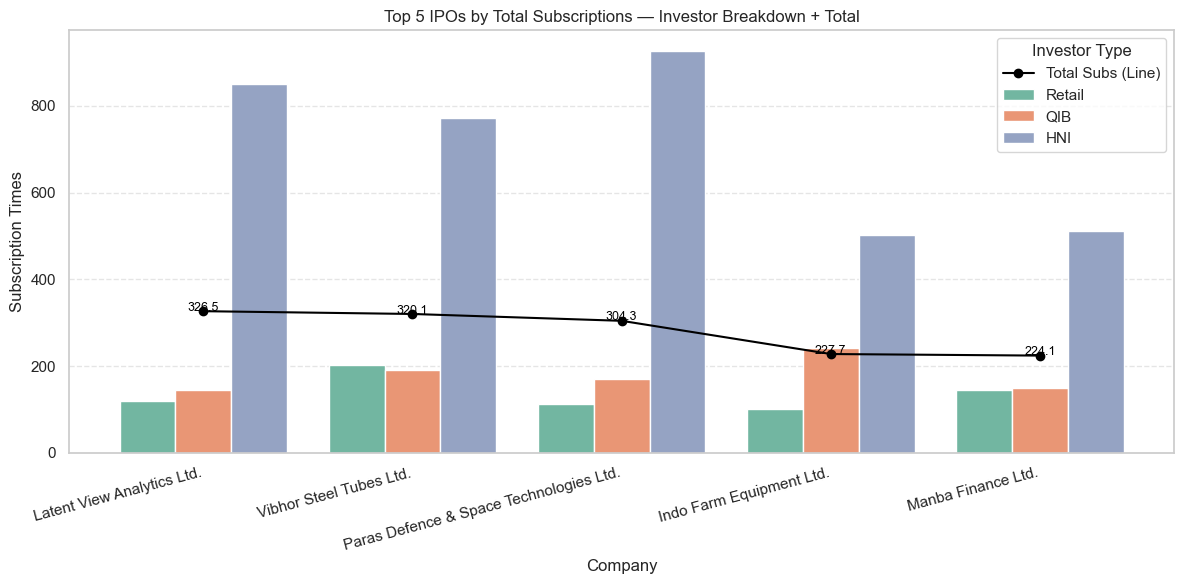


Full IPO Dataset Sorted by Total Subscription Times:

Company                                      Retail        QIB        HNI      Total
--------------------------------------------------------------------------------
Latent View Analytics Ltd.                    119.4      145.5      850.7      326.5
Vibhor Steel Tubes Ltd.                       201.5      191.4      772.5      320.1
Paras Defence & Space Technologies Ltd.       112.8      169.7      927.7      304.3
Indo Farm Equipment Ltd.                      101.8      242.4      501.8      227.7
Manba Finance Ltd.                            143.9      148.6      511.6      224.1
Denta Water & Infra Solutions Ltd.             90.4      236.9      507.1      221.5
Tega Industries Ltd.                           29.4      215.4      666.2      219.0
KRN Heat Exchanger & Refrigeration Ltd.        96.7      253.0      430.5      213.4
Gala Precision Engineering Ltd.                92.0      232.5      414.6      201.4
MTAR Technolog

Zomato Ltd.                                     7.5       51.8       33.0       38.2
Yatharth Hospital & Trauma Care Services        8.7       86.4       38.6       37.3
Sanathan Textiles Ltd.                          9.3       79.6       44.4       36.9
Dharmaj Crop Guard Ltd.                        21.5       48.2       52.3       35.5
International Gemmological Institute (In       11.8       48.1       26.1       35.5
Oswal Pumps Ltd.                                3.6       88.1       36.7       34.4
Kaynes Technology India Ltd.                    4.1       98.5       21.2       34.2
Syrma SGS Technology Ltd.                       5.5       87.6       17.5       32.6
Udayshivakumar Infra Ltd.                      14.9       42.9       64.1       32.5
Archean Chemical Industries Ltd.               10.0       48.9       14.9       32.2
Western Carriers (India) Ltd.                  26.9       28.8       46.7       31.7
Rishabh Instruments Ltd.                        8.4       72.5   

In [189]:
df_cleaned[['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes']] = df_cleaned[[
    'retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes'
]].apply(pd.to_numeric, errors='coerce')

top5 = df_cleaned.sort_values(by='total_subsTimes', ascending=False).head(5).copy()

melted_df = top5.melt(
    id_vars=['stockName_chittorgarh', 'total_subsTimes'],
    value_vars=['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes'],
    var_name='Investor Type',
    value_name='Subscription Times'
)

melted_df['Investor Type'] = melted_df['Investor Type'].replace({
    'retail_subsTimes': 'Retail',
    'qib_subsTimes': 'QIB',
    'nii_subsTimes': 'HNI'
})

plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_df,
    x='stockName_chittorgarh',
    y='Subscription Times',
    hue='Investor Type',
    palette='Set2'
)

company_order = top5['stockName_chittorgarh'].tolist()
x_ticks = range(len(company_order))
plt.plot(
    x_ticks,
    top5['total_subsTimes'],
    color='black',
    marker='o',
    label='Total Subs (Line)'
)

for i, val in enumerate(top5['total_subsTimes']):
    plt.text(i, val + 1, f'{val:.1f}', color='black', ha='center', fontsize=9)

plt.title("Top 5 IPOs by Total Subscriptions — Investor Breakdown + Total")
plt.xlabel("Company")
plt.ylabel("Subscription Times")
plt.xticks(ticks=x_ticks, labels=company_order, rotation=15, ha='right')
plt.legend(title="Investor Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Printing Section ----
full_sorted = df_cleaned.sort_values(by='total_subsTimes', ascending=False)

print("\nFull IPO Dataset Sorted by Total Subscription Times:\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in full_sorted.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")

print("\nTop 5 IPOs by Total Subscription Times (Used in Plot):\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in top5.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")


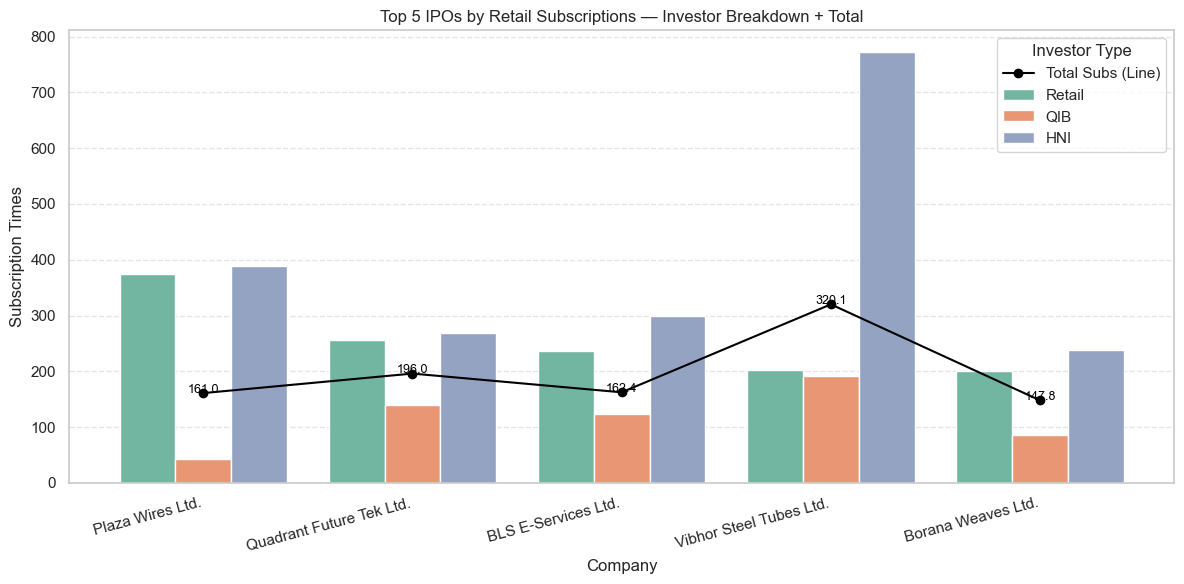


Full IPO Dataset Sorted by Retail Subscription Times:

Company                                      Retail        QIB        HNI      Total
--------------------------------------------------------------------------------
Plaza Wires Ltd.                              374.8       42.8      388.1      161.0
Quadrant Future Tek Ltd.                      256.5      139.8      268.0      196.0
BLS E-Services Ltd.                           236.5      123.3      300.1      162.4
Vibhor Steel Tubes Ltd.                       201.5      191.4      772.5      320.1
Borana Weaves Ltd.                            200.5       85.5      237.4      147.8
Nureca Ltd.                                   166.7        3.1       31.6       39.9
Manba Finance Ltd.                            143.9      148.6      511.6      224.1
One Mobikwik Systems Ltd.                     141.8      125.8      114.7      125.7
Mamata Machinery Ltd.                         138.1      235.9      274.4      194.9
Motisons Jewe

In [190]:
df_cleaned[['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes']] = df_cleaned[[
    'retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes'
]].apply(pd.to_numeric, errors='coerce')

top5 = df_cleaned.sort_values(by='retail_subsTimes', ascending=False).head(5).copy()

melted_df = top5.melt(
    id_vars=['stockName_chittorgarh', 'total_subsTimes'],
    value_vars=['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes'],
    var_name='Investor Type',
    value_name='Subscription Times'
)

melted_df['Investor Type'] = melted_df['Investor Type'].replace({
    'retail_subsTimes': 'Retail',
    'qib_subsTimes': 'QIB',
    'nii_subsTimes': 'HNI'
})

plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_df,
    x='stockName_chittorgarh',
    y='Subscription Times',
    hue='Investor Type',
    palette='Set2'
)

company_order = top5['stockName_chittorgarh'].tolist()
x_ticks = range(len(company_order))
plt.plot(
    x_ticks,
    top5['total_subsTimes'],
    color='black',
    marker='o',
    label='Total Subs (Line)'
)

for i, val in enumerate(top5['total_subsTimes']):
    plt.text(i, val + 1, f'{val:.1f}', color='black', ha='center', fontsize=9)

plt.title("Top 5 IPOs by Retail Subscriptions — Investor Breakdown + Total")
plt.xlabel("Company")
plt.ylabel("Subscription Times")
plt.xticks(ticks=x_ticks, labels=company_order, rotation=15, ha='right')
plt.legend(title="Investor Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Printing Section ----
full_sorted = df_cleaned.sort_values(by='retail_subsTimes', ascending=False)

print("\nFull IPO Dataset Sorted by Retail Subscription Times:\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in full_sorted.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")

print("\nTop 5 IPOs by Retail Subscription Times (Used in Plot):\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in top5.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")


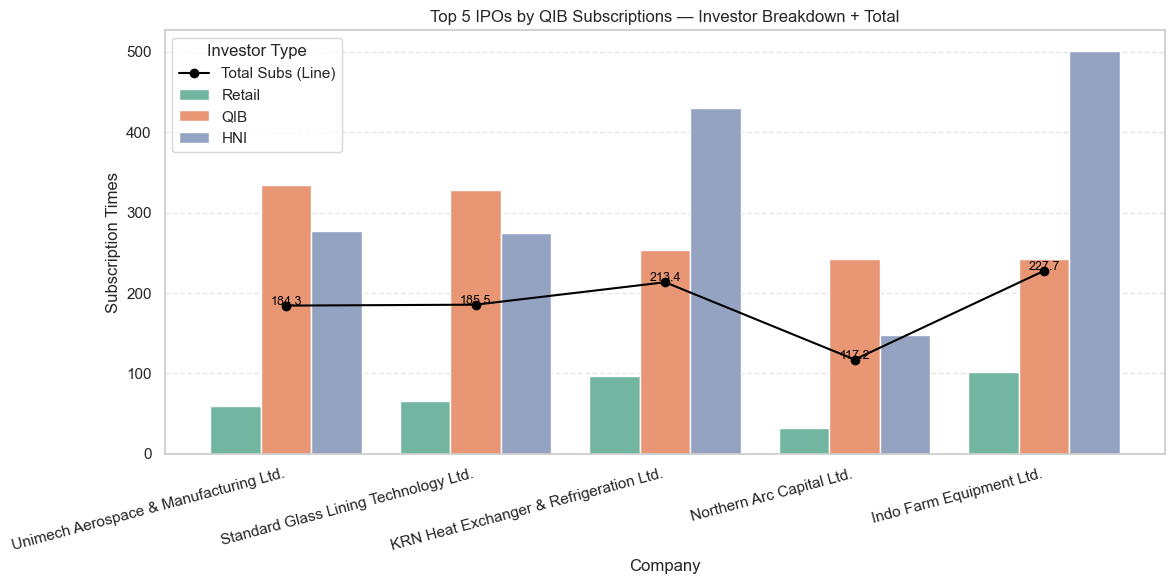


Full IPO Dataset Sorted by QIB Subscription Times:

Company                                      Retail        QIB        HNI      Total
--------------------------------------------------------------------------------
Unimech Aerospace & Manufacturing Ltd.         59.2      334.7      277.6      184.3
Standard Glass Lining Technology Ltd.          65.7      327.8      275.2      185.5
KRN Heat Exchanger & Refrigeration Ltd.        96.7      253.0      430.5      213.4
Northern Arc Capital Ltd.                      32.0      242.7      147.6      117.2
Indo Farm Equipment Ltd.                      101.8      242.4      501.8      227.7
Denta Water & Infra Solutions Ltd.             90.4      236.9      507.1      221.5
Mamata Machinery Ltd.                         138.1      235.9      274.4      194.9
Gala Precision Engineering Ltd.                92.0      232.5      414.6      201.4
Bajaj Housing Finance Ltd.                      7.4      222.1       44.0       67.4
Netweb Technolog

In [191]:
df_cleaned[['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes']] = df_cleaned[[
    'retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes'
]].apply(pd.to_numeric, errors='coerce')

top5 = df_cleaned.sort_values(by='qib_subsTimes', ascending=False).head(5).copy()

melted_df = top5.melt(
    id_vars=['stockName_chittorgarh', 'total_subsTimes'],
    value_vars=['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes'],
    var_name='Investor Type',
    value_name='Subscription Times'
)

melted_df['Investor Type'] = melted_df['Investor Type'].replace({
    'retail_subsTimes': 'Retail',
    'qib_subsTimes': 'QIB',
    'nii_subsTimes': 'HNI'
})

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x='stockName_chittorgarh',
    y='Subscription Times',
    hue='Investor Type',
    palette='Set2'
)

company_order = top5['stockName_chittorgarh'].tolist()
x_ticks = range(len(company_order))
plt.plot(
    x_ticks,
    top5['total_subsTimes'],
    color='black',
    marker='o',
    label='Total Subs (Line)'
)

for i, val in enumerate(top5['total_subsTimes']):
    plt.text(i, val + 1, f'{val:.1f}', color='black', ha='center', fontsize=9)

plt.title("Top 5 IPOs by QIB Subscriptions — Investor Breakdown + Total")
plt.xlabel("Company")
plt.ylabel("Subscription Times")
plt.xticks(ticks=x_ticks, labels=company_order, rotation=15, ha='right')
plt.legend(title="Investor Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Printing Section ----
full_sorted = df_cleaned.sort_values(by='qib_subsTimes', ascending=False)

print("\nFull IPO Dataset Sorted by QIB Subscription Times:\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in full_sorted.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")

print("\nTop 5 IPOs by QIB Subscription Times (Used in Plot):\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in top5.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")


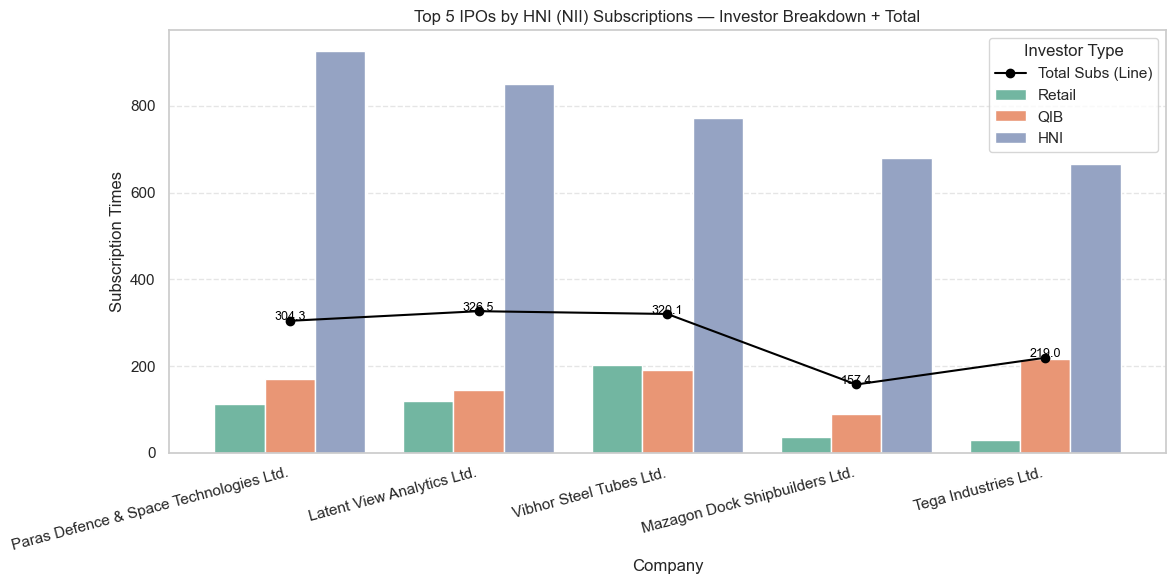


Full IPO Dataset Sorted by HNI (NII) Subscription Times:

Company                                      Retail        QIB        HNI      Total
--------------------------------------------------------------------------------
Paras Defence & Space Technologies Ltd.       112.8      169.7      927.7      304.3
Latent View Analytics Ltd.                    119.4      145.5      850.7      326.5
Vibhor Steel Tubes Ltd.                       201.5      191.4      772.5      320.1
Mazagon Dock Shipbuilders Ltd.                 35.6       89.7      678.9      157.4
Tega Industries Ltd.                           29.4      215.4      666.2      219.0
MTAR Technologies Ltd.                         28.4      165.0      650.8      200.8
Mrs.Bectors Food Specialities Ltd.             29.3      176.8      620.9      198.0
Tatva Chintan Pharma Chem Ltd.                 35.4      185.2      512.2      180.4
Manba Finance Ltd.                            143.9      148.6      511.6      224.1
Denta Wate

In [192]:
df_cleaned[['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes']] = df_cleaned[[
    'retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes', 'total_subsTimes'
]].apply(pd.to_numeric, errors='coerce')

top5 = df_cleaned.sort_values(by='nii_subsTimes', ascending=False).head(5).copy()

melted_df = top5.melt(
    id_vars=['stockName_chittorgarh', 'total_subsTimes'],
    value_vars=['retail_subsTimes', 'qib_subsTimes', 'nii_subsTimes'],
    var_name='Investor Type',
    value_name='Subscription Times'
)

melted_df['Investor Type'] = melted_df['Investor Type'].replace({
    'retail_subsTimes': 'Retail',
    'qib_subsTimes': 'QIB',
    'nii_subsTimes': 'HNI'
})

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x='stockName_chittorgarh',
    y='Subscription Times',
    hue='Investor Type',
    palette='Set2'
)

company_order = top5['stockName_chittorgarh'].tolist()
x_ticks = range(len(company_order))
plt.plot(
    x_ticks,
    top5['total_subsTimes'],
    color='black',
    marker='o',
    label='Total Subs (Line)'
)

for i, val in enumerate(top5['total_subsTimes']):
    plt.text(i, val + 1, f'{val:.1f}', color='black', ha='center', fontsize=9)

plt.title("Top 5 IPOs by HNI (NII) Subscriptions — Investor Breakdown + Total")
plt.xlabel("Company")
plt.ylabel("Subscription Times")
plt.xticks(ticks=x_ticks, labels=company_order, rotation=15, ha='right')
plt.legend(title="Investor Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Printing Section ----
full_sorted = df_cleaned.sort_values(by='nii_subsTimes', ascending=False)

print("\nFull IPO Dataset Sorted by HNI (NII) Subscription Times:\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in full_sorted.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")

print("\nTop 5 IPOs by HNI (NII) Subscription Times (Used in Plot):\n")
print(f"{'Company':40} {'Retail':>10} {'QIB':>10} {'HNI':>10} {'Total':>10}")
print("-" * 80)
for _, row in top5.iterrows():
    print(f"{row['stockName_chittorgarh'][:40]:40} "
          f"{row['retail_subsTimes']:>10.1f} "
          f"{row['qib_subsTimes']:>10.1f} "
          f"{row['nii_subsTimes']:>10.1f} "
          f"{row['total_subsTimes']:>10.1f}")


### top 5 by financial growth

In [193]:
df_post = df_cleaned.copy()

cols = ['assets_year1_inCRrs', 'assets_year3_inCRrs',
        'revenue_year1_inCRrs', 'revenue_year3_inCRrs',
        'pat_year1_inCRrs', 'pat_year3_inCRrs']
df_post[cols] = df_post[cols].apply(pd.to_numeric, errors='coerce')

def calculate_cagr(start, end, years=2):
    if pd.isna(start) or pd.isna(end) or start <= 0 or end <= 0:
        return None
    return (end / start) ** (1 / years) - 1

df_post['assetsCAGR'] = df_post.apply(lambda r: calculate_cagr(r['assets_year1_inCRrs'], r['assets_year3_inCRrs']), axis=1)
df_post['revenueCAGR'] = df_post.apply(lambda r: calculate_cagr(r['revenue_year1_inCRrs'], r['revenue_year3_inCRrs']), axis=1)
df_post['patCAGR'] = df_post.apply(lambda r: calculate_cagr(r['pat_year1_inCRrs'], r['pat_year3_inCRrs']), axis=1)

df_post['compositeGrowthScore'] = df_post[['assetsCAGR', 'revenueCAGR', 'patCAGR']].mean(axis=1)

df_post_valid = df_post.dropna(subset=['compositeGrowthScore'])

top5_growth = df_post_valid.sort_values('compositeGrowthScore', ascending=False).head(5).copy()

for col in ['assetsCAGR', 'revenueCAGR', 'patCAGR', 'compositeGrowthScore']:
    top5_growth[col + '_percent'] = top5_growth[col] * 100

top5_growth_pos = top5_growth[top5_growth['assetsCAGR_percent'] > 0].copy()
fig_bubble = px.scatter(
    top5_growth_pos,
    x='revenueCAGR_percent',
    y='patCAGR_percent',
    size='assetsCAGR_percent',
    color='compositeGrowthScore_percent',
    hover_name='ipo_name',
    size_max=60,
    labels={
        'revenueCAGR_percent': 'Revenue CAGR (%)',
        'patCAGR_percent': 'PAT CAGR (%)',
        'assetsCAGR_percent': 'Assets CAGR (%)',
        'compositeGrowthScore_percent': 'Composite Growth Score (%)'
    },
    title='Top 5 Post-COVID IPOs by Financial Growth (Bubble Chart)'
)
fig_bubble.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_bubble.update_layout(template='plotly_white')
fig_bubble.show()

fig_bar = px.bar(
    top5_growth.sort_values('compositeGrowthScore_percent'),
    x='compositeGrowthScore_percent',
    y='ipo_name',
    orientation='h',
    text='compositeGrowthScore_percent',
    color='compositeGrowthScore_percent',
    labels={
        'ipo_name': 'IPO Name',
        'compositeGrowthScore_percent': 'Composite Growth Score (%)'
    },
    title='Top 5 Post-COVID IPOs by Composite Financial Growth Score (Bar Chart)'
)
fig_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_bar.update_layout(template='plotly_white', yaxis=dict(categoryorder='total ascending'))
fig_bar.show()

# ---- Printing Section ----
full_sorted_growth = df_post_valid.sort_values(by='compositeGrowthScore', ascending=False)

print("\nFull IPO Dataset Sorted by Composite Financial Growth Score:\n")
print(f"{'IPO Name':40} {'Assets CAGR %':>15} {'Revenue CAGR %':>15} {'PAT CAGR %':>15} {'Composite Score %':>20}")
print("-" * 110)
for _, row in full_sorted_growth.iterrows():
    print(f"{row['ipo_name'][:40]:40} "
          f"{row['assetsCAGR']*100:15.2f} "
          f"{row['revenueCAGR']*100:15.2f} "
          f"{row['patCAGR']*100:15.2f} "
          f"{row['compositeGrowthScore']*100:20.2f}")

print("\nTop 5 IPOs by Composite Financial Growth Score (Used in Charts):\n")
print(f"{'IPO Name':40} {'Assets CAGR %':>15} {'Revenue CAGR %':>15} {'PAT CAGR %':>15} {'Composite Score %':>20}")
print("-" * 110)
for _, row in top5_growth.iterrows():
    print(f"{row['ipo_name'][:40]:40} "
          f"{row['assetsCAGR_percent']:15.2f} "
          f"{row['revenueCAGR_percent']:15.2f} "
          f"{row['patCAGR_percent']:15.2f} "
          f"{row['compositeGrowthScore_percent']:20.2f}")



Full IPO Dataset Sorted by Composite Financial Growth Score:

IPO Name                                   Assets CAGR %  Revenue CAGR %      PAT CAGR %    Composite Score %
--------------------------------------------------------------------------------------------------------------
DCX Systems Limited                                -4.29           89.86           82.57                56.05
Ratnaveer Precision Engineering Limited            23.27           14.95          123.61                53.94
Abans Holdings Limited                              1.86          107.15          -20.69                29.44
Windlas Biotech                                     0.34          -14.92          100.00                28.47
Macrotech Developers                                8.39            4.54           54.96                22.63
Metro Brands                                      -10.73           18.63           53.42                20.44
Sanathan Textiles                                  -9.73

In [194]:
df_post = df_cleaned.copy()
cols = ['assets_year1_inCRrs', 'assets_year3_inCRrs',
        'revenue_year1_inCRrs', 'revenue_year3_inCRrs',
        'pat_year1_inCRrs', 'pat_year3_inCRrs']
df_post[cols] = df_post[cols].apply(pd.to_numeric, errors='coerce')

def calculate_cagr(start, end, years=2):
    if pd.isna(start) or pd.isna(end) or start <= 0 or end <= 0:
        return None
    return (end / start) ** (1 / years) - 1

df_post['assetsCAGR'] = df_post.apply(lambda r: calculate_cagr(r['assets_year3_inCRrs'], r['assets_year1_inCRrs']), axis=1)
df_post['revenueCAGR'] = df_post.apply(lambda r: calculate_cagr(r['revenue_year3_inCRrs'], r['revenue_year1_inCRrs']), axis=1)
df_post['patCAGR'] = df_post.apply(lambda r: calculate_cagr(r['pat_year3_inCRrs'], r['pat_year1_inCRrs']), axis=1)

df_post['compositeGrowthScore'] = df_post[['assetsCAGR', 'revenueCAGR', 'patCAGR']].mean(axis=1)

df_valid = df_post.dropna(subset=['sector', 'compositeGrowthScore'])

df_sector_growth = df_valid.groupby('sector')[['assetsCAGR', 'revenueCAGR', 'patCAGR', 'compositeGrowthScore']].mean().reset_index()

for col in ['assetsCAGR', 'revenueCAGR', 'patCAGR', 'compositeGrowthScore']:
    df_sector_growth[col + '_percent'] = df_sector_growth[col] * 100

fig_bar = px.bar(
    df_sector_growth.sort_values('compositeGrowthScore_percent', ascending=True),
    x='compositeGrowthScore_percent',
    y='sector',
    orientation='h',
    text='compositeGrowthScore_percent',
    color='compositeGrowthScore_percent',
    labels={
        'sector': 'Sector',
        'compositeGrowthScore_percent': 'Avg Composite Growth Score (%)'
    },
    title='Average Composite Financial Growth Score by Sector (Post-COVID IPOs)'
)
fig_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_bar.update_layout(template='plotly_white', yaxis=dict(categoryorder='total ascending'))
fig_bar.show()

fig_bubble = px.scatter(
    df_sector_growth,
    x='revenueCAGR_percent',
    y='patCAGR_percent',
    size='assetsCAGR_percent',
    color='compositeGrowthScore_percent',
    hover_name='sector',
    size_max=60,
    labels={
        'revenueCAGR_percent': 'Revenue CAGR (%)',
        'patCAGR_percent': 'PAT CAGR (%)',
        'assetsCAGR_percent': 'Assets CAGR (%)',
        'compositeGrowthScore_percent': 'Composite Score (%)'
    },
    title='Sector-wise Financial Performance (Post-COVID IPOs)'
)
fig_bubble.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_bubble.update_layout(template='plotly_white')
fig_bubble.show()

# 📌 Extra: Print all sector growth data
print("\n📊 Sector-wise Financial Growth Data (%):")
print(df_sector_growth[['sector', 
                        'assetsCAGR_percent', 
                        'revenueCAGR_percent', 
                        'patCAGR_percent', 
                        'compositeGrowthScore_percent']].round(2).to_string(index=False))



📊 Sector-wise Financial Growth Data (%):
                sector  assetsCAGR_percent  revenueCAGR_percent  patCAGR_percent  compositeGrowthScore_percent
       Basic Materials               29.00                28.18            70.10                         41.89
Communication Services                9.70                22.46            54.52                         26.87
     Consumer Cyclical               19.86                37.82            62.78                         37.54
    Consumer Defensive               20.69                21.16            45.42                         27.35
                Energy              202.22                38.05            42.03                        210.24
    Financial Services               26.27                24.17            58.81                         36.19
            Healthcare               31.05                39.74            58.84                         41.07
           Industrials               26.19                30.01       

In [195]:
df_post = df_cleaned.copy()

cols = ['assets_year1_inCRrs', 'assets_year3_inCRrs',
        'revenue_year1_inCRrs', 'revenue_year3_inCRrs',
        'pat_year1_inCRrs', 'pat_year3_inCRrs']
df_post[cols] = df_post[cols].apply(pd.to_numeric, errors='coerce')

def calculate_cagr(start, end, years=2):
    if pd.isna(start) or pd.isna(end) or start <= 0 or end <= 0:
        return None
    return (end / start) ** (1 / years) - 1

df_post['assetsCAGR'] = df_post.apply(lambda r: calculate_cagr(r['assets_year3_inCRrs'], r['assets_year1_inCRrs']), axis=1)
df_post['revenueCAGR'] = df_post.apply(lambda r: calculate_cagr(r['revenue_year3_inCRrs'], r['revenue_year1_inCRrs']), axis=1)
df_post['patCAGR'] = df_post.apply(lambda r: calculate_cagr(r['pat_year3_inCRrs'], r['pat_year1_inCRrs']), axis=1)

df_post['compositeGrowthScore'] = df_post[['assetsCAGR', 'revenueCAGR', 'patCAGR']].mean(axis=1)

df_post = df_post.dropna(subset=['industry', 'compositeGrowthScore'])

df_industry = df_post.groupby('industry').agg({
    'assetsCAGR': 'mean',
    'revenueCAGR': 'mean',
    'patCAGR': 'mean',
    'compositeGrowthScore': 'mean'
}).reset_index()

df_industry = df_industry[df_industry['assetsCAGR'] > 0].copy()

for col in ['assetsCAGR', 'revenueCAGR', 'patCAGR', 'compositeGrowthScore']:
    df_industry[col + '_percent'] = df_industry[col] * 100

top5_growth = df_industry.sort_values('compositeGrowthScore', ascending=False).head(15).copy()

fig_bubble = px.scatter(
    top5_growth,
    x='revenueCAGR_percent',
    y='patCAGR_percent',
    size='assetsCAGR_percent',
    color='compositeGrowthScore_percent',
    hover_name='industry',
    size_max=60,
    labels={
        'revenueCAGR_percent': 'Revenue CAGR (%)',
        'patCAGR_percent': 'PAT CAGR (%)',
        'assetsCAGR_percent': 'Assets CAGR (%)',
        'compositeGrowthScore_percent': 'Composite Growth Score (%)'
    },
    title='Top 15 Industries by Avg Financial Growth of Post-COVID IPOs (Bubble Chart)'
)
fig_bubble.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_bubble.update_layout(template='plotly_white')
fig_bubble.show()

fig_bar = px.bar(
    top5_growth.sort_values('compositeGrowthScore_percent'),
    x='compositeGrowthScore_percent',
    y='industry',
    orientation='h',
    text='compositeGrowthScore_percent',
    color='compositeGrowthScore_percent',
    labels={
        'industry': 'Industry',
        'compositeGrowthScore_percent': 'Composite Growth Score (%)'
    },
    title='Top 15 Industries by Avg Composite Financial Growth Score (Bar Chart)'
)
fig_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_bar.update_layout(template='plotly_white', yaxis=dict(categoryorder='total ascending'))
fig_bar.show()

# 📌 Extra: Print full industry growth data for all industries
print("\n📊 Industry-wise Financial Growth Data (%):")
print(df_industry[['industry',
                   'assetsCAGR_percent',
                   'revenueCAGR_percent',
                   'patCAGR_percent',
                   'compositeGrowthScore_percent']]
      .sort_values('compositeGrowthScore_percent', ascending=False)
      .round(2)
      .to_string(index=False))



📊 Industry-wise Financial Growth Data (%):
                                industry  assetsCAGR_percent  revenueCAGR_percent  patCAGR_percent  compositeGrowthScore_percent
            Drug Manufacturers - General              224.69               280.35           474.46                        326.50
          Oil & Gas Equipment & Services              292.72                35.33            69.03                        302.52
           Business Equipment & Supplies               18.73                73.82           986.28                        202.79
                                   Solar               93.84               101.02           299.06                        128.64
                      Auto Manufacturers               37.22               180.73            44.51                        112.90
                       Computer Hardware               76.94               104.66           142.38                        103.57
                         Medical Devices             

## Section I

### Count : Fresh issue vs Fresh +OFS

In [196]:
df = df_cleaned.copy()

df['freshIssueSize'] = pd.to_numeric(df['freshIssueSize'], errors='coerce')
df['offerForSaleSize'] = pd.to_numeric(df['offerForSaleSize'], errors='coerce')

df = df.dropna(subset=['freshIssueSize', 'offerForSaleSize'])

def classify_ipo(row):
    if row['offerForSaleSize'] == 0:
        return 'Fresh Issue Only'
    else:
        return 'Fresh Issue + OFS'

df['ipo_structure'] = df.apply(classify_ipo, axis=1)

structure_counts = df['ipo_structure'].value_counts().reset_index()
structure_counts.columns = ['Structure', 'Count']

fig = px.pie(structure_counts, names='Structure', values='Count',
             title='IPO Structure: Fresh Issue vs Fresh + OFS',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textinfo='percent+label')
fig.show()

# 📌 Extra: Print IPO structure breakdown table
print("\n📊 IPO Structure Breakdown:")
print(structure_counts.to_string(index=False))



📊 IPO Structure Breakdown:
        Structure  Count
Fresh Issue + OFS    181
 Fresh Issue Only    107


### Industtry wise: Fresh issue vs Fresh +OFS

In [197]:
df = df_cleaned.copy()

df['freshIssueSize'] = pd.to_numeric(df['freshIssueSize'], errors='coerce')
df['offerForSaleSize'] = pd.to_numeric(df['offerForSaleSize'], errors='coerce')

df = df.dropna(subset=['freshIssueSize', 'offerForSaleSize', 'industry', 'sector'])

df['ipo_structure'] = df['offerForSaleSize'].apply(lambda x: 'Fresh Issue Only' if x == 0 else 'Fresh + OFS')

# --- Full dataset IPO structure counts ---
full_structure_counts = (
    df.groupby(['sector', 'industry', 'ipo_structure'])
    .size()
    .reset_index(name='count')
)

total_per_industry = full_structure_counts.groupby(['sector', 'industry'])['count'].transform('sum')
full_structure_counts['percent'] = (full_structure_counts['count'] / total_per_industry) * 100

# --- Chart logic for top 2 industries per sector ---
industry_counts = df.groupby(['sector', 'industry']).size().reset_index(name='ipo_count')

top_industries = (
    industry_counts.sort_values(['sector', 'ipo_count'], ascending=[True, False])
    .groupby('sector')
    .head(2)
)

df_top = df.merge(top_industries[['sector', 'industry']], on=['sector', 'industry'], how='inner')

df_top['sector_industry'] = df_top['sector'] + ' - ' + df_top['industry']

structure_counts = (
    df_top.groupby(['sector_industry', 'ipo_structure']).size().reset_index(name='count')
)
total_per_industry = structure_counts.groupby('sector_industry')['count'].transform('sum')
structure_counts['percent'] = (structure_counts['count'] / total_per_industry) * 100

fig = px.bar(
    structure_counts,
    x='sector_industry',
    y='percent',
    color='ipo_structure',
    barmode='group',
    title='Top 2 Industries per Sector: IPO Structure (% of Fresh vs Fresh + OFS)',
    labels={
        'percent': 'Percentage of IPOs',
        'sector_industry': 'Sector - Industry',
        'ipo_structure': 'IPO Type'
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=".1f")
fig.show()

# ---- Printing Section ----
print("\n📊 Full IPO Dataset Structure Breakdown:\n")
print(f"{'Sector':25} {'Industry':35} {'IPO Type':20} {'Count':>10} {'Percent %':>12}")
print("-" * 110)
for _, row in full_structure_counts.sort_values(['sector', 'industry', 'ipo_structure']).iterrows():
    print(f"{row['sector'][:25]:25} {row['industry'][:35]:35} {row['ipo_structure'][:20]:20} "
          f"{row['count']:10} {row['percent']:12.2f}")

print("\n📊 Top 2 Industries per Sector (Used in Chart):\n")
print(f"{'Sector - Industry':45} {'IPO Type':20} {'Count':>10} {'Percent %':>12}")
print("-" * 90)
for _, row in structure_counts.sort_values(['sector_industry', 'ipo_structure']).iterrows():
    print(f"{row['sector_industry'][:45]:45} {row['ipo_structure'][:20]:20} "
          f"{row['count']:10} {row['percent']:12.2f}")



📊 Full IPO Dataset Structure Breakdown:

Sector                    Industry                            IPO Type                  Count    Percent %
--------------------------------------------------------------------------------------------------------------
Basic Materials           Agricultural Inputs                 Fresh + OFS                   5        83.33
Basic Materials           Agricultural Inputs                 Fresh Issue Only              1        16.67
Basic Materials           Building Materials                  Fresh + OFS                   2       100.00
Basic Materials           Chemicals                           Fresh + OFS                   5       100.00
Basic Materials           Other Industrial Metals & Mining    Fresh + OFS                   1       100.00
Basic Materials           Other Precious Metals & Mining      Fresh + OFS                   1       100.00
Basic Materials           Specialty Chemicals                 Fresh + OFS                   8     

### Sector wise: Fresh issue vs Fresh +OFS

In [198]:
df = df_cleaned.copy()

df['freshIssueSize'] = pd.to_numeric(df['freshIssueSize'], errors='coerce')
df['offerForSaleSize'] = pd.to_numeric(df['offerForSaleSize'], errors='coerce')

df = df.dropna(subset=['sector', 'freshIssueSize', 'offerForSaleSize'])

df['ipo_structure'] = df['offerForSaleSize'].apply(lambda x: 'Fresh Issue Only' if x == 0 else 'Fresh + OFS')

sector_structure_counts = df.groupby(['sector', 'ipo_structure']).size().reset_index(name='count')

sector_totals = sector_structure_counts.groupby('sector')['count'].transform('sum')

sector_structure_counts['percent'] = (sector_structure_counts['count'] / sector_totals) * 100

# --- Chart ---
fig = px.bar(
    sector_structure_counts,
    x='sector',
    y='percent',
    color='ipo_structure',
    barmode='group',
    title='Sector-wise IPO Structure (%): Fresh Issue vs Fresh + OFS',
    labels={'percent': 'Percentage of IPOs', 'sector': 'Sector', 'ipo_structure': 'IPO Type'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=".1f")
fig.show()

# ---- Printing Section ----
print("\n📊 Full Sector-wise IPO Structure Breakdown:\n")
print(f"{'Sector':35} {'IPO Type':20} {'Count':>10} {'Percent %':>12}")
print("-" * 85)
for _, row in sector_structure_counts.sort_values(['sector', 'ipo_structure']).iterrows():
    print(f"{row['sector'][:35]:35} {row['ipo_structure'][:20]:20} "
          f"{row['count']:10} {row['percent']:12.2f}")



📊 Full Sector-wise IPO Structure Breakdown:

Sector                              IPO Type                  Count    Percent %
-------------------------------------------------------------------------------------
Basic Materials                     Fresh + OFS                  25        69.44
Basic Materials                     Fresh Issue Only             11        30.56
Communication Services              Fresh + OFS                   2        40.00
Communication Services              Fresh Issue Only              3        60.00
Consumer Cyclical                   Fresh + OFS                  38        65.52
Consumer Cyclical                   Fresh Issue Only             20        34.48
Consumer Defensive                  Fresh + OFS                   5        41.67
Consumer Defensive                  Fresh Issue Only              7        58.33
Energy                              Fresh + OFS                   1        33.33
Energy                              Fresh Issue Only      

### Issue Type vs Subscription

In [199]:
df = df_cleaned.copy()

df['offerForSaleSize'] = pd.to_numeric(df['offerForSaleSize'], errors='coerce')
df['total_subsTimes'] = pd.to_numeric(df['total_subsTimes'], errors='coerce')

df = df.dropna(subset=['offerForSaleSize', 'total_subsTimes'])

df['ipo_structure'] = df['offerForSaleSize'].apply(lambda x: 'Fresh Issue Only' if x == 0 else 'Fresh + OFS')

# --- Chart ---
fig = px.scatter(
    df,
    x='offerForSaleSize',
    y='total_subsTimes',
    color='ipo_structure',
    title='Issue Type vs Subscription (Post-COVID IPOs)',
    labels={
        'offerForSaleSize': 'Offer for Sale Size (in ₹ Cr)',
        'total_subsTimes': 'Total Subscription (x)',
        'ipo_structure': 'IPO Type'
    },
    hover_data=['ipo_name'],
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.show()

# ---- Printing Section ----
print("\n📊 IPOs with Offer for Sale Size & Subscription Data:\n")
print(f"{'IPO Name':40} {'IPO Type':20} {'OFS Size (₹ Cr)':>15} {'Total Subs (x)':>15}")
print("-" * 95)
for _, row in df.sort_values(['ipo_structure', 'offerForSaleSize'], ascending=[True, False]).iterrows():
    print(f"{row['ipo_name'][:40]:40} {row['ipo_structure'][:20]:20} "
          f"{row['offerForSaleSize']:15.2f} {row['total_subsTimes']:15.2f}")



📊 IPOs with Offer for Sale Size & Subscription Data:

IPO Name                                 IPO Type             OFS Size (₹ Cr)  Total Subs (x)
-----------------------------------------------------------------------------------------------
IRFC                                     Fresh + OFS             594023000.00            3.49
Bajaj Housing Finance                    Fresh + OFS             428571428.00           67.43
Indian Renewable Energy Development Agen Fresh + OFS             268776471.00           38.80
Niva Bupa Health Insurance               Fresh + OFS             189189188.00            1.90
Sona BLW Precision Forgings              Fresh + OFS             180412371.00            2.28
Swiggy                                   Fresh + OFS             175087863.00            3.59
Devyani International                    Fresh + OFS             155333330.00          116.70
HDB Financial                            Fresh + OFS             135135135.00           17.65
SBI

In [200]:
df = df_cleaned.copy()

df['offerForSaleSize'] = pd.to_numeric(df['offerForSaleSize'], errors='coerce')
df['total_subsTimes'] = pd.to_numeric(df['total_subsTimes'], errors='coerce')

df = df.dropna(subset=['offerForSaleSize', 'total_subsTimes'])

df['ipo_structure'] = df['offerForSaleSize'].apply(lambda x: 'Fresh Issue Only' if x == 0 else 'Fresh + OFS')

# --- Chart ---
fig = px.histogram(
    df,
    x='total_subsTimes',
    color='ipo_structure',
    barmode='overlay', 
    nbins=40,
    title='Distribution of Subscription Times by IPO Structure',
    labels={
        'total_subsTimes': 'Total Subscription Times (x)',
        'ipo_structure': 'IPO Type'
    },
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(opacity=0.6)
fig.update_layout(xaxis_title='Total Subscription (x)', yaxis_title='Number of IPOs')
fig.show()

# ---- Printing Section ----
print("\n📊 IPO Subscription Data by Structure:\n")
print(f"{'IPO Name':40} {'IPO Type':20} {'OFS Size (₹ Cr)':>15} {'Total Subs (x)':>15}")
print("-" * 95)
for _, row in df.sort_values(['ipo_structure', 'total_subsTimes'], ascending=[True, False]).iterrows():
    print(f"{row['ipo_name'][:40]:40} {row['ipo_structure'][:20]:20} "
          f"{row['offerForSaleSize']:15.2f} {row['total_subsTimes']:15.2f}")



📊 IPO Subscription Data by Structure:

IPO Name                                 IPO Type             OFS Size (₹ Cr)  Total Subs (x)
-----------------------------------------------------------------------------------------------
Latent View Analytics                    Fresh + OFS               6395939.00          326.49
Paras Defence                            Fresh + OFS               1724490.00          304.26
Indo Farm Equipment                      Fresh + OFS               3500000.00          227.67
Gala Precision Engineering               Fresh + OFS                616000.00          201.41
MTAR Technologies                        Fresh + OFS               8224270.00          200.79
Mrs. Bectors Food                        Fresh + OFS              17361109.00          198.02
Stallion India Fluorochemicals           Fresh + OFS               4302656.00          188.32
Standard Glass Lining                    Fresh + OFS              14289367.00          185.48
Unimech Aerospace 

In [201]:
df = df_cleaned.copy()

df['offerForSaleSize'] = pd.to_numeric(df['offerForSaleSize'], errors='coerce')
df['total_subsTimes'] = pd.to_numeric(df['total_subsTimes'], errors='coerce')

df = df.dropna(subset=['offerForSaleSize', 'total_subsTimes'])

df['ipo_structure'] = df['offerForSaleSize'].apply(lambda x: 'Fresh Issue Only' if x == 0 else 'Fresh + OFS')

# --- Histogram ---
fig_hist = px.histogram(
    df,
    x='total_subsTimes',
    color='ipo_structure',
    marginal='rug',
    nbins=40,
    barmode='overlay',
    opacity=0.6,
    title='Distribution of Subscription Times by IPO Type',
    labels={'total_subsTimes': 'Total Subscription (x)', 'ipo_structure': 'IPO Type'},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_hist.update_layout(bargap=0.2)
fig_hist.show()

# --- Violin Plot ---
fig_violin = px.violin(
    df,
    y='total_subsTimes',
    x='ipo_structure',
    box=True,
    points='all',
    title='Distribution of Subscription Times by IPO Structure',
    labels={'total_subsTimes': 'Subscription Times (x)', 'ipo_structure': 'IPO Type'},
    color='ipo_structure',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_violin.update_traces(marker=dict(size=6, opacity=0.6))
fig_violin.show()

# --- CDF ---
fresh = df[df['ipo_structure'] == 'Fresh Issue Only']['total_subsTimes'].sort_values()
ofs = df[df['ipo_structure'] == 'Fresh + OFS']['total_subsTimes'].sort_values()

def get_cdf(data):
    return data, data.rank(pct=True).values

x1, y1 = get_cdf(fresh)
x2, y2 = get_cdf(ofs)

fig_cdf = go.Figure()
fig_cdf.add_trace(go.Scatter(x=x1, y=y1, mode='lines', name='Fresh Issue Only'))
fig_cdf.add_trace(go.Scatter(x=x2, y=y2, mode='lines', name='Fresh + OFS'))

fig_cdf.update_layout(
    title='CDF: Subscription Times by IPO Structure',
    xaxis_title='Subscription Times (x)',
    yaxis_title='Cumulative Percentage of IPOs',
    yaxis_tickformat='.0%',
    template='plotly_white'
)
fig_cdf.show()

# --- Printing Section ---
print("\n📊 IPO Subscription Data by Structure:\n")
print(f"{'IPO Name':40} {'IPO Type':20} {'OFS Size (₹ Cr)':>15} {'Total Subs (x)':>15}")
print("-" * 95)
for _, row in df.sort_values(['ipo_structure', 'total_subsTimes'], ascending=[True, False]).iterrows():
    print(f"{row['ipo_name'][:40]:40} {row['ipo_structure'][:20]:20} "
          f"{row['offerForSaleSize']:15.2f} {row['total_subsTimes']:15.2f}")



📊 IPO Subscription Data by Structure:

IPO Name                                 IPO Type             OFS Size (₹ Cr)  Total Subs (x)
-----------------------------------------------------------------------------------------------
Latent View Analytics                    Fresh + OFS               6395939.00          326.49
Paras Defence                            Fresh + OFS               1724490.00          304.26
Indo Farm Equipment                      Fresh + OFS               3500000.00          227.67
Gala Precision Engineering               Fresh + OFS                616000.00          201.41
MTAR Technologies                        Fresh + OFS               8224270.00          200.79
Mrs. Bectors Food                        Fresh + OFS              17361109.00          198.02
Stallion India Fluorochemicals           Fresh + OFS               4302656.00          188.32
Standard Glass Lining                    Fresh + OFS              14289367.00          185.48
Unimech Aerospace 